<a href="https://colab.research.google.com/github/ariel-hedvat/AdvancedMLDLCourseAssignments/blob/Shiraz-new/finalProject/Recommendation_System_Project_Group_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div class="markdown-google-sans">
  <h1><font size=6> Music Recommendation System - Final Project</font></h1>

  <u>Group members:</u><br>
  - Ariel Hedvat<br>
  - Shiraz Israeli<br>
  - Yuval Bakirov<br>
  - Eitan Bakirov

<br>

</div>

# Background/Introduction

Finding the perfect song to listen to can feel like a challenging quest.<br> This is where recommendation systems come in, using data science to help us discover new music that aligns with our tastes and preferences.

A recommendation system is a tool, that utilizes Big Data to understand user preferences and behaviors. <br> By analyzing factors like listening history and genre preferences, these systems suggest songs and artists that match an individual's tastes. And enhances the music discovery process, saving users time and effort while introducing them to new music they're likely to enjoy.


# Main Objective<br>

The objective of our project is to build a recommendation system that can suggest the top 10 songs to a user, <br> based on the likelihood that the user will enjoy those songs, having the users' musical preferences, we will use and test a few models, <br> and finally after evaluating and comparing between the models, we aim to create a system that enriches their music listening experience.


# Data

The Taste Profile Subset, provided by the Echo Nest as a component of the Million Song Dataset, comprises two files. <br> The 1st file includes song details such as song ID, title, release information, artist name, and release year.  <br> The 2nd file contains user IDs, song IDs, and the corresponding play counts by users.

`song_data.rar` - <br>

**song_id** - A unique id given to every song

**title** - Title of the song

**Release** - Name of the released album

**Artist_name** - Name of the artist

**year** - Year of release

<br>

`triplets_file.rar` - <br>

**user_id** - A unique id given to the user

**song_id** - A unique id given to the song

**listen_count** - Number of times the song was played

<div class="markdown-google-sans">
  <h1><font size=5>Table of Contents</font></h1>

>[Background/Introduction](#scrollTo=2PTur39mv9rt)

>[Main Objective](#scrollTo=kaFLNJh5gnu7)

>[Data](#scrollTo=6KQAH9j-qoZw)

>[Import Libraries](#scrollTo=-_VBJ0JlYLKI)

>[Loading the data](#scrollTo=kXwOL606ZfUN)

>[Handling the data](#scrollTo=10dFieGliGFn)

>>[Data cleaning](#scrollTo=i1NGznkkiL5J)

>>[Merging the data](#scrollTo=HGCZ7ah8iOMa)

>[Exploratory Data Analysis](#scrollTo=Wm5QD4lUigH8)

>[TODO](#scrollTo=bgN_BPiptmiE)

>[Preprocessing](#scrollTo=8iVqCeAMimBE)

>[Full function section](#scrollTo=y_4W_frl0COw)

>>[Splitting the data](#scrollTo=m5SPLS-Ujixp)

>[Recommendation system workflow](#scrollTo=ZkALY4u6kidY)

>[Algorithms and Models analysis](#scrollTo=zHwULddKlZkf)

>>[Rank-based (Popularity)](#scrollTo=T2_JBRavnciT)

>[Importing RecSys algos](#scrollTo=s7fshDnT5DId)

>>[Collaborative-filtering](#scrollTo=uZX1s5honcYg)

>>[Preparing the data](#scrollTo=TMGhhINR5oO9)

>>>[Similarity/Neighborhood-based](#scrollTo=C-AdyyD6ncFC)

>>>>[Tune the baseline user-user-similarity model, and try improving its performance](#scrollTo=vcsUSUBOAMHJ)

>>>[Build a baseline item-item-similarity model](#scrollTo=sQlfGaUoBDt8)

>>>>[Tune the baseline item-item-similarity model, and try improving its performance](#scrollTo=5tNUZHsABolW)

>>>[Model-Based Collaborative Filtering - Matrix Factorization](#scrollTo=hH_v8DqpB5r9)

>>>>[Tune the baseline SVD model, and try improving its performance](#scrollTo=aSgBRcL1xnVC)

>>[Cluster-based](#scrollTo=ABABIeyTn0F5)

>>>[Build a baseline Cluster-Based model](#scrollTo=fe-VMWmeCnOp)

>>>>[Tune the baseline Cluster-Based model, and try improving its performance](#scrollTo=c2fd66f5)

>>[Content-based](#scrollTo=VrodWBIBn197)

>>>>[Making recommendations based on the title of a song](#scrollTo=3Jjo3UHKhoEh)

>[Evaluation metrics](#scrollTo=5lX4C4NzlmOK)

>[Showing predictions](#scrollTo=taheIRbMoCLN)

>[Comparing the models](#scrollTo=HJLFpdHpoRGe)

>[Final thoughts](#scrollTo=rzu6n94-onDL)



#  Import Libraries

In [ ]:
!pip install rarfile

In [ ]:
# Basic libraries of python for numeric and dataframe computations
import pandas as pd
import numpy as np

# Import Matplotlib the Basic library for data visualization
import matplotlib.pyplot as plt

# Import seaborn - Slightly advanced library for data visualization
import seaborn as sns

# Import the required library to compute the cosine similarity between two vectors
from sklearn.metrics.pairwise import cosine_similarity

# Import defaultdict from collections A dictionary output that does not raise a key error
from collections import defaultdict

# Import mean_squared_error : a performance metrics in sklearn
from sklearn.metrics import mean_squared_error

import rarfile
from io import BytesIO
import requests

import matplotlib.colors as mcolors

import warnings
warnings.filterwarnings('ignore')

import random

In [ ]:
# Custom colors #TODO TO CHANGING THAT
class clr:
    S = '\033[1m' + '\033[92m'
    E = '\033[0m'

# Loading the data

In [ ]:
song_data_rar_url = 'https://raw.githubusercontent.com/ariel-hedvat/AdvancedMLDLCourseAssignments/main/finalProject/Data/song_data.rar'
count_data_rar_url = 'https://raw.githubusercontent.com/ariel-hedvat/AdvancedMLDLCourseAssignments/main/finalProject/Data/triplets_file.rar'

In [ ]:
# Download the RAR files
song_data_rar_response = requests.get(song_data_rar_url)
count_data_rar_response = requests.get(count_data_rar_url)

In [ ]:
def extract_csv_from_rar(rar_content):
    # Create a RarFile object from the content
    with rarfile.RarFile(BytesIO(rar_content), 'r') as rar_file:
        # Get list of files in the RAR archive
        file_list = rar_file.namelist()

        # Initialize empty DataFrames
        df = pd.DataFrame()

        # Iterate through each file in the archive
        for file_name in file_list:
            # Check if the file is a CSV file
            if file_name.endswith('.csv'):
                print(file_name)
                # Extract the CSV file and read it into a DataFrame
                with rar_file.open(file_name) as csv_file:
                    df = pd.read_csv(csv_file)

    return df

In [ ]:
if song_data_rar_response.ok and count_data_rar_response.ok:
    # Extract content from the responses
    song_data_rar_content = song_data_rar_response.content
    count_data_rar_content = count_data_rar_response.content

    # Extract CSV files from RAR archives and convert to DataFrames
    song_df = extract_csv_from_rar(song_data_rar_content)
    count_df = extract_csv_from_rar(count_data_rar_content)
else:
  print("Error accessing the rar files, Try Again!")

song_data.csv
triplets_file.csv


# Initial preprocessing

Before exploring the data in depth we will fix and merge some of the dataframes:

As described before, we have 2 datasets that we will be working with:
- song_df - songs and their metadata.
- count_df - User-Song interactions - each song a user has listened to is a seperate row in the dataframe.

In [ ]:
song_df

song_id                                title  \
0       SOQMMHC12AB0180CB8                         Silent Night   
1       SOVFVAK12A8C1350D9                          Tanssi vaan   
2       SOGTUKN12AB017F4F1                    No One Could Ever   
3       SOBNYVR12A8C13558C                        Si Vos Querés   
4       SOHSBXH12A8C13B0DF                     Tangle Of Aspens   
...                    ...                                  ...   
999995  SOTXAME12AB018F136                      O Samba Da Vida   
999996  SOXQYIQ12A8C137FBB                         Jago Chhadeo   
999997  SOHODZI12A8C137BB3                              Novemba   
999998  SOLXGOR12A81C21EB7                              Faraday   
999999  SOWXJXQ12AB0189F43  Fernweh feat. Sektion Kuchikäschtli   

                                     release       artist_name  year  
0                      Monster Ballads X-Mas  Faster Pussy cat  2003  
1                                Karkuteillä  Karkkiautomaatti  1995  
2                                     Butter    Hudson Mohawke  2006  
3                                    De Culo       Yerba Brava  2003  
4       Rene Ablaze Presents Winter Sessions        Der Mystic     0  
...                                      ...               ...   ...  
999995                          Pacha V.I.P.      Kiko Navarro     0  
999996              Naale Baba Lassi Pee Gya     Kuldeep Manak     0  
999997       Dub_Connected: electronic music    Gabriel Le Mar     0  
999998          The Trance Collection Vol. 2             Elude     0  
999999                            So Oder So             Texta  2004  

[1000000 rows x 5 columns]

In [ ]:
count_df

user_id             song_id  \
0        b80344d063b5ccb3212f76538f3d9e43d87dca9e  SOAKIMP12A8C130995   
1        b80344d063b5ccb3212f76538f3d9e43d87dca9e  SOBBMDR12A8C13253B   
2        b80344d063b5ccb3212f76538f3d9e43d87dca9e  SOBXHDL12A81C204C0   
3        b80344d063b5ccb3212f76538f3d9e43d87dca9e  SOBYHAJ12A6701BF1D   
4        b80344d063b5ccb3212f76538f3d9e43d87dca9e  SODACBL12A8C13C273   
...                                           ...                 ...   
1999995  d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92  SOJEYPO12AAA8C6B0E   
1999996  d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92  SOJJYDE12AF729FC16   
1999997  d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92  SOJKQSF12A6D4F5EE9   
1999998  d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92  SOJUXGA12AC961885C   
1999999  d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92  SOJYOLS12A8C13C06F   

         listen_count  
0                   1  
1                   2  
2                   1  
3                   1  
4                   1  
...               ...  
1999995             2  
1999996             4  
1999997             3  
1999998             1  
1999999             1  

[2000000 rows x 3 columns]

## Song_df dataframe

Song dataframe exploration:

In [ ]:
# Song_df info
song_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 5 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   song_id      1000000 non-null  object
 1   title        999983 non-null   object
 2   release      999993 non-null   object
 3   artist_name  1000000 non-null  object
 4   year         1000000 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 38.1+ MB


In [ ]:
# Shape of song_df
song_df.shape

(1000000, 5)

In [ ]:
# Checking for missing values in song_df
song_df.isna().sum()

song_id         0
title          17
release         7
artist_name     0
year            0
dtype: int64

In [ ]:
#Number of unique values in each column of song_df
song_df.nunique()

song_id        999056
title          702427
release        149287
artist_name     72665
year               90
dtype: int64

Initial insights:
- The df has 1000000 songs but only 999056 unique ones - meaning there are almost 1000 duplicates.
- There are a small number of missing titles to songs.
- There are 5 album missing names.
- There are simillar song titles.
- The data contains songs from 90 different years.

## Count_df dataframe

Count_df dataset exploration :

In [ ]:
# Count_df info
count_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 3 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   user_id       object
 1   song_id       object
 2   listen_count  int64 
dtypes: int64(1), object(2)
memory usage: 45.8+ MB


In [ ]:
# Shape of count_df
count_df.shape

(2000000, 3)

In [ ]:
# Checking for missing values in count_df
count_df.isna().sum()

user_id         0
song_id         0
listen_count    0
dtype: int64

In [ ]:
#Number of unique values in each column of count_df
count_df.nunique()

user_id         76353
song_id         10000
listen_count      295
dtype: int64

Initial insights:
- The df has 2000000 user-song interactions.
- There are no missing values.
- There are 76353 unique users.
- There are 10000 songs played by the users - meaning that we have a lot of "unused" songs in the songs_df dataset.

## Merging the data

Now we will create a merged dataframe of the two dfs, and at the same time, to get rid of the repeating songs in the song table.<br>
From the resulting combination we will get rid of duplicates according to the identification key of a user with a song.

In [ ]:
# Merge count_df and song_df by song_id
combined_df = count_df.merge(song_df.drop_duplicates('song_id'), how='left', on='song_id').drop_duplicates()

In [ ]:
combined_df

user_id             song_id  \
0        b80344d063b5ccb3212f76538f3d9e43d87dca9e  SOAKIMP12A8C130995   
1        b80344d063b5ccb3212f76538f3d9e43d87dca9e  SOBBMDR12A8C13253B   
2        b80344d063b5ccb3212f76538f3d9e43d87dca9e  SOBXHDL12A81C204C0   
3        b80344d063b5ccb3212f76538f3d9e43d87dca9e  SOBYHAJ12A6701BF1D   
4        b80344d063b5ccb3212f76538f3d9e43d87dca9e  SODACBL12A8C13C273   
...                                           ...                 ...   
1999995  d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92  SOJEYPO12AAA8C6B0E   
1999996  d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92  SOJJYDE12AF729FC16   
1999997  d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92  SOJKQSF12A6D4F5EE9   
1999998  d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92  SOJUXGA12AC961885C   
1999999  d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92  SOJYOLS12A8C13C06F   

         listen_count                           title  \
0                   1                        The Cove   
1                   2                 Entre Dos Aguas   
2                   1                        Stronger   
3                   1                  Constellations   
4                   1                    Learn To Fly   
...               ...                             ...   
1999995             2       Ignorance (Album Version)   
1999996             4          Two Is Better Than One   
1999997             3  What I've Done (Album Version)   
1999998             1                              Up   
1999999             1      Soil_ Soil (Album Version)   

                               release  \
0                   Thicker Than Water   
1                  Flamenco Para Niños   
2                           Graduation   
3                    In Between Dreams   
4        There Is Nothing Left To Lose   
...                                ...   
1999995                      Ignorance   
1999996                     Love Drunk   
1999997                 What I've Done   
1999998                      My Worlds   
1999999                        The Con   

                                    artist_name  year  
0                                  Jack Johnson     0  
1                                 Paco De Lucia  1976  
2                                    Kanye West  2007  
3                                  Jack Johnson  2005  
4                                  Foo Fighters  1999  
...                                         ...   ...  
1999995                                Paramore     0  
1999996  Boys Like Girls featuring Taylor Swift  2009  
1999997                             Linkin Park  2007  
1999998                           Justin Bieber  2010  
1999999                          Tegan And Sara  2007  

[2000000 rows x 7 columns]

# Exploratory Data Analysis

## Basic Analysis

In [ ]:
df = combined_df.copy()

In [ ]:
# Shape of the data
df.shape

(2000000, 7)

Looking at the types of the df:

In [ ]:
#Checking Data Types
df.dtypes

user_id         object
song_id         object
listen_count     int64
title           object
release         object
artist_name     object
year             int64
dtype: object

Based on our knowledge of the features and the data displayed above we can conclude that: <br>

Our dataset consists 7 features and 2000000 observations.
The features types :

`user_id`, `song_id` - are unique variables, thus we leave them as <u><b>String (Object)</b></u> data types.

`listen_count` is a <u><b>Numeric</b></u> data type.

`title`, `release` and `artist_name` - are <u><b>String (Object)</b></u> data types.

`year` is a <u><b>Numeric</b></u> data type.


In [ ]:
def change_data_types(df):

  df['user_id'] = df['user_id'].astype('object')
  df['song_id'] = df['song_id'].astype('object')
  df['listen_count'] = df['listen_count'].astype('int64')
  df['title'] = df['title'].astype('object')
  df['release'] = df['release'].astype('object')
  df['artist_name'] = df['artist_name'].astype('object')
  df['year'] = df['year'].astype('int64')

  return df

In [ ]:
df = change_data_types(df)

In [ ]:
df.dtypes

user_id         object
song_id         object
listen_count     int64
title           object
release         object
artist_name     object
year             int64
dtype: object

Describe function will not discribe the "year" feature well. We dont want it to make an average of the years or its std and etc.. It has no meaning for us.

In [ ]:
#Summary Statistics (of Numeric features)
# Excluding the 'year' column from df.describe()
describe_without_year = df.drop(columns=['year']).describe()

# Displaying the descriptive statistics
print(describe_without_year)


       listen_count
count  2.000000e+06
mean   3.045485e+00
std    6.579720e+00
min    1.000000e+00
25%    1.000000e+00
50%    1.000000e+00
75%    3.000000e+00
max    2.213000e+03


In [ ]:
#Missing Values
df.isnull().sum()

user_id         0
song_id         0
listen_count    0
title           0
release         0
artist_name     0
year            0
dtype: int64

As we can see, in the meantime, we solved the problem of the missing values we have obsered before in the df.songs. <br>
All the songs that were played by the users are without missing values in their metadata.

In [ ]:
#Unique Values
df.nunique()

user_id         76353
song_id         10000
listen_count      295
title            9567
release          5388
artist_name      3375
year               58
dtype: int64

Finally, we have a total of 76000 different users listening to 10000 different songs.

In [ ]:
# Sum the values in the 'listen_count' column
df['listen_count'].sum()

6090969

We have a total of 6,090,969 listen counts in the data.

## Advanced Analysis and Visualizations

After dealing with the regular EDA of the features, now we would try and find some outliers or sparse data that is hidden in the dimensions of the data:

We can devide this section into sub-sections based on each feature in the following way:
- Song analysis
- Album analysis
- Artist analysis
- User anaysis

We will try to find key components that may lead to a deeper understanding of the data and maybe draw some important conclusions for the following sections of our project.

### Year analysis

We first want to explore the released year of the songs the users listened to:

In [ ]:
# Bar Plot of Number of Unique Songs Released by Year
def plot_unique_songs_by_year(df):
    # Group the DataFrame by 'year' and count the number of unique 'song_id' for each year
    unique_songs_by_year = df.groupby('year')['song_id'].nunique().reset_index(name='num_unique_songs')

    # Print the number of unique songs released in each year
    print("Number of Unique Songs Released by Year:")
    print(unique_songs_by_year)

    # Plotting the bar plot
    plt.figure(figsize=(12, 6))
    sns.barplot(x='year', y='num_unique_songs', data=unique_songs_by_year, color='gold')
    plt.xticks(rotation=45)
    plt.title('Number of Unique Songs Released by Year', weight="bold", size=14)
    plt.xlabel('Year')
    plt.ylabel('Number of Unique Songs Released')
    plt.show()

    # Calculate the sum of num_unique_songs
    total_unique_songs = unique_songs_by_year['num_unique_songs'].sum()

    # Print the sum
    print("Count of unique songs:", total_unique_songs)

    # Check if the sum is 10000
    if total_unique_songs == 10000:
        print("The count is 10000 - Great!")

Number of Unique Songs Released by Year:
    year  num_unique_songs
0      0              1773
1   1954                 1
2   1955                 1
3   1956                 2
4   1957                 1
5   1958                 6
6   1959                 6
7   1960                 5
8   1961                 3
9   1962                 7
10  1963                 6
11  1964                14
12  1965                16
13  1966                15
14  1967                23
15  1968                29
16  1969                29
17  1970                47
18  1971                22
19  1972                36
20  1973                25
21  1974                31
22  1975                22
23  1976                25
24  1977                35
25  1978                46
26  1979                37
27  1980                35
28  1981                42
29  1982                57
30  1983                51
31  1984                65
32  1985                49
33  1986                67
34  1987      

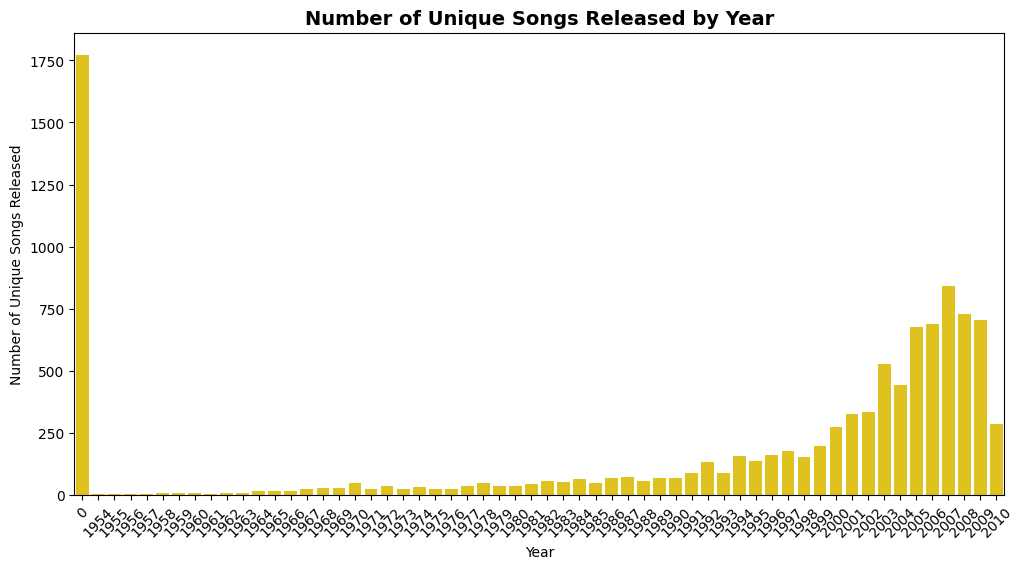

Count of unique songs: 10000
The count is 10000 - Great!


In [ ]:
# Call the function to plot the number of unique songs released by year
plot_unique_songs_by_year(df)

Another check of the strange find:

In [ ]:
# Filter the DataFrame for songs with a release year of 0 and count the occurrences
num_songs_year_0 = df[df['year'] == 0]['song_id'].nunique()

# Print the result
print("Number of songs with a release year of 0:", num_songs_year_0)


Number of songs with a release year of 0: 1773


We can see that there are a lot of year = 0 songs.<br>
It will be difficult to complete what year these songs released.<br> Normalizing it would probably bias our exploration - Therefore, we will probably leave them out. <br>



- Before implementing our find, we will do some final research:

In [ ]:
shape_before_dropping = df.shape
print("Shape of our df before dropping year = 0:", shape_before_dropping)

# Sum the values in the 'listen_count' column
listen_count_before_dropping = df['listen_count'].sum()
print("Sum of all the listen count before dropping year = 0:", listen_count_before_dropping)

different_song_count_before_dropping = df['song_id'].nunique()
print("Number of different songs before dropping year = 0:", different_song_count_before_dropping)

different_user_count_before_dropping = df['user_id'].nunique()
print("Number of different users before dropping year = 0:", different_user_count_before_dropping)

Shape of our df before dropping year = 0: (2000000, 7)
Sum of all the listen count before dropping year = 0: 6090969
Number of different songs before dropping year = 0: 10000
Number of different users before dropping year = 0: 76353


In [ ]:
# Dropping all the songs their released year is 0.
df = df[df['year'] > 0]

- By dropping year = 0, we lost some songs their released year was 0.<br> Moreover, we lost some users who listened only to songs its released year was 0. <br>
Of course, the total number of listens became smaller.<br>
Here are the findings:

In [ ]:
shape_after_dropping = df.shape
print("Shape of our df after dropping year = 0:", shape_after_dropping)

# Sum the values in the 'listen_count' column
listen_count_after_dropping = df['listen_count'].sum()
print("Sum of all the listen count after dropping year = 0:", listen_count_after_dropping)

different_song_count_after_dropping = df['song_id'].nunique()
print("Number of different songs after dropping year = 0:", different_song_count_after_dropping)

different_user_count_after_dropping = df['user_id'].nunique()
print("Number of different users after dropping year = 0:", different_user_count_after_dropping)

Shape of our df after dropping year = 0: (1627878, 7)
Sum of all the listen count after dropping year = 0: 4849531
Number of different songs after dropping year = 0: 8227
Number of different users after dropping year = 0: 76057


In [ ]:
print("By dropping year = 0, we reduced the amount of samples by:", shape_before_dropping[0] - shape_after_dropping[0])
print("By dropping year = 0, we reduced the amount of listening by:", listen_count_before_dropping - listen_count_after_dropping)
print("By dropping year = 0, we reduced the number of songs by:", different_song_count_before_dropping - different_song_count_after_dropping)
print("By dropping year = 0, we reduced the number of users by:", different_user_count_before_dropping - different_user_count_after_dropping)

By dropping year = 0, we reduced the amount of samples by: 372122
By dropping year = 0, we reduced the amount of listening by: 1241438
By dropping year = 0, we reduced the number of songs by: 1773
By dropping year = 0, we reduced the number of users by: 296


In [ ]:
combined_df = df.copy()

Number of Unique Songs Released by Year:
    year  num_unique_songs
0   1954                 1
1   1955                 1
2   1956                 2
3   1957                 1
4   1958                 6
5   1959                 6
6   1960                 5
7   1961                 3
8   1962                 7
9   1963                 6
10  1964                14
11  1965                16
12  1966                15
13  1967                23
14  1968                29
15  1969                29
16  1970                47
17  1971                22
18  1972                36
19  1973                25
20  1974                31
21  1975                22
22  1976                25
23  1977                35
24  1978                46
25  1979                37
26  1980                35
27  1981                42
28  1982                57
29  1983                51
30  1984                65
31  1985                49
32  1986                67
33  1987                71
34  1988      

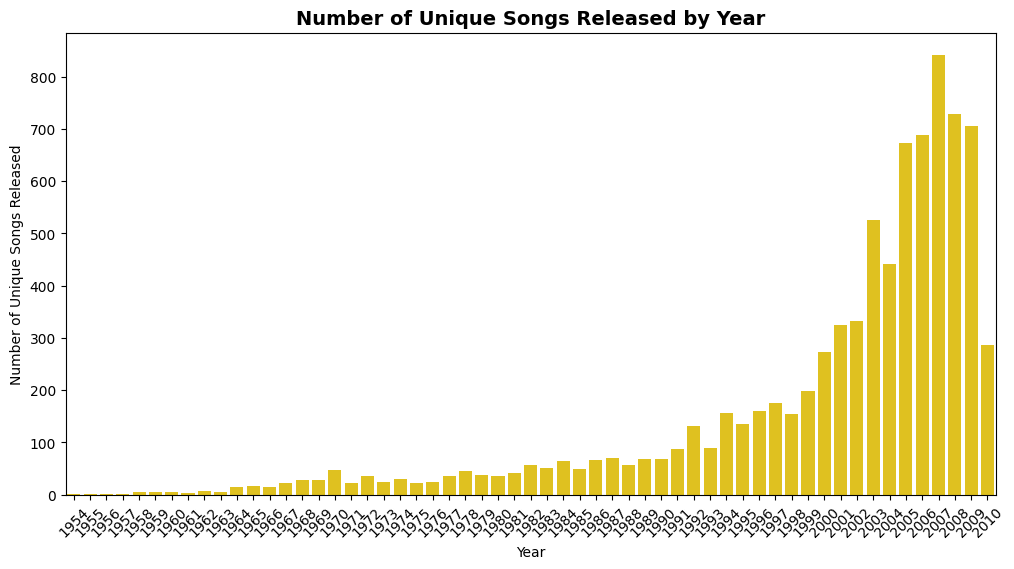

Count of unique songs: 8227


In [ ]:
# Call the function to plot the number of unique songs released by year
plot_unique_songs_by_year(df) #8227

In [ ]:
unique_song_count = len(df['song_id'].unique())
print("Number of Unique Songs After:", unique_song_count)

print("The system omitted {} songs whose released year was 0.".format(different_song_count_before_dropping - unique_song_count))


Number of Unique Songs After: 8227
The system omitted 1773 songs whose released year was 0.


TODO To check which timeframe the data is from?

It can be concluded from the plot that the users we have in the data listen to more contemporary songs, or alternatively, it can be concluded that as the years passed, more songs were released in each year. <br>
There is a little indent about songs released in 2004. We can think that either few songs were released this year, or, our users less liked songs released this year.

In order to answer this question, let's run a correlation matrix: <br>
Because only "listen_count" and "year" features are numerical features, we will only look at those.

In order for the correlation matrix to work correctly and examine a correlation between these two features, we would like to group our data by the year the song was released. In this way, we will counte the number of listens count grouped by each year of release.<br>
We will examine whether there is a correlation between the year the songs were released in and the number of times these songs were listened.<br>

In [ ]:
# Define the custom colormap
colors = ['gold', 'brown']
custom_cmap = mcolors.LinearSegmentedColormap.from_list('custom_cmap', colors)

def plot_correlation_matrix(df):
    # Filter out rows where year is not 0
    df_filtered = df[df['year'] != 0]

    # Group the DataFrame by 'year' and sum the 'listen_count' for each year
    yearly_listen_counts = df_filtered.groupby('year')['listen_count'].sum().reset_index()

    # Create the correlation matrix
    correlation_matrix = yearly_listen_counts.corr()

    # Plotting the correlation matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(correlation_matrix, annot=True, cmap=custom_cmap, fmt=".2f")
    plt.title('Correlation Matrix')
    plt.show()


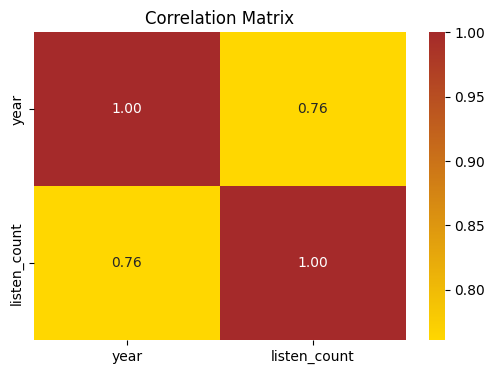

In [ ]:
# Call the function to plot the correlation matrix
plot_correlation_matrix(df)

Seems pretty coordinated.<br>
We can conclude that our users like to listen to more recent songs.

### Song analysis

Let's take a look at the most listened songs:

In [ ]:
def calculate_top_songs(df, n=10):
    """
    Calculate the top n songs based on the total listen counts.

    Parameters:
        df (DataFrame): The DataFrame containing the song data.
        n (int): The number of top songs to calculate.

    Returns:
        Series: A Series containing the top n songs based on total listen counts.
    """
    # Calculate the total listen counts for each song
    listen_counts = df.groupby('title')['listen_count'].sum()

    # Sort the songs by listen counts in descending order
    listen_counts = listen_counts.sort_values(ascending=False)

    # Select the top n songs
    top_songs = listen_counts.head(n)

    return top_songs


def plot_top_songs(top_songs):
    """
    Plot the top songs based on their total listen counts.

    Parameters:
        top_songs (Series): A Series containing the top songs based on total listen counts.
    """
    # Plotting the top songs
    plt.figure(figsize=(12, 10))
    top_songs.plot(kind='bar', color='skyblue')
    plt.title('Top {} Most Played Songs'.format(len(top_songs)))
    plt.xlabel('Song Title')
    plt.ylabel('Listen Count')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

    # Annotate each bar with its corresponding value on the y-axis
    for i, v in enumerate(top_songs):
        plt.text(i, v, str(v), ha='center', va='bottom')

    plt.tight_layout()  # Adjust layout to prevent clipping of labels
    plt.show()

Top 10 Songs:
title
You're The One    54915
Undo              49253
Revelry           41418
Secrets           22100
Invalid           19645
Représente        18054
Fireflies         14617
The Gift          14438
Tive Sim          14423
Marry Me          13116
Name: listen_count, dtype: int64


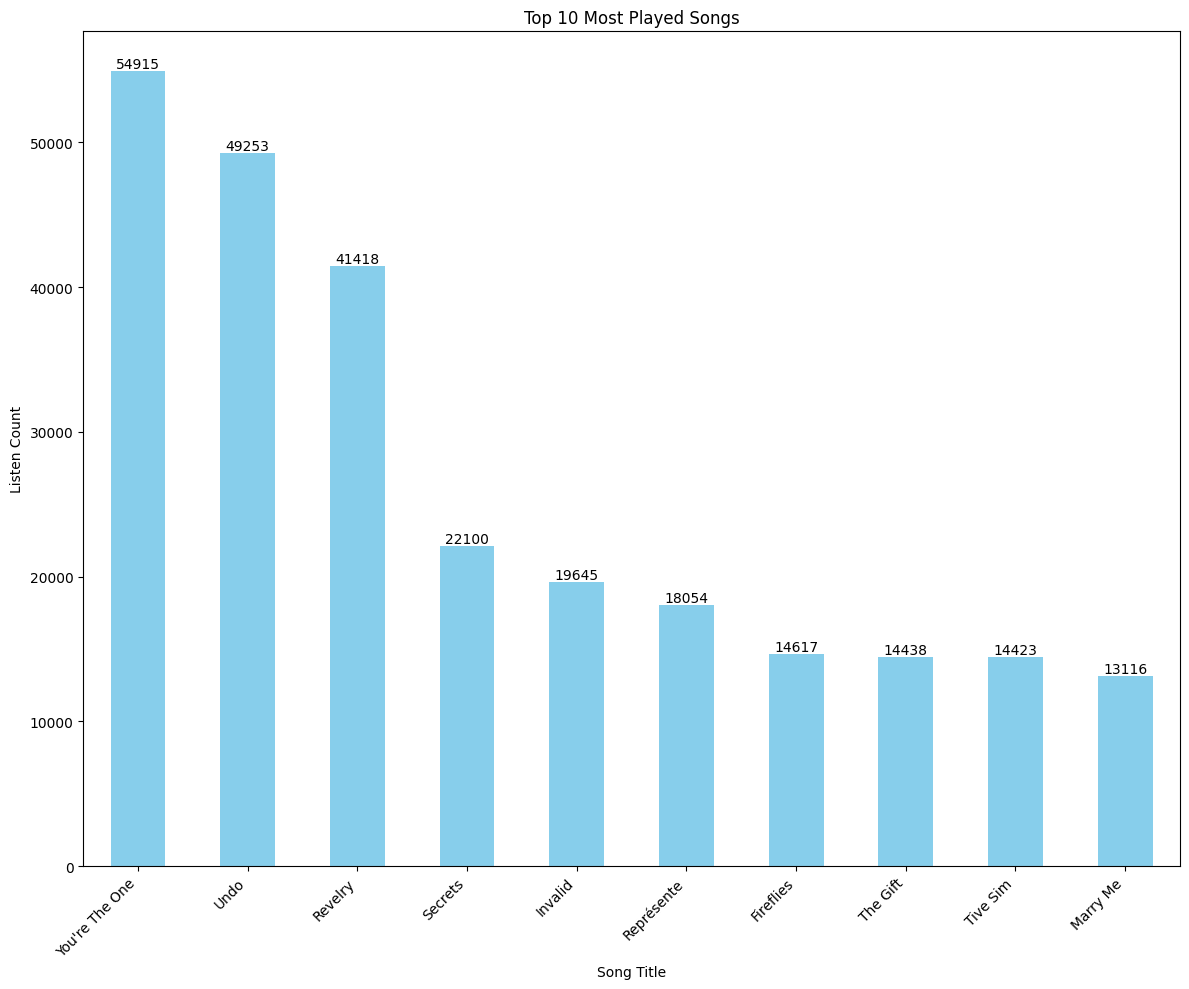

In [ ]:
# Call the function to calculate the top songs
top_songs = calculate_top_songs(df)

# Print the top songs
print("Top {} Songs:".format(len(top_songs)))
print(top_songs)

# Call the function to plot the top songs
plot_top_songs(top_songs)

The song "You're The One" was played the most times, played 54915 times.

Now let's look at the songs played by the most different users:

In [ ]:
def count_users_per_song(df):
    """
    Count the number of different users who listened to each song and sort the result by the number of users.

    Parameters:
        df (DataFrame): The DataFrame containing the song data.

    Returns:
        DataFrame: A DataFrame containing the song_id, title, and the number of different users who listened to each song,
                   sorted by the number of users in descending order.
    """
    # Group the DataFrame by 'song_id' and count the number of unique 'user_id' for each song
    users_per_song = df.groupby('song_id')['user_id'].nunique().reset_index(name='num_users')

    # Merge with the original DataFrame to get song titles
    users_per_song = pd.merge(users_per_song, df[['song_id', 'title']], on='song_id', how='left')

    # Drop duplicates to ensure each song appears only once
    users_per_song.drop_duplicates(inplace=True)

    # Sort the DataFrame by 'num_users' in descending order
    users_per_song_sorted = users_per_song.sort_values(by='num_users', ascending=False)

    return users_per_song_sorted

In [ ]:
def plot_top_users_per_song(users_per_song_df, n=10):
    """
    Plot the number of different users who listened to each song for the top n songs.

    Parameters:
        users_per_song_df (DataFrame): DataFrame containing song IDs, titles, and the number of users.
        n (int): Number of top songs to plot.
    """
    top_songs = users_per_song_df.head(n)

    plt.figure(figsize=(12, 8))
    plt.barh(top_songs['title'], top_songs['num_users'], color='skyblue')
    plt.xlabel('Number of Different Users')
    plt.ylabel('Song Title')
    plt.title(f'Top {n} Songs by Number of Different Users')
    plt.gca().invert_yaxis()  # Invert y-axis to display songs with highest users at the top
    plt.show()

                    song_id  num_users                             title
52567    SOAUWYT12A81C206F1       7032                              Undo
104234   SOBONKR12A58A7A7E0       6412                    You're The One
1196793  SOSXLTC12AF72A7F54       6145                           Revelry
879508   SONYKOW12AB01849C9       5841                           Secrets
700314   SOLFXKT12AB017E3E0       4795                         Fireflies
...                     ...        ...                               ...
1238517  SOTLOKX12A8C1390C2         52               Big Girls Don't Cry
859197   SONOYTE12A6D4F8697         52  (I Can't Get Me No) Satisfaction
1439262  SOWNLZF12A58A79811         51                            Scared
111420   SOBPGWB12A6D4F7EF3         50                Don´t Leave Me Now
432083   SOGSPGJ12A8C134FAA         48        Ghosts (Toxic Avenger Mix)

[8227 rows x 3 columns]


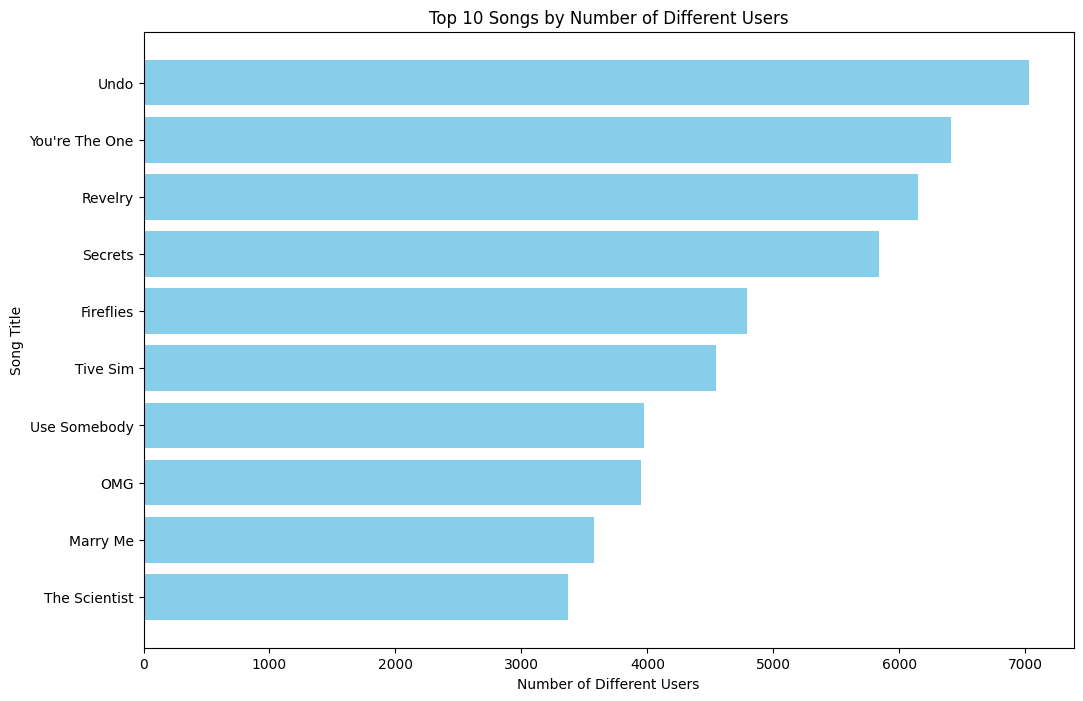

In [ ]:
# Get the DataFrame containing the number of users per song
users_per_song_df = count_users_per_song(df)

# Print the DataFrame with song IDs, titles, and the number of users
print(users_per_song_df)

# Call the function to plot the top 10 songs by number of users
plot_top_users_per_song(users_per_song_df)

In [ ]:
# Filter the DataFrame for the song "Undo"
undo_data = df[df['title'] == "Undo"]

# Count the number of unique users who listened to "Undo"
num_users_undo = undo_data['user_id'].nunique()

print("Number of users who listened to 'Undo':", num_users_undo)


Number of users who listened to 'Undo': 7032


We can learn that 7032 different users is the highest number of different users listened to a specific song - this song is called: "Undo".<br>
Moreover, 48 different users is the lowest number of different users listened to a specific song - this song is called: "Ghosts (Toxic Avenger Mix)" was listened to by only 48 different users.

Additionally, we would like to understand which songs have been played by enough different users.<br>
In our system we would like to give a higher value to songs played by more users.

In [ ]:
def filter_songs_by_user_count(df, max_users_list):
    """
    Filter the DataFrame to include only songs listened to by less than a specified number of users.

    Parameters:
        df (DataFrame): The DataFrame containing the song data.
        max_users_list (list): A list of maximum number of users allowed for a song.

    Returns:
        dict: A dictionary containing filtered DataFrames for each specified maximum number of users.
    """
    filtered_results = {}

    for max_users in max_users_list:
        # Group the DataFrame by 'song_id' and count the number of unique users for each song
        song_listen_counts = df.groupby('song_id')['user_id'].nunique()

        # Filter out the songs with a user count greater than or equal to the specified maximum
        filtered_songs = song_listen_counts[song_listen_counts < max_users]

        # Filter the original DataFrame to include only the songs with less than the specified maximum users
        filtered_df = df[df['song_id'].isin(filtered_songs.index)]

        # Count songs with less and more than the specified maximum users
        num_less_users = len(filtered_songs)
        num_more_users = len(song_listen_counts) - num_less_users
        print(f"There are {num_less_users} songs listened to by less than {max_users} users.")
        print(f"There are {num_more_users} songs listened to by more than {max_users} users.")
        print()

        # Store the filtered DataFrame and results in the dictionary
        filtered_results[max_users] = {'filtered_df': filtered_df, 'num_less_users': num_less_users, 'num_more_users': num_more_users}

    return filtered_results


In [ ]:
def plot_song_counts_by_max_users(filtered_results):
    """
    Plot the number of songs listened to by less and more than the specified maximum users.

    Parameters:
        filtered_results (dict): Dictionary containing filtered DataFrames and counts.
    """
    # Extract max_users_list, num_less_users_list, and num_more_users_list from filtered_results
    max_users_list = list(filtered_results.keys())
    num_less_users_list = [result['num_less_users'] for result in filtered_results.values()]
    num_more_users_list = [result['num_more_users'] for result in filtered_results.values()]

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.bar([str(max_users) for max_users in max_users_list], num_less_users_list, label='Less than', color="lightblue")
    plt.bar([str(max_users) for max_users in max_users_list], num_more_users_list, bottom=num_less_users_list, label='More than')

    # Adding labels and title
    plt.xlabel('Number of Users')
    plt.ylabel('Number of Songs')
    plt.title('Number of Songs Listened to by Less and More than the Specified Maximum Users')
    plt.legend()

    # Display the plot
    plt.show()

There are 0 songs listened to by less than 30 users.
There are 8227 songs listened to by more than 30 users.

There are 71 songs listened to by less than 60 users.
There are 8156 songs listened to by more than 60 users.

There are 2060 songs listened to by less than 90 users.
There are 6167 songs listened to by more than 90 users.

There are 3882 songs listened to by less than 120 users.
There are 4345 songs listened to by more than 120 users.

There are 4987 songs listened to by less than 150 users.
There are 3240 songs listened to by more than 150 users.

There are 6097 songs listened to by less than 200 users.
There are 2130 songs listened to by more than 200 users.



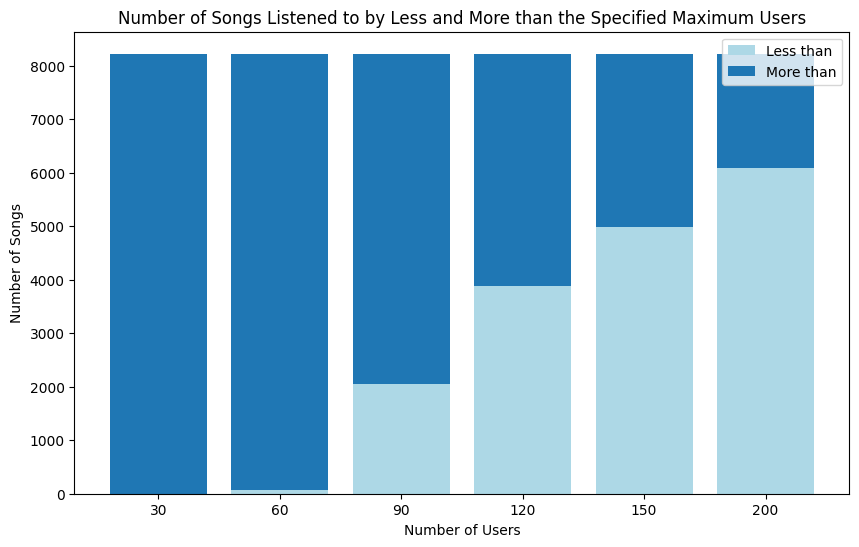

In [ ]:
max_users_list = [30, 60, 90, 120, 150, 200]
filtered_results = filter_songs_by_user_count(df, max_users_list)

# Call the plot function directly with filtered results
plot_song_counts_by_max_users(filtered_results)

That's logical that as the number of users increases, there are fewer songs played by this increasing amount of users.<br>
As we can see, all the users listened to more than 30 different songs. It makes sense because we saw before that every song was listened to by at least 48 different users.<br>
We can see that there are a lot of songs that have been listened to by too few users, so it can be concluded that they are less popular.<br>
It will be more difficult to recommend those songs in our recommendation system.

According to the conclusions we drew from the printouts and from the diagram:<br>
There are 2060 songs listened to by less than 90 users.
There are 6167 songs listened to by more than 90 users.<br>
This will leave us with about 75% relevant songs -  seems like a reasonable restriction that doesn't leave out too many songs. <br>
It appears that 90 would be a great restrictor. <br>
We will deal with it later...



### Artist analysis

Some observations about the artists of the songs:

In [ ]:
def plot_top_artists(df, n=10):
    # Calculate the total listen counts for each artist
    listen_counts = df.groupby('artist_name')['listen_count'].sum()

    # Sort the artists by listen counts in descending order
    listen_counts = listen_counts.sort_values(ascending=False)

    # Select the top n artists
    top_artists = listen_counts.head(n)

    # Printing the top artists
    print("Top", n, "Most Listened Artists:")
    print(top_artists)

    # Plotting the top artists with a horizontal bar plot
    plt.figure(figsize=(12, 6))
    sns.barplot(x=top_artists.values, y=top_artists.index, palette=sns.color_palette("Oranges_r", 10))
    plt.title('Top {} Most Listened Artists'.format(n))
    plt.xlabel('Total Listen Count')
    plt.ylabel('Artist')
    plt.tight_layout()  # Adjust layout to prevent clipping of labels

     # Adding count values next to each bar
    for i, count in enumerate(top_artists.values):
      plt.text(count, i, str(count), va='center', fontsize=10, color='black', ha='left')

    plt.show()


Top 10 Most Listened Artists:
artist_name
Coldplay          69528
Kings Of Leon     68570
Dwight Yoakam     54136
Björk             53814
The Black Keys    52220
Jack Johnson      43364
Justin Bieber     41645
OneRepublic       40981
Radiohead         34807
Linkin Park       34692
Name: listen_count, dtype: int64


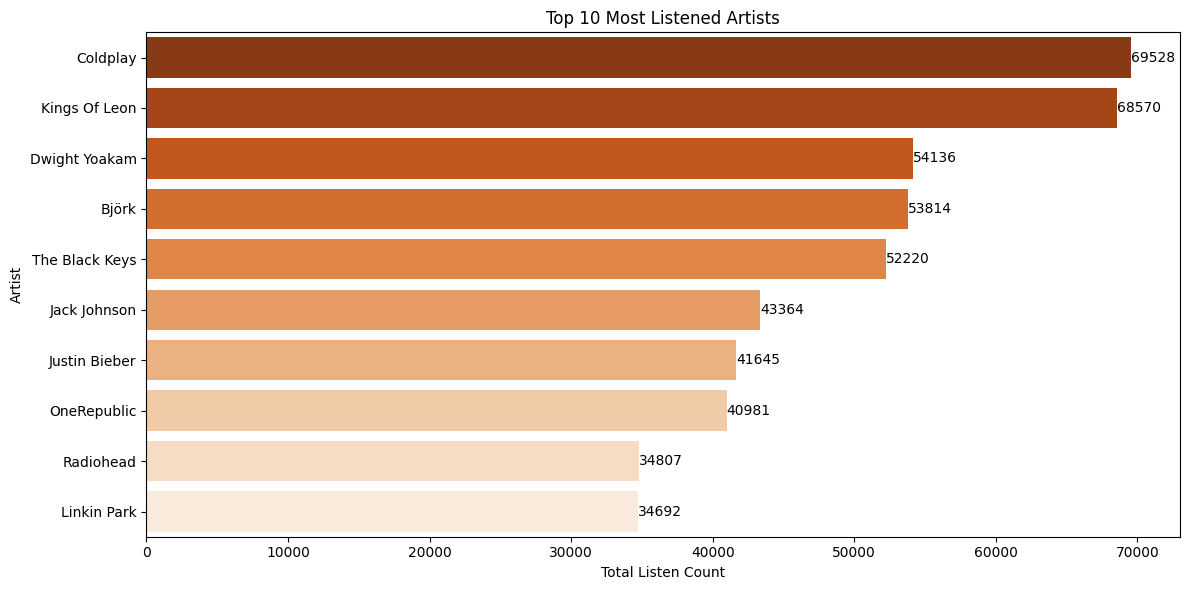

In [ ]:
# Display the top 10 artists using a horizontal bar plot
plot_top_artists(df)

The artist whose songs have been played the most is "Coldplay". His songs played 69528 times.

### Album analysis

Some observations about the albums of the songs:

In [ ]:
def release_insights(df):
    # Calculate total listen counts per release
    total_listen_counts = df.groupby('release')['listen_count'].sum()
    # Sort releases by total listen counts in descending order
    total_listen_counts = total_listen_counts.sort_values(ascending=False)

    # Print top releases with total listen counts
    print("Top Releases by Total Listen Counts:")
    print(total_listen_counts.head(10))

    # Plotting total listen counts
    plt.figure(figsize=(12, 6))
    sns.barplot(x=total_listen_counts.head(10).index, y=total_listen_counts.head(10).values, palette='viridis')
    plt.xticks(rotation=45, ha='right')
    plt.xlabel('Release')
    plt.ylabel('Total Listen Counts')
    plt.title('Top Releases by Total Listen Counts')

    # Annotate each bar with its corresponding value on the y-axis
    for i, v in enumerate(total_listen_counts.head(10).values):
        plt.text(i, v, str(v), ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

Top Releases by Total Listen Counts:
release
If There Was A Way    54136
Vespertine Live       49652
Only By The Night     46811
Greatest Hits         39456
My Worlds             38094
Waking Up             33902
Lungs                 24570
Fat Come Back         22069
Fermi Paradox         19645
The Fame Monster      19155
Name: listen_count, dtype: int64


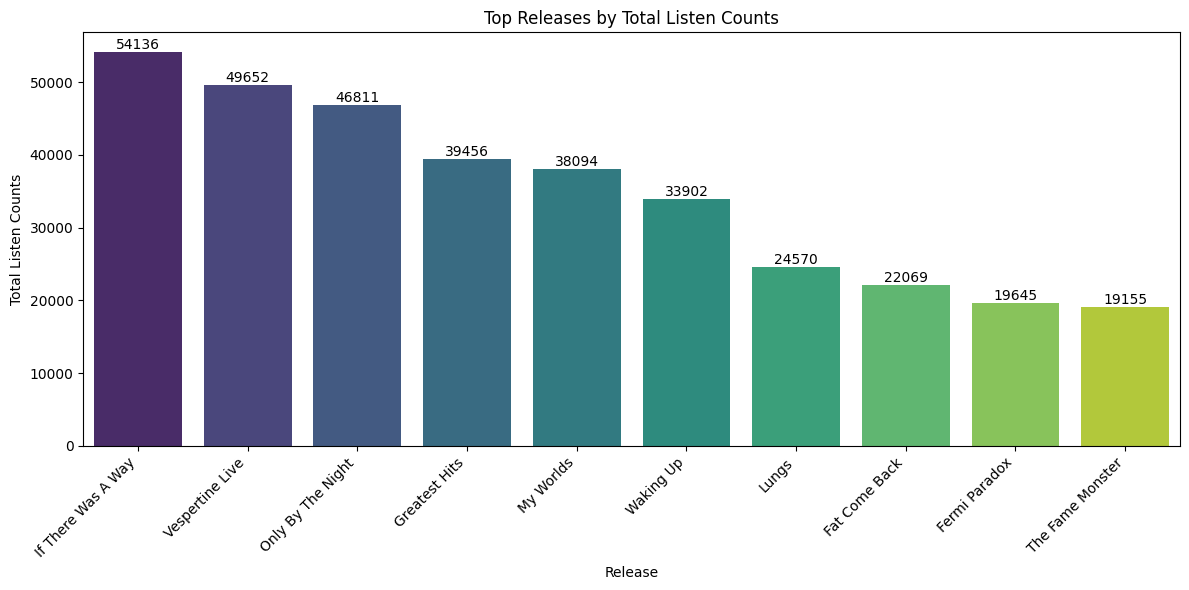

In [ ]:
release_insights(df)

The most played album "If There Was A Way" was played 54136 times.

### Listen Count analysis

Let's look at the number of listens for a deeper understanding:

In [ ]:
listen_count_df = df.groupby('listen_count')['listen_count'].count()

sorted_listen_count_df = listen_count_df.sort_values(ascending=False)

sorted_listen_count_df.head(20)

listen_count
1     935948
2     254896
3     116008
5      73317
4      66905
6      36187
7      24482
8      17938
10     14797
9      13298
11      9864
12      7754
13      6299
15      5445
14      5104
16      4145
17      3481
18      2937
20      2562
19      2526
Name: listen_count, dtype: int64

We can see that there are 935,948 out of 1,627,878  plays of songs that the user has listened only once.<br>
Can we conclude that he didn't like the song and therefore never listened to it again?

In [ ]:
def plot_listen_count_distribution(listen_count_df, max_listen_count):
    listen_count_range = range(1, max_listen_count + 1)
    listen_count_counts = [listen_count_df.get(count, 0) for count in listen_count_range]

    plt.figure(figsize=(10, 6))
    plt.bar(listen_count_range, listen_count_counts, color='lightgreen')
    plt.title('Listen Count Distribution')
    plt.xlabel('Listen Count')
    plt.ylabel('Number of Plays')
    plt.xticks(listen_count_range, rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Annotate each bar with its corresponding value on the y-axis
    for i, count in enumerate(listen_count_counts):
        plt.text(i + 1, count, str(count), ha='center', va='bottom')

    plt.show()


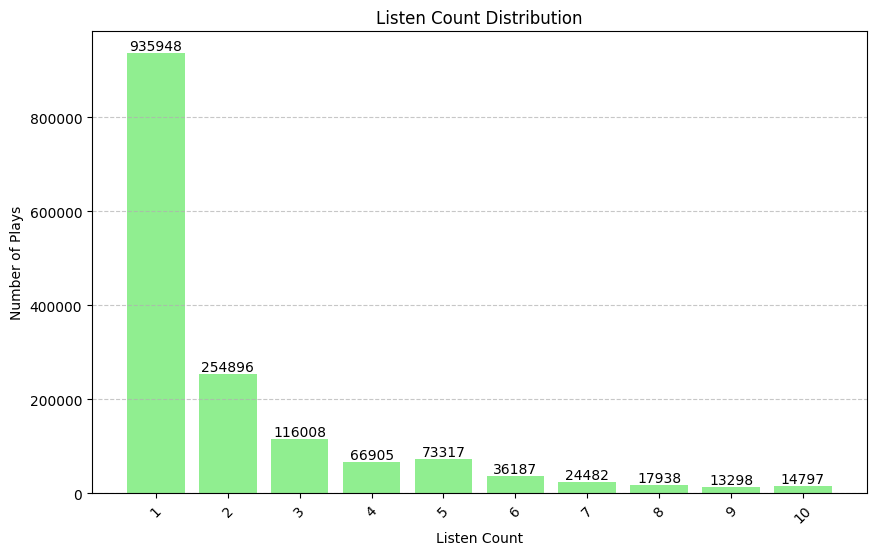

In [ ]:
# Call the function to plot the distribution of listen counts within the range of 1 to max_listen_count
max_listen_count = 10  # Specify the maximum listen count
plot_listen_count_distribution(sorted_listen_count_df, max_listen_count)

In [ ]:
sorted_listen_count_df.tail(100)

listen_count
152     2
207     2
292     2
215     2
224     2
       ..
250     1
246     1
243     1
236     1
2213    1
Name: listen_count, Length: 100, dtype: int64

What we saw now is how many samples there are for each 'listen_count' number.

Now, we would like to see the number of different users for each 'listen_count' group:

In [ ]:
def calculate_users_per_listen_count(df):
    """
    Calculate the number of different users for each listen count group.

    Parameters:
        df (DataFrame): DataFrame containing the data.

    Returns:
        DataFrame: DataFrame containing the number of users for each listen count group.
    """
    # Group by listen count and count the number of unique users
    users_per_listen_count = df.groupby('listen_count')['user_id'].nunique().reset_index(name='num_users')
    return users_per_listen_count

def plot_users_per_listen_count(users_per_listen_count, n=20):
    """
    Plot the number of different users for each listen count group up to n listen counts.

    Parameters:
        users_per_listen_count (DataFrame): DataFrame containing the number of users for each listen count group.
        n (int): Maximum number of listen counts to plot.
    """
    plt.figure(figsize=(15, 6))
    plt.bar(users_per_listen_count['listen_count'][:n], users_per_listen_count['num_users'][:n], color='skyblue')
    plt.title('Number of Users per Listen Count (Up to ' + str(n) + ' listen counts)')
    plt.xlabel('Listen Count')
    plt.ylabel('Number of Users')
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Add numbers on top of each column
    for i, num_users in enumerate(users_per_listen_count['num_users'][:n]):
        plt.text(users_per_listen_count['listen_count'][i], num_users + 50, str(num_users), ha='center', va='bottom')

    plt.show()

In [ ]:
# Call the function to calculate the number of users per listen count
users_per_listen_count_df = calculate_users_per_listen_count(df)

# Print the DataFrame
users_per_listen_count_df

listen_count  num_users
0               1      72894
1               2      55976
2               3      39329
3               4      28704
4               5      31325
..            ...        ...
274           676          1
275           683          1
276           879          1
277           920          1
278          2213          1

[279 rows x 2 columns]

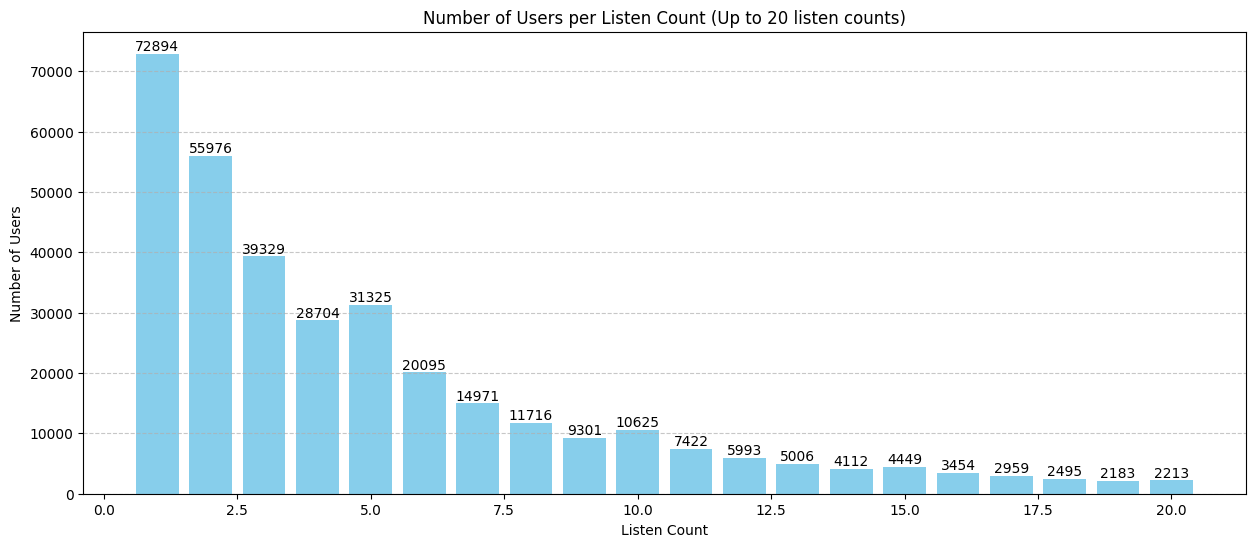

In [ ]:
# Call the function to plot the number of users per listen count for up to n listen counts
plot_users_per_listen_count(users_per_listen_count_df, n=20)

It can be concluded that almost every user has a song he listened to only 1 time.<br>
Moreover, there is one special user who listened the same song 2213 times.<br>
Of course, this greatly favors this particular song in our system.

Some data on this observation:

In [ ]:
# Get the index label corresponding to the maximum listen_count
max_listen_count_index = df['listen_count'].idxmax()

# Retrieve the entire row from df using the index label
row_with_max_listen_count = df.loc[max_listen_count_index]

print("Row with the largest listen count:")
print(row_with_max_listen_count)


Row with the largest listen count:
user_id         d13609d62db6df876d3cc388225478618bb7b912
song_id                               SOFCGSE12AF72A674F
listen_count                                        2213
title                                          Starshine
release                                         Gorillaz
artist_name                                     Gorillaz
year                                                2000
Name: 1228366, dtype: object


### User analysis

Now, the top 10 users by the number of their listens count:

In [ ]:
def get_top_active_users(df, n=10):
    return df.groupby('user_id')['listen_count'].sum().sort_values(ascending=False).head(n)

In [ ]:
get_top_active_users(df)

user_id
6d625c6557df84b60d90426c0116138b617b9449    2898
d13609d62db6df876d3cc388225478618bb7b912    2597
4be305e02f4e72dad1b8ac78e630403543bab994    2539
70caceccaa745b6f7bc2898a154538eb1ada4d5a    1936
0b19fe0fad7ca85693846f7dad047c449784647e    1903
283882c3d18ff2ad0e17124002ec02b847d06e9a    1888
5ea608df0357ec4fda191cb9316fe8e6e65e3777    1770
6a944bfe30ae8d6b873139e8305ae131f1607d5f    1757
9c859962257112ad523f1d3c121d35191daa6d2b    1717
6ccd111af9b4baa497aacd6d1863cbf5a141acc6    1697
Name: listen_count, dtype: int64

In [ ]:
active_users = get_top_active_users(df, df['user_id'].nunique())

In [ ]:
print(active_users.tail(1000))

user_id
9681407fe977fbe8a4a56356f3d93201c503509c    2
4ce0dc0a701133546070e33c4fad5f21d57e52c1    2
3909ac53dd5e5456c0e1de3af170e846ae08cf86    2
b25f3c62649a8b836dc0920d8f9b8f03ed20fa5d    2
b258dfa87711800879b8e26c9b52ed2a8401db95    2
                                           ..
13dd2785ef3c8f415678c3dd8a4afe6626ebfeb8    1
f0d02e65d587f7422cd14ad60eec4fa083c240ce    1
13ce58369594724ac9b49ef6db673a430ad2141a    1
a7a4e02ea22ad83e3c78cb0bfee9b5c92c39abe7    1
b923c4fc244d671f96ede79a60b10da1583ddab2    1
Name: listen_count, Length: 1000, dtype: int64


Let's see some distribution about the users and their listens count:

In [ ]:
def plot_user_listen_count_distribution(active_users):
    plt.figure(figsize=(10, 6))
    plt.hist(active_users, bins=20, color='Crimson', edgecolor='black')
    plt.title('Distribution of Listen Count for Active Users')
    plt.xlabel('Total Listen Count')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

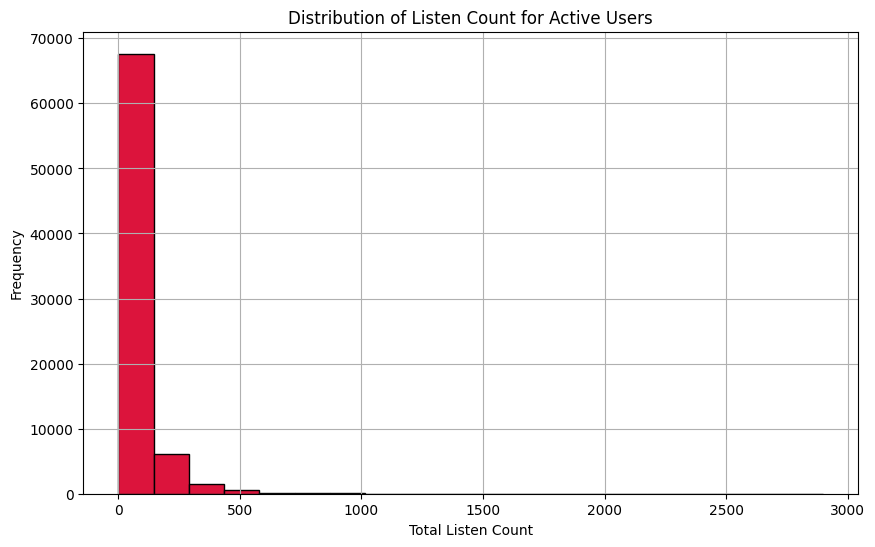

In [ ]:
plot_user_listen_count_distribution(active_users)

We can see that there are a lot of users that have listened to only few songs.

It is easy to see that the first column in the output contains the most observations. We would like to refer only to users who have listened to enough songs to be part of our recommendation system.

Let's ignore users who have listened to songs less or equal to 200 times.

In [ ]:
filtered_users = active_users[active_users > 200]
filtered_users

user_id
6d625c6557df84b60d90426c0116138b617b9449    2898
d13609d62db6df876d3cc388225478618bb7b912    2597
4be305e02f4e72dad1b8ac78e630403543bab994    2539
70caceccaa745b6f7bc2898a154538eb1ada4d5a    1936
0b19fe0fad7ca85693846f7dad047c449784647e    1903
                                            ... 
ea5ce8359bb00078674794f13c20ae1cdc62c923     201
0a1a3dd772aa44796c5edb468f5d55c25330a754     201
848553482edda04366bc378d69b9ea145db3b757     201
b89435cbcb3970925816131ff4f981c3b0be5fe0     201
50fa0db6886e966968a029269e57fe8fca3f1ce2     201
Name: listen_count, Length: 4847, dtype: int64

In [ ]:
# Count the number of users who their listen count is more than 200 songs
num_users_above_200 = len(active_users[active_users > 200])
print("Number of users who their listen count is more than 200:", num_users_above_200)
num_users_below_or_equal_200 = df['user_id'].nunique() - num_users_above_200
print("Number of users who their listen count is less than or equal to 200 songs:", num_users_below_or_equal_200)

Number of users who their listen count is more than 200: 4847
Number of users who their listen count is less than or equal to 200 songs: 71210


There are only 7209 users with more than 200 listens to songs.<br>

Another look, but now after filtering the data to only users who listened to songs at least 200 times.

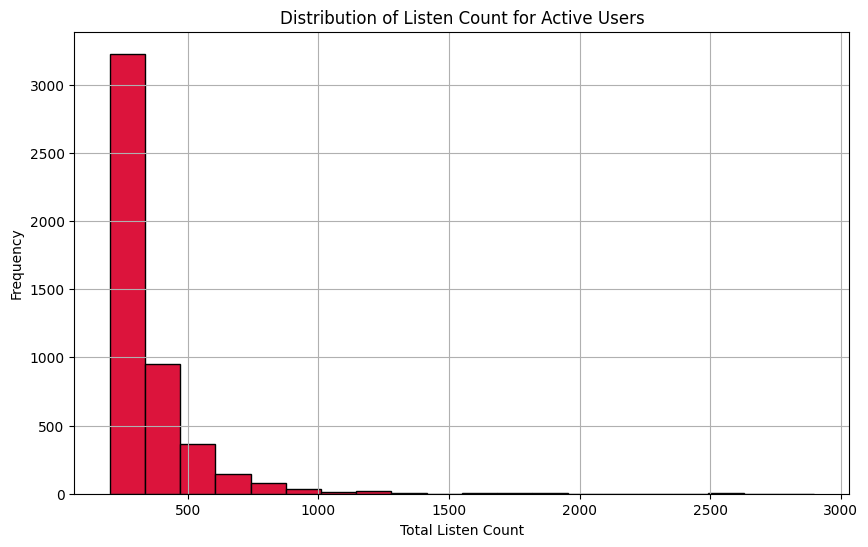

In [ ]:
plot_user_listen_count_distribution(filtered_users)

In [ ]:
# Count the number of users who their listen count is more than 1000 songs
num_users_above_1000 = len(active_users[active_users > 1000])
print("Number of users who their listen count is more than 1000:", num_users_above_1000)
num_users_below_or_equal_1000 = df['user_id'].nunique() - num_users_above_1000
print("Number of users who their listen count is less than or equal to 1000 songs:", num_users_below_or_equal_1000)

Number of users who their listen count is more than 1000: 53
Number of users who their listen count is less than or equal to 1000 songs: 76004


Only 53 different users has more than 1000 music listens count.

The results we see here are not good enough. <br>
Maybe all the listen counts of a user are from only one song? Or to a very small number of songs?? Do we want to include such users in our recommendation model?

We would like to refer to users according to the number of different songs they heard and not according to the number of listens they have to the music.
Users who are not active enough, do not represent the preferences of the population as they should. <br>

For our recommendation system to work well enough, it would be desirable to let it learn songs and recommend songs learned from users who have heard enough different songs.

Another look on the user's:

In [ ]:
def count_songs_per_user(df):
    """
    Count the number of different songs each user listened to and sort the result in descending order.

    Parameters:
        df (DataFrame): The DataFrame containing the song data.

    Returns:
        Series: A Series containing the user_id as the index and the number of different songs listened to by each user as the values,
                sorted in descending order.
    """
    # Group the DataFrame by 'user_id' and count the number of songs each user listened to
    user_listen_counts = df.groupby('user_id').size()

    # Sort the user listen counts in descending order
    sorted_user_listen_counts = user_listen_counts.sort_values(ascending=False)

    return sorted_user_listen_counts

In [ ]:
# Call the function to count the number of songs listened to by each user
sorted_user_listen_counts = count_songs_per_user(df)

# Print the sorted number of songs each user listened to
print("Number of different songs each user listened to (sorted):")
print(sorted_user_listen_counts)

Number of different songs each user listened to (sorted):
user_id
6d625c6557df84b60d90426c0116138b617b9449    602
fbee1c8ce1a346fa07d2ef648cec81117438b91f    577
4e11f45d732f4861772b2906f81a7d384552ad12    473
1aa4fd215aadb160965110ed8a829745cde319eb    468
6a9cf03dfb2fc82f5b3b043c9c3fdbab997fd54d    449
                                           ... 
3c205663c5f9ea57f79cf63ee7d51d15395913c9      1
adab5babca2278e4db4c0ffa45812e30c5dddb15      1
3c57ce98d816f5b332120f2ed7093a3c7830c9d4      1
f879c1c706100c314157a372668c48f23e2d54fb      1
8024a1ce24a9364ba195f98f6ee872d018da7d17      1
Length: 76057, dtype: int64


We can learn that the user who listened to the most different songs listened to 602 songs.

Before we dilute our data -<br>
We would like to understand how many users meet the criteria: how many users have listened to more than 'n' different songs?

In [ ]:
def filter_users(df, min_listen_counts=[30, 60, 90, 120, 150]):
    results = {}
    for min_listen_count in min_listen_counts:
        # Group by 'user_id' and count the number of rows for each user
        user_listen_counts = df.groupby('user_id').size()

        # Filter users based on the minimum listen count
        filtered_users = user_listen_counts[user_listen_counts >= min_listen_count]

        # Get the DataFrame containing only the observations for the filtered users
        filtered_df = df[df['user_id'].isin(filtered_users.index)]

        # Get the user IDs of the filtered users
        filtered_user_ids = filtered_users.index

        # Count the number of users who meet the criterion
        num_filtered_users = len(filtered_user_ids)

        # Count the number of users who did not meet the criterion
        num_non_filtered_users = len(user_listen_counts) - num_filtered_users

        # Store the results
        results[min_listen_count] = {'filtered_df': filtered_df, 'num_filtered_users': num_filtered_users, 'num_non_filtered_users': num_non_filtered_users}

    return results

In [ ]:
# Filter out users who have listened to more than 30, 60, 90, 120, and 150 songs respectively and get the counts
filtered_results = filter_users(df, min_listen_counts=[30, 60, 90, 120, 150])

# Print the results for each minimum listen count
for min_listen_count, result in filtered_results.items():
    print(f"\nResults for minimum song count of {min_listen_count}:")
    print("Filtered DataFrame:")
    result['filtered_df']
    print("Number of users who have listened to more than", min_listen_count, " different songs:", result['num_filtered_users'])
    print("Number of users who have listened to less than or equal to", min_listen_count, " different songs:", result['num_non_filtered_users'])



Results for minimum song count of 30:
Filtered DataFrame:
Number of users who have listened to more than 30  different songs: 15762
Number of users who have listened to less than or equal to 30  different songs: 60295

Results for minimum song count of 60:
Filtered DataFrame:
Number of users who have listened to more than 60  different songs: 5069
Number of users who have listened to less than or equal to 60  different songs: 70988

Results for minimum song count of 90:
Filtered DataFrame:
Number of users who have listened to more than 90  different songs: 2056
Number of users who have listened to less than or equal to 90  different songs: 74001

Results for minimum song count of 120:
Filtered DataFrame:
Number of users who have listened to more than 120  different songs: 969
Number of users who have listened to less than or equal to 120  different songs: 75088

Results for minimum song count of 150:
Filtered DataFrame:
Number of users who have listened to more than 150  different son

In [ ]:
def plot_filtered_results(filtered_results):
    min_listen_counts = sorted(filtered_results.keys())
    num_filtered_users_list = []
    num_non_filtered_users_list = []

    for min_listen_count in min_listen_counts:
        result = filtered_results[min_listen_count]
        num_filtered_users_list.append(result['num_filtered_users'])
        num_non_filtered_users_list.append(result['num_non_filtered_users'])

    # Plotting the results
    bar_width = 0.35
    index = range(len(min_listen_counts))

    plt.figure(figsize=(12, 6))
    plt.bar([i + bar_width for i in index], num_filtered_users_list, bar_width, label='More than', color="Crimson")
    plt.bar(index, num_non_filtered_users_list, bar_width, label='Less than or equal to', color="lightgrey")

    plt.xlabel('Minimum Different Songs Count Per User')
    plt.ylabel('Number of Users')
    plt.title('Number of Users by Minimum Different Songs Count')
    plt.xticks([i + bar_width / 2 for i in index], min_listen_counts)
    plt.legend()

    # Annotate each bar with its corresponding value on the y-axis
    for i, v in enumerate(num_filtered_users_list):
        plt.text(i + bar_width, v, str(v), ha='center', va='bottom')
    for i, v in enumerate(num_non_filtered_users_list):
        plt.text(i, v, str(v), ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

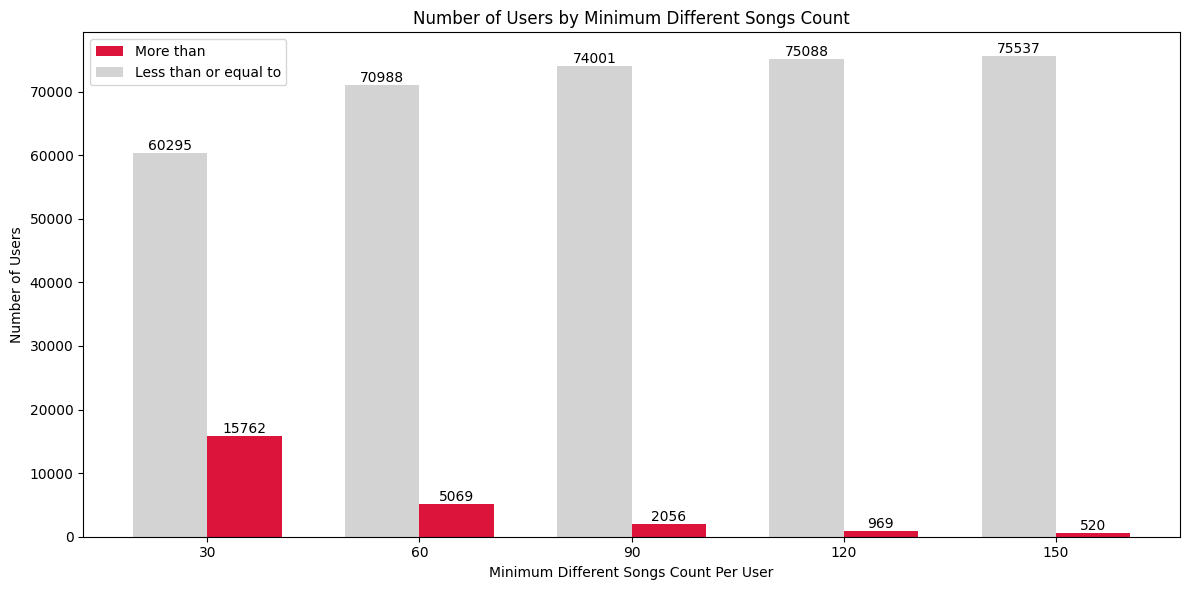

In [ ]:
# Plot the filtered results
plot_filtered_results(filtered_results)

Seems like 90 is a great restriction. There are enough users who have heard more than 90 different songs.<br>
As indicated in the output, the number of users who have listened to more than 90 different songs is 2056.

### Rating analysis

Generate a rating scale:

In order to create a rating system, we will want our data to be restricted to users that have listened to every song at most 'n' times. In this way, listen_count can be used as a rating system, with values between 1 and n. <br>
(there is no 0 rating, our data is users listening to songs, there is no song played less than one time).

Let's take a look on the relevant data:

First, to make sure we have enough data left, we would like to check how many users are left after the restriction:

In [ ]:
def filter_users_by_max_listen_count(df, start_count=3, end_count=15):
    max_listen_counts = range(start_count, end_count + 1)
    ratings = {}

    for max_listen_count in max_listen_counts:
        # Group the data by 'user_id' and calculate the maximum listen count for each user
        max_listen_counts = df.groupby('user_id')['listen_count'].max()

        # Filter out the users whose maximum listen count is greater than the specified maximum listen count
        relevant_users = max_listen_counts[max_listen_counts <= max_listen_count]

        # Filter the original DataFrame to include only the relevant users
        filtered_df = df[df['user_id'].isin(relevant_users.index)]

        # Count the number of users left after filtering
        num_users_left = len(relevant_users)

        ratings[max_listen_count] = num_users_left
        print(f"Number of users left for max listen count of {max_listen_count}: {num_users_left}")

    return filtered_df, ratings

def plot_users_left(ratings):
    # Define a list of colors
    colors = ['purple', 'blue', 'green', 'yellow', 'orange', 'red', 'brown', 'pink']

    plt.figure(figsize=(10, 6))
    # Iterate over each key-value pair in the ratings dictionary and plot a bar with a different color
    for i, (max_listen_count, num_users_left) in enumerate(ratings.items()):
        plt.bar(max_listen_count, num_users_left, color=colors[i % len(colors)])

        # Annotate each bar with its corresponding value on the y-axis
        plt.text(max_listen_count, num_users_left, str(num_users_left), ha='center', va='bottom')

    plt.title('Number of Users Left vs Maximum Listen Count')
    plt.xlabel('Maximum Listen Count')
    plt.ylabel('Number of Users Left')
    plt.xticks(list(ratings.keys()))
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

Number of users left for max listen count of 3: 22774
Number of users left for max listen count of 4: 27405
Number of users left for max listen count of 5: 34784
Number of users left for max listen count of 6: 39274
Number of users left for max listen count of 7: 42591
Number of users left for max listen count of 8: 45292
Number of users left for max listen count of 9: 47450
Number of users left for max listen count of 10: 50841
Number of users left for max listen count of 11: 53030
Number of users left for max listen count of 12: 54903
Number of users left for max listen count of 13: 56439
Number of users left for max listen count of 14: 57741
Number of users left for max listen count of 15: 59415


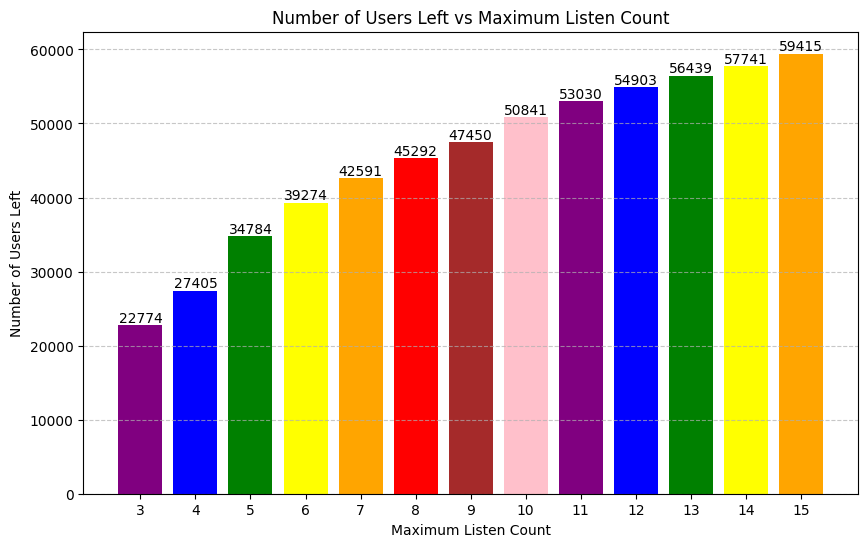

In [ ]:
# Call the function to check max listen counts from 3 to 10
filtered_df, ratings = filter_users_by_max_listen_count(df, start_count=3, end_count=15)

# Plot the results
plot_users_left(ratings)

Seems like when the rating scale is from 1-10, we left with 50841 relevant users - enough data to work with.<br>


Next, we would like to see how the 'listen_count' dispersing between the data after restrictions.

We would like to keep only the users who meet the criteria: those who have not heard a song more than 'n' times.<br>
The minimum is 3.
We would like to divide our data into at least 3 different ratings. (If there are less than 3 different ratings, our rating system will not be diversified enough).

In [ ]:
def plot_listen_counts_range(df, start_count=3, end_count=15):
    # Define a list of colors
    colors = ['blue', 'green', 'orange', 'red', 'purple', 'brown', 'pink', 'cyan']

    for max_listen_counts in range(start_count, end_count + 1):
        # Group the DataFrame by 'user_id' and calculate the maximum listen count for each user
        max_listen_counts_users = df.groupby('user_id')['listen_count'].max()

        # Filter out users who have listened to a song more than the specified maximum listen count
        relevant_users = max_listen_counts_users[max_listen_counts_users <= max_listen_counts].index

        # Filter the original DataFrame to include only the relevant users
        filtered_df = df[df['user_id'].isin(relevant_users)]

        # Count the occurrences of each listen count
        listen_count_counts = filtered_df['listen_count'].value_counts().sort_index()

        # Plot the results with different color for each column
        plt.figure(figsize=(10, 6))
        for i, (listen_count, frequency) in enumerate(zip(listen_count_counts.index, listen_count_counts.values)):
            plt.bar(listen_count, frequency, color=colors[i % len(colors)])
            # Annotate each bar with its frequency
            plt.text(listen_count, frequency, str(frequency), ha='center', va='bottom')

        plt.title(f'Number of Listen Counts (1-{max_listen_counts})')
        plt.xlabel('Listen Count')
        plt.ylabel('Frequency')
        plt.xticks(listen_count_counts.index)
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.show()

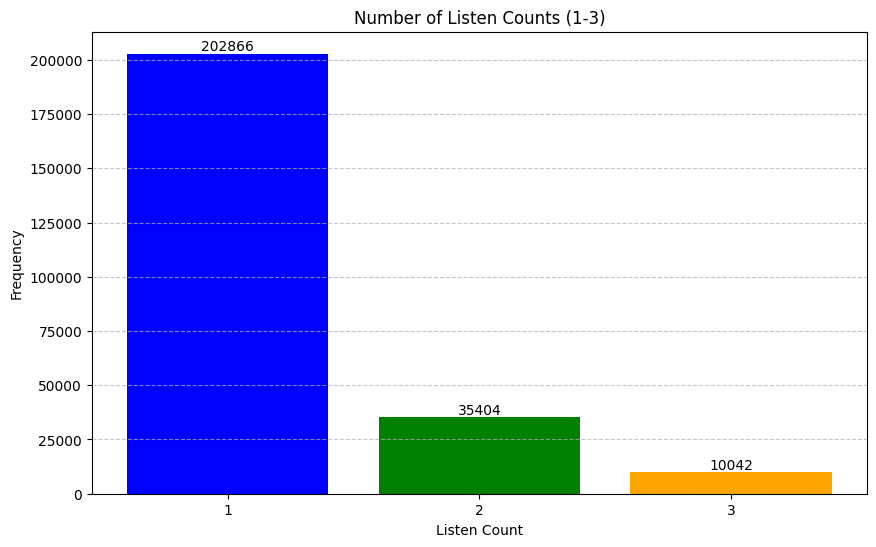

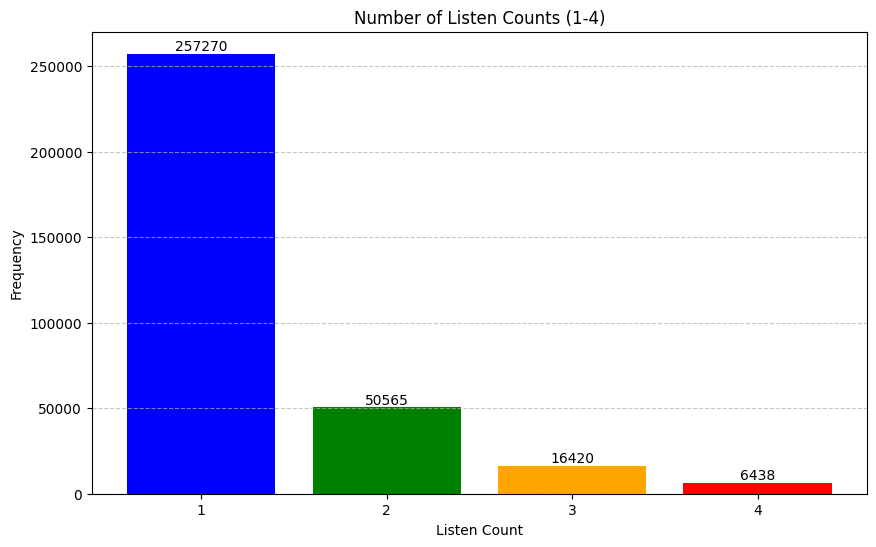

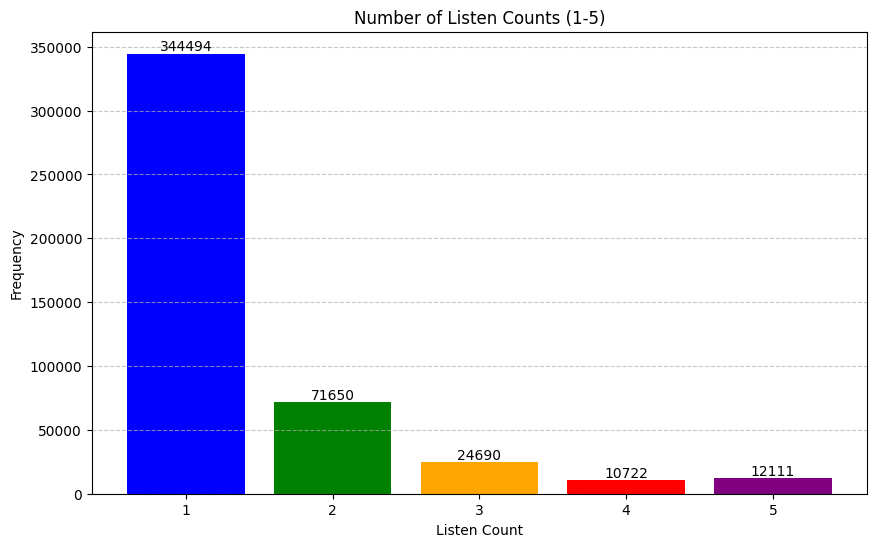

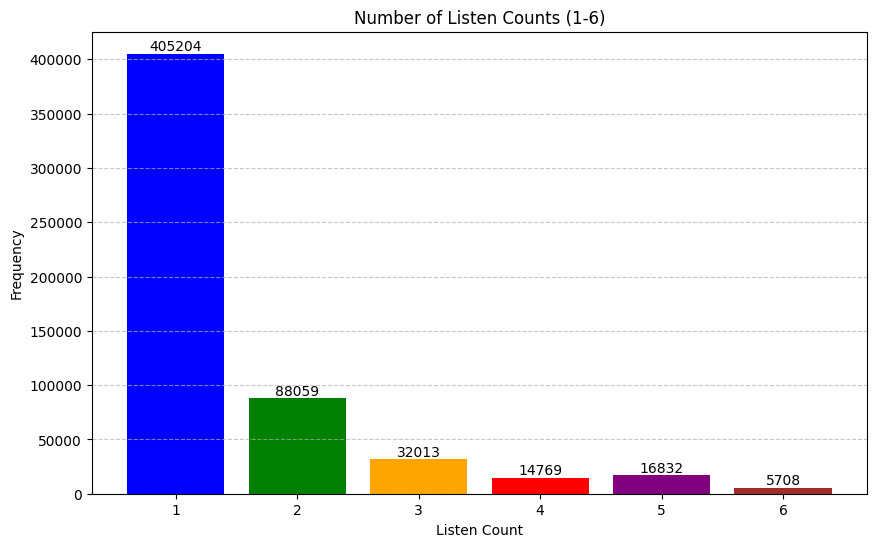

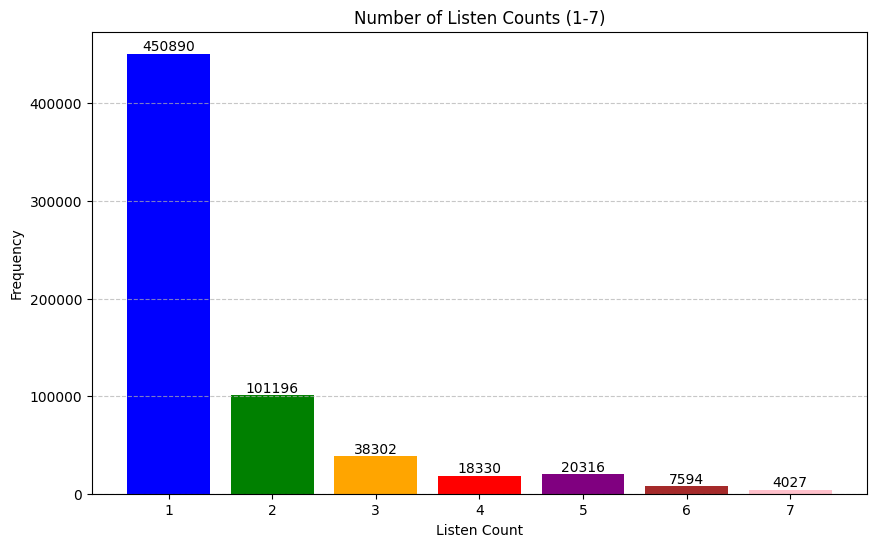

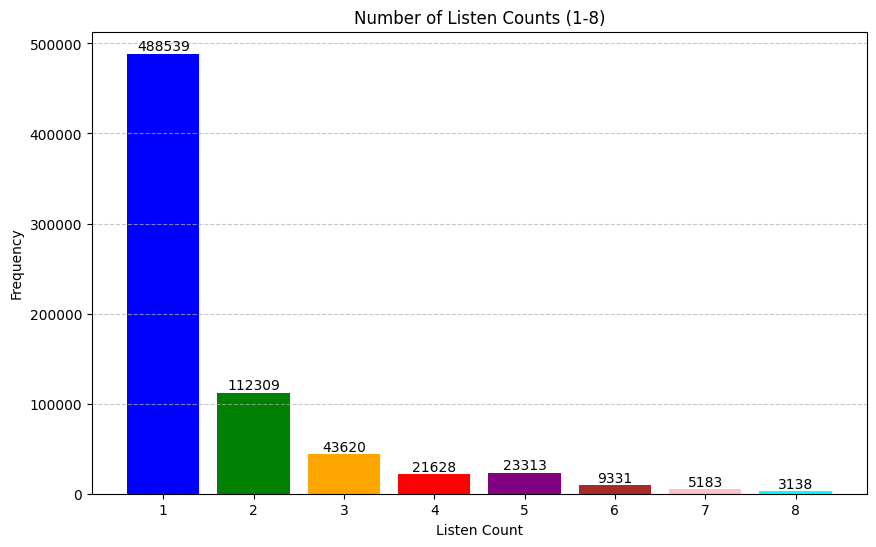

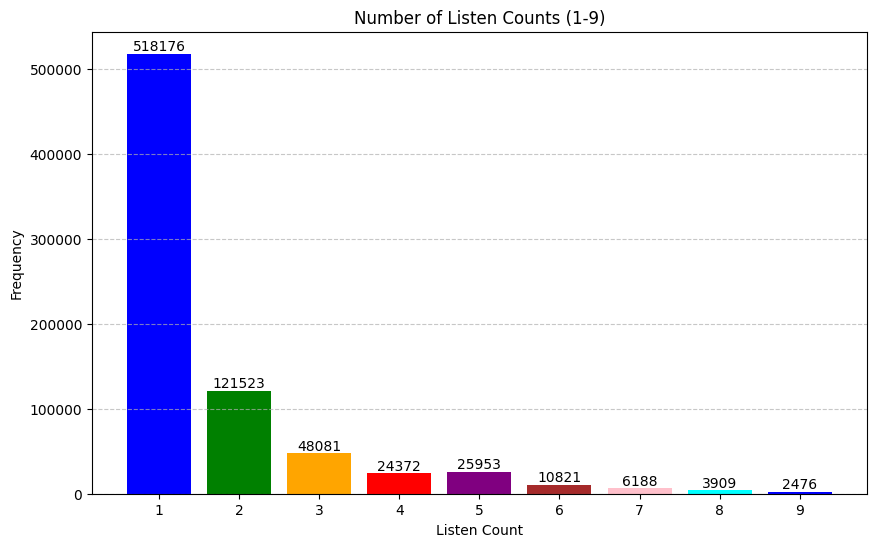

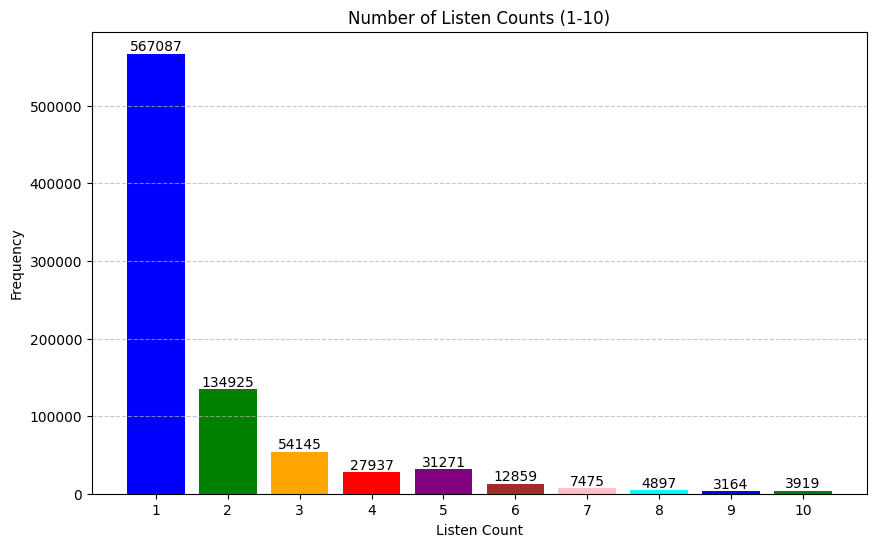

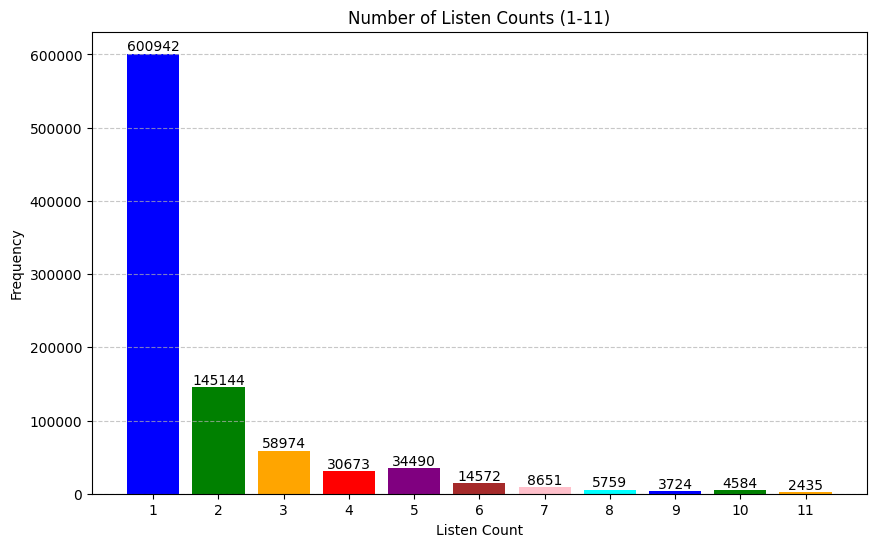

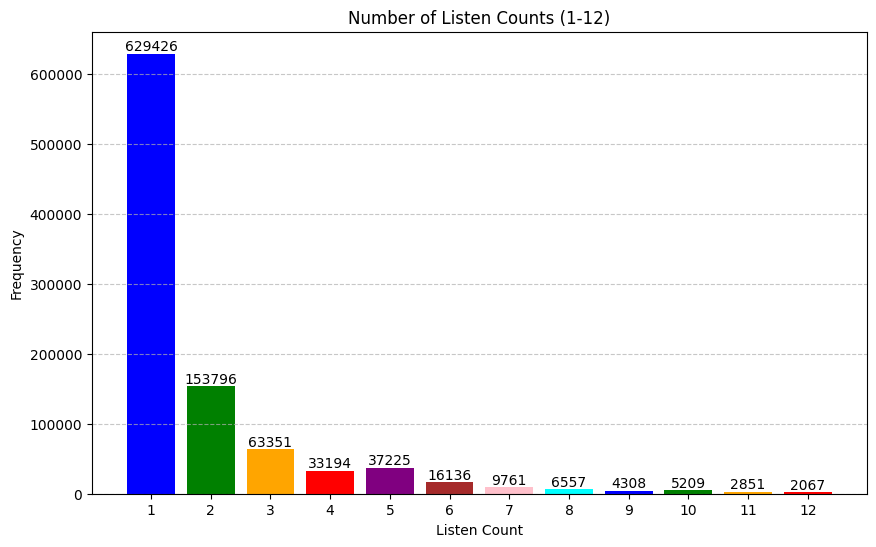

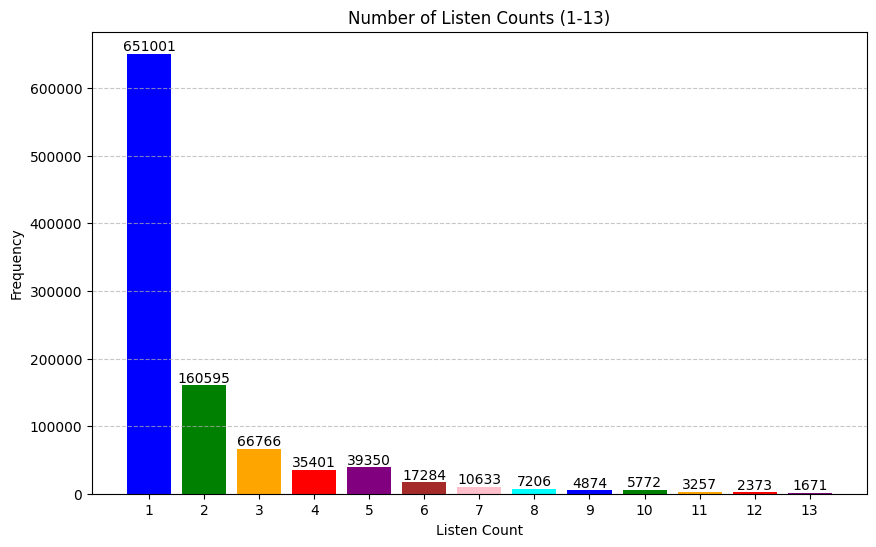

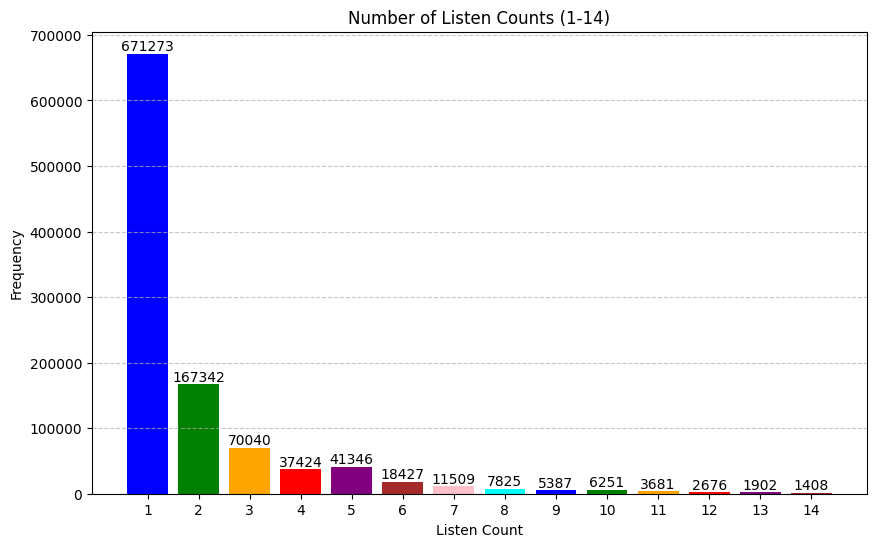

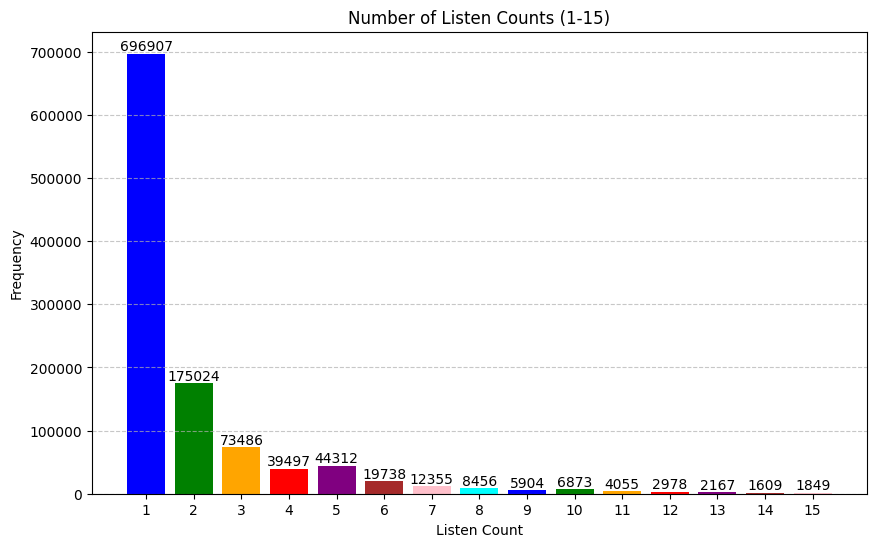

In [ ]:
# Call the function with start_count=3 and end_count=15
plot_listen_counts_range(df, start_count=3, end_count=15)

<!-- We can see that starting with a number of listenings of 6 or more, the amount of listenings is less than 10000 and increases a little each time - almost 2.5 times smaller than the column of 5.<br> -->

It seems that it will be enough to limit our data to users who their most played song have listened to up to 10 times in total.<br>

We will deal with all of that later..


# Preprocessing

TODO להבין כמו שצריך האם צריך לאזן את כל הנתונים כך שתהיה כמות זהה של דירוגים 1-5. איזון כזה עלול לפגוע במסקנות שלנו מהנתונים שקיבלנו, לא נרצה להתעלם מהעבודה שיש כמות משמעותית גדולה יותר של שירים שהושמעו פעם אחת בלבד. לחקור איזון ולהבין איך עובדים איתו והאם צריך.


שאלה נוספת, האם צריך לבצע חקר נוסף אחרי הורדת חלק מהמשתמשים או השירים ורק אז לבדוק דירוג 1-5 וכמה עונים עליו. לחקור מה לפני מה והאם המסקנות הסופיות נשארות זהות.

In [ ]:
# Apply a label-encoding for user_id and song_id attributes.
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
combined_df['user_id'] = label_encoder.fit_transform(combined_df['user_id'])
combined_df['song_id'] = label_encoder.fit_transform(combined_df['song_id'])

In [ ]:
combined_df

user_id  song_id  listen_count                           title  \
1          54752      338             2                 Entre Dos Aguas   
2          54752      605             1                        Stronger   
3          54752      618             1                  Constellations   
4          54752      972             1                    Learn To Fly   
5          54752     1010             5    Apuesta Por El Rock 'N' Roll   
...          ...      ...           ...                             ...   
1999994    64343     2767             4          Unwell (Album Version)   
1999996    64343     3051             4          Two Is Better Than One   
1999997    64343     3059             3  What I've Done (Album Version)   
1999998    64343     3182             1                              Up   
1999999    64343     3239             1      Soil_ Soil (Album Version)   

                               release  \
1                  Flamenco Para Niños   
2                           Graduation   
3                    In Between Dreams   
4        There Is Nothing Left To Lose   
5                Antología Audiovisual   
...                                ...   
1999994    More Than You Think You Are   
1999996                     Love Drunk   
1999997                 What I've Done   
1999998                      My Worlds   
1999999                        The Con   

                                    artist_name  year  
1                                 Paco De Lucia  1976  
2                                    Kanye West  2007  
3                                  Jack Johnson  2005  
4                                  Foo Fighters  1999  
5                           Héroes del Silencio  2007  
...                                         ...   ...  
1999994                         matchbox twenty  2003  
1999996  Boys Like Girls featuring Taylor Swift  2009  
1999997                             Linkin Park  2007  
1999998                           Justin Bieber  2010  
1999999                          Tegan And Sara  2007  

[1627878 rows x 7 columns]

We decided after deep research to filter the data we have according to 2 main criteria: We would not like to include in the data:
1. Users who have listened to less than 30 different songs
2. Songs that have been listened to by less than 120 different users

The question arises is how to do it:<br>
a. First get rid of the users who do not meet the criteria we defined and then to get rid from the songs.<br>
b. or alternatively, first get rid of the songs that do not meet the criteria, and then the users.

We first thought of getting rid of the songs that weren't played by enough users and only then getting rid of the users who didn't listen to enough songs,
so the songs we omitted will be omitted from the users who listened them.

We have identified a problem, we would like to judge each user by all the songs he heard and not just by some of them. Diluting the songs first will hurt users who met the criteria but are now disqualified because songs they heard were already omitted from the data. For the reliability and correctness of our recommendation system, we would like to include users in the system even if the songs they hear are special songs.

It would be more correct to first dilute the users who have not listened to enough songs, to ensure that the recommendation system only learns from sufficiently active users. After that, we'll thin out the songs that haven't been played by enough different users.

<b>In conclusion, we chose option a. 1 and then 2. To get rid of the users before getting rid of the songs.<b>


---

<b>

Final conclusions before implementing:
Filter the dataset, by removing, in this order (a-d):

a. The songs that their released year is 0 - Done at the EDA.

b. Users who have listened to less than 30 songs.

c. Songs that have been listened to by less than 120 users.

d. Rating system - we will limit the users to only those who have listened to   each song no more than 10 times.


<b>

---




---

<b>

Final conclusions before implementing:
Filter the dataset, by removing, in this order (a-d):

a. The songs that their released year is 0 - Done at the EDA.

b. Users who listened to too few different songs.

c. Songs that too few different users have listened to.

d. Rating system - we will limit the users to only those who have listened to   each song no more than n times.


Let's do a final research to decide the limit for each of this states.
<b>

---



In [ ]:
df_final = combined_df.copy()

In order from b-d, we will start researching and applying the final changes to our original df :

In [ ]:
df_final_before_users = combined_df.copy()

### Dropping users < 30 different songs

<b>

b. Dropping users who have listened to less than 30 songs.

</b>

In [ ]:
b = 30

- Before implementing our find, we will do some final research:

In [ ]:
shape_before_dropping_b = df_final.shape
print("Shape of our df before dropping users <",b ,": ", shape_before_dropping_b)

# Sum the values in the 'listen_count' column
listen_count_before_dropping_b = df_final['listen_count'].sum()
print("Sum of all the listen count before dropping users <",b ,": ", listen_count_before_dropping_b)

different_song_count_before_dropping_b = df_final['song_id'].nunique()
print("Number of different songs before dropping dropping users <",b ,": ", different_song_count_before_dropping_b)

different_user_count_before_dropping_b = df_final['user_id'].nunique()
print("Number of different users before dropping dropping users <",b ,": ", different_user_count_before_dropping_b)

Shape of our df before dropping users < 30 :  (1627878, 7)
Sum of all the listen count before dropping users < 30 :  4849531
Number of different songs before dropping dropping users < 30 :  8227
Number of different users before dropping dropping users < 30 :  76057


In [ ]:
# # Group data on user_id, and count how many different songs each user has listened to.
# group_users = df_final.groupby('user_id').count().reset_index(names=['user_id'])
# # Drop the users that have listened to less than 90 songs.
# df_final = df_final.loc[~df_final['user_id'].isin(group_users[group_users['listen_count'] < b]['user_id'])]

In [ ]:
def drop_users_with_less_songs(df, min_songs):
    """
    Drop users who listened to less than a specified number of different songs.

    Parameters:
        df (DataFrame): The DataFrame containing the song data.
        min_songs (int): Minimum number of different songs required for a user.

    Returns:
        DataFrame: Filtered DataFrame containing users who listened to at least min_songs different songs.
    """
    # Count the number of unique songs each user listened to
    user_song_counts = df.groupby('user_id')['song_id'].nunique()

    # Find users who listened to less than min_songs different songs
    users_to_drop = user_song_counts[user_song_counts < min_songs].index

    # Drop rows corresponding to the users found above
    filtered_df = df[~df['user_id'].isin(users_to_drop)]

    return filtered_df

# Example usage:
df_final = drop_users_with_less_songs(df_final, b)

- By dropping users who listened to less than 90 different songs, we lose some songs that was listened to only by the users we dropped. <br>
Of course, the total number of listens become smaller. <br>
Here are the findings:

In [ ]:
shape_after_dropping_b = df_final.shape
print("Shape of our df after dropping users <",b ,": ", shape_after_dropping_b)

# Sum the values in the 'listen_count' column
listen_count_after_dropping_b = df_final['listen_count'].sum()
print("Sum of all the listen count after dropping users <",b ,": ", listen_count_after_dropping_b)

different_song_count_after_dropping_b = df_final['song_id'].nunique()
print("Number of different songs after dropping dropping users <",b ,": ", different_song_count_after_dropping_b)

different_user_count_after_dropping_b = df_final['user_id'].nunique()
print("Number of different users after dropping dropping users <",b ,": ", different_user_count_after_dropping_b)

Shape of our df after dropping users < 30 :  (933001, 7)
Sum of all the listen count after dropping users < 30 :  2572156
Number of different songs after dropping dropping users < 30 :  8227
Number of different users after dropping dropping users < 30 :  15762


In [ ]:
print("By dropping users <" ,b,", we reduced the amount of samples by:", shape_before_dropping_b[0] - shape_after_dropping_b[0])
print("By dropping users <" ,b,", we reduced the amount of listening by:", listen_count_before_dropping_b - listen_count_after_dropping_b)
print("By dropping users <" ,b,", we reduced the number of songs by:", different_song_count_before_dropping_b - different_song_count_after_dropping_b)
print("By dropping users <" ,b,", we reduced the number of users by:", different_user_count_before_dropping_b - different_user_count_after_dropping_b)

By dropping users < 30 , we reduced the amount of samples by: 694877
By dropping users < 30 , we reduced the amount of listening by: 2277375
By dropping users < 30 , we reduced the number of songs by: 0
By dropping users < 30 , we reduced the number of users by: 60295


In [ ]:
print("BEFORE")
get_top_active_users(df_final_before_users)

BEFORE


user_id
32419    2898
62069    2597
22498    2539
33407    1936
3224     1903
11836    1888
28133    1770
31571    1757
46647    1717
32241    1697
Name: listen_count, dtype: int64

In [ ]:
print("AFTER")
get_top_active_users(df_final)

AFTER


user_id
32419    2898
62069    2597
22498    2539
3224     1903
11836    1888
28133    1770
31571    1757
46647    1717
32241    1697
65269    1677
Name: listen_count, dtype: int64

In [ ]:
# Print the sorted number of songs each user listened to
print("BEFORE - Number of different songs each user listened to (sorted):")
print(count_songs_per_user(df_final_before_users))
print()
# Print the sorted number of songs each user listened to
print("FINAL - Number of different songs each user listened to (sorted):")
print(count_songs_per_user(df_final))

BEFORE - Number of different songs each user listened to (sorted):
user_id
32419    602
74853    577
23205    473
7806     468
31583    449
        ... 
17861      1
51708      1
17937      1
73802      1
38028      1
Length: 76057, dtype: int64

FINAL - Number of different songs each user listened to (sorted):
user_id
32419    602
74853    577
23205    473
7806     468
31583    449
        ... 
69945     30
47873     30
48298     30
69890     30
38027     30
Length: 15762, dtype: int64


In [ ]:
# Filter out users who have listened to more than 30, 60, 90, 120, and 150 songs respectively and get the counts
filtered_results_before = filter_users(df_final_before_users, min_listen_counts=[30, 60, 90, 120, 150])

print("BEFORE")
# Print the results for each minimum listen count
for min_listen_count, result in filtered_results_before.items():
    print(f"\nResults for minimum song count of {min_listen_count}:")
    print("Filtered DataFrame:")
    result['filtered_df']
    print("Number of users who have listened to more than", min_listen_count, " different songs:", result['num_filtered_users'])
    print("Number of users who have listened to less than or equal to", min_listen_count, " different songs:", result['num_non_filtered_users'])

print()

# Filter out users who have listened to more than 30, 60, 90, 120, and 150 songs respectively and get the counts
filtered_results_final = filter_users(df_final, min_listen_counts=[30, 60, 90, 120, 150])

print("FINAL")
# Print the results for each minimum listen count
for min_listen_count, result in filtered_results_final.items():
    print(f"\nResults for minimum song count of {min_listen_count}:")
    print("Filtered DataFrame:")
    result['filtered_df']
    print("Number of users who have listened to more than", min_listen_count, " different songs:", result['num_filtered_users'])
    print("Number of users who have listened to less than or equal to", min_listen_count, " different songs:", result['num_non_filtered_users'])



BEFORE

Results for minimum song count of 30:
Filtered DataFrame:
Number of users who have listened to more than 30  different songs: 15762
Number of users who have listened to less than or equal to 30  different songs: 60295

Results for minimum song count of 60:
Filtered DataFrame:
Number of users who have listened to more than 60  different songs: 5069
Number of users who have listened to less than or equal to 60  different songs: 70988

Results for minimum song count of 90:
Filtered DataFrame:
Number of users who have listened to more than 90  different songs: 2056
Number of users who have listened to less than or equal to 90  different songs: 74001

Results for minimum song count of 120:
Filtered DataFrame:
Number of users who have listened to more than 120  different songs: 969
Number of users who have listened to less than or equal to 120  different songs: 75088

Results for minimum song count of 150:
Filtered DataFrame:
Number of users who have listened to more than 150  differ

BEFORE


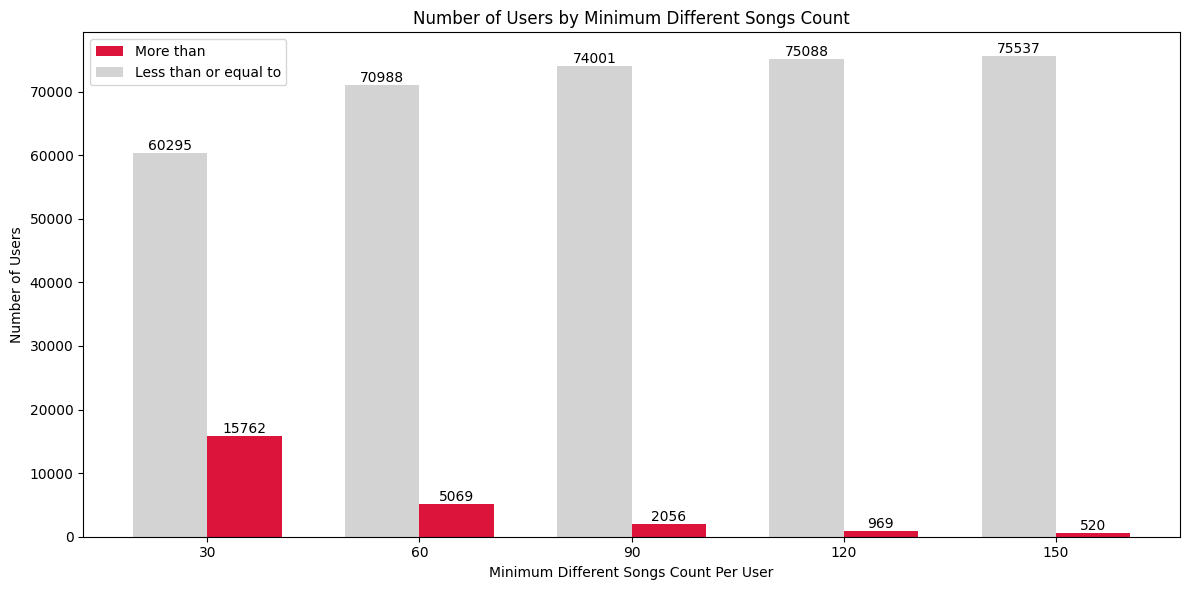


AFTER


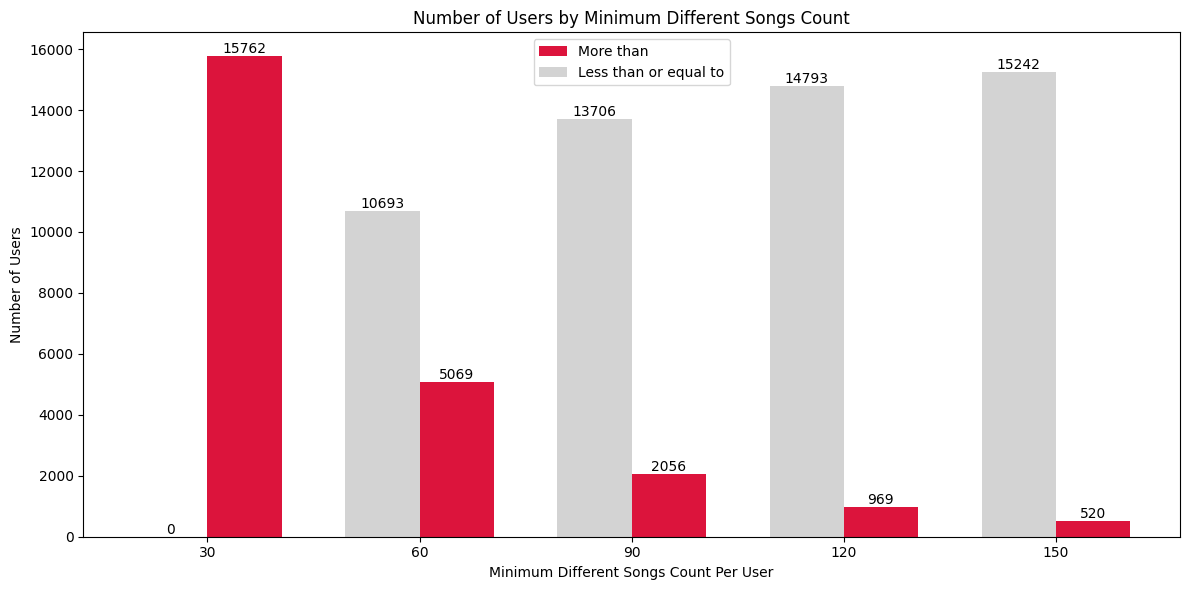

In [ ]:
print("BEFORE")
# Plot the filtered results
plot_filtered_results(filtered_results_before)

print()

print("AFTER")
# Plot the filtered results
plot_filtered_results(filtered_results_final)



---



### Dropping songs < 120 different users

<b>

c. Dropping songs that have been listened to by less than 120 users:

</b>

In [ ]:
c = 120

In [ ]:
df_final_before_songs = df_final.copy()

- Before implementing our find, we will do some final research:

In [ ]:
shape_before_dropping_c = df_final.shape
print("Shape of our df before dropping songs <", c, ":", shape_before_dropping_c)

# Sum the values in the 'listen_count' column
listen_count_before_dropping_c = df_final['listen_count'].sum()
print("Sum of all the listen count before dropping songs <", c, ":", listen_count_before_dropping_c)

different_song_count_before_dropping_c = df_final['song_id'].nunique()
print("Number of different songs before dropping dropping songs <", c, ":", different_song_count_before_dropping_c)

different_user_count_before_dropping_c = df_final['user_id'].nunique()
print("Number of different users before dropping dropping songs <", c, ":", different_user_count_before_dropping_c)

Shape of our df before dropping songs < 120 : (933001, 7)
Sum of all the listen count before dropping songs < 120 : 2572156
Number of different songs before dropping dropping songs < 120 : 8227
Number of different users before dropping dropping songs < 120 : 15762


In [ ]:
# # Group data on song_id, and count how many different users listened to each song.
# group_songs = df_final.groupby('song_id').count().reset_index(names=['song_id'])
# # Drop the songs that have been listened to by less than 120 users.
# df_final = df_final.loc[~df_final['song_id'].isin(group_songs[group_songs['listen_count'] < c]['song_id'])]

In [ ]:
def drop_songs_by_user_count(df, n):
    # Step 1: Group by 'song_id' and count the number of unique 'user_id' for each song
    song_listen_counts = df.groupby('song_id')['user_id'].nunique()

    # Step 2: Filter out songs with a user count less than n
    filtered_songs = song_listen_counts[song_listen_counts >= n]

    # Step 3: Filter the original DataFrame to include only songs with at least n different users
    filtered_df = df[df['song_id'].isin(filtered_songs.index)]

    return filtered_df

df_final = drop_songs_by_user_count(df_final, c)

- By dropping songs which were listened to by less than 120 different users, we lose some users who listened to only songs that we dropped. <br>
Of course, the total number of listens become smaller. <br>
Here are the findings:

In [ ]:
shape_after_dropping_c = df_final.shape
print("Shape of our df after dropping songs <", c, ":", shape_after_dropping_c)

# Sum the values in the 'listen_count' column
listen_count_after_dropping_c = df_final['listen_count'].sum()
print("Sum of all the listen count after dropping songs <", c, ":", listen_count_after_dropping_c)

different_song_count_after_dropping_c = df_final['song_id'].nunique()
print("Number of different songs after dropping dropping songs <", c, ":", different_song_count_after_dropping_c)

different_user_count_after_dropping_c = df_final['user_id'].nunique()
print("Number of different users after dropping dropping songs <", c, ":", different_user_count_after_dropping_c)

Shape of our df after dropping songs < 120 : (544534, 7)
Sum of all the listen count after dropping songs < 120 : 1515343
Number of different songs after dropping dropping songs < 120 : 2122
Number of different users after dropping dropping songs < 120 : 15762


In [ ]:
print("By dropping songs <", c, ", we reduced the amount of samples by:", shape_before_dropping_c[0] - shape_after_dropping_c[0])
print("By dropping songs <", c, ", we reduced the amount of listening by:", listen_count_before_dropping_c - listen_count_after_dropping_c)
print("By dropping songs <", c, ", we reduced the number of songs by:", different_song_count_before_dropping_c - different_song_count_after_dropping_c)
print("By dropping songs <", c, ", we reduced the number of users by:", different_user_count_before_dropping_c - different_user_count_after_dropping_c)

By dropping songs < 120 , we reduced the amount of samples by: 388467
By dropping songs < 120 , we reduced the amount of listening by: 1056813
By dropping songs < 120 , we reduced the number of songs by: 6105
By dropping songs < 120 , we reduced the number of users by: 0


In [ ]:
# Call the function to calculate the top songs
top_songs_before = calculate_top_songs(df_final_before_songs)

# Print the top songs - BEFORE
print("BEFORE - Top {} Songs:".format(len(top_songs_before)))
print(top_songs_before)

print()

# Call the function to calculate the top songs
top_songs_final = calculate_top_songs(df_final)

# Print the top songs - FINAL
print("FINAL - Top {} Songs:".format(len(top_songs_final)))
print(top_songs_final)

BEFORE - Top 10 Songs:
title
You're The One    18964
Undo              18026
Revelry           15025
Secrets           10467
Représente         7635
Invalid            7437
The Gift           6997
Fireflies          6647
Use Somebody       6325
Marry Me           6033
Name: listen_count, dtype: int64

FINAL - Top 10 Songs:
title
You're The One    18964
Undo              18026
Revelry           15025
Secrets           10467
Représente         7635
Invalid            7437
The Gift           6997
Fireflies          6647
Use Somebody       6325
Marry Me           6033
Name: listen_count, dtype: int64


BEFORE


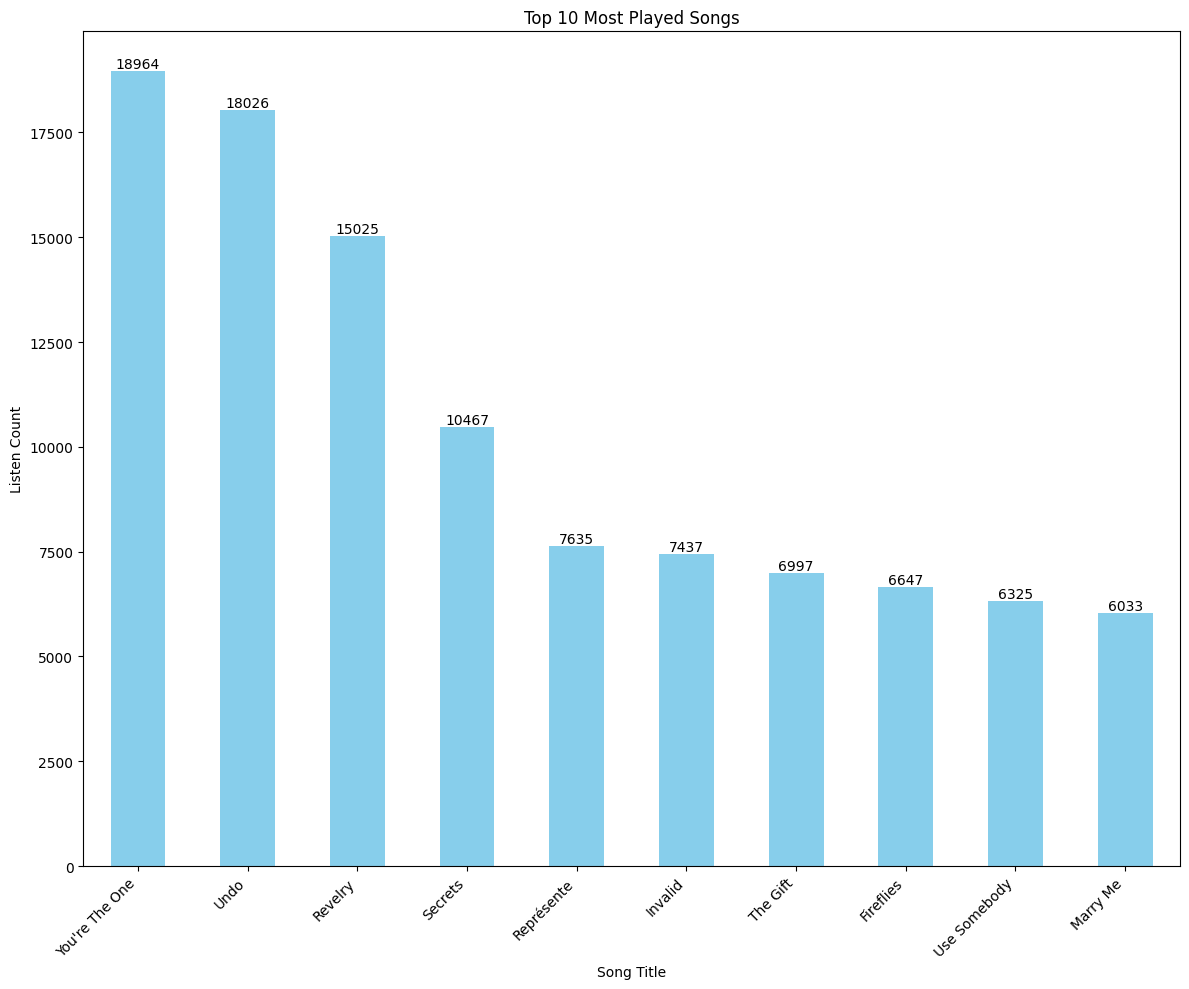


FINAL


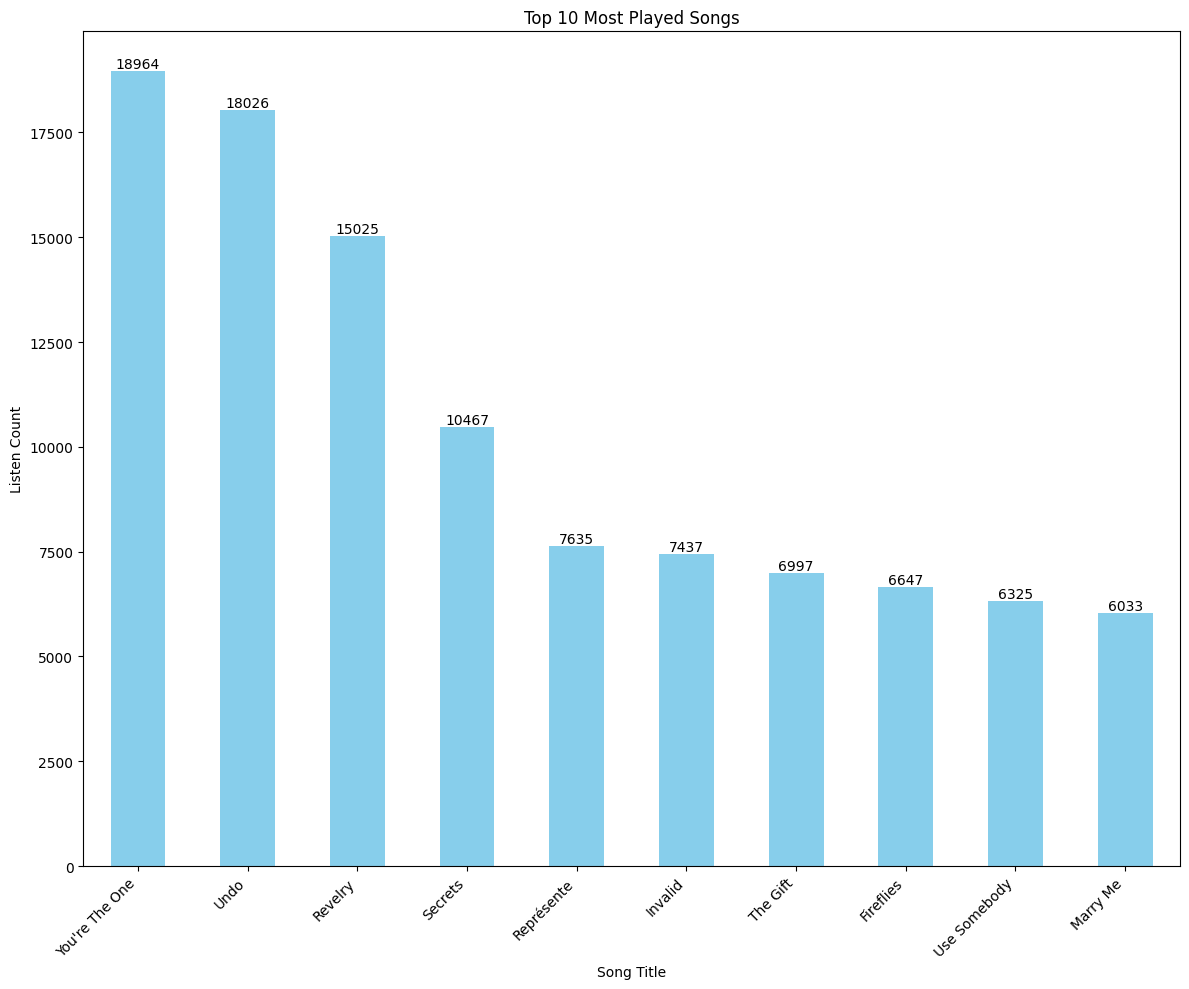

In [ ]:
print("BEFORE")
# Call the function to plot the top songs
plot_top_songs(top_songs_before)

print()

print("FINAL")
# Call the function to plot the top songs
plot_top_songs(top_songs_final)

In [ ]:
print("BEFORE")
# Get the DataFrame containing the number of users per song
users_per_song_df_before = count_users_per_song(df_final_before_songs)

# Print the DataFrame with song IDs, titles, and the number of users
print(users_per_song_df_before)

print()

print("AFTER")
# Get the DataFrame containing the number of users per song
users_per_song_df_final = count_users_per_song(df_final)

# Print the DataFrame with song IDs, titles, and the number of users
print(users_per_song_df_final)


BEFORE
        song_id  num_users                   title
506081     4516       2590                 Secrets
30243       253       2365                    Undo
687004     6099       2337                 Revelry
803482     7079       2194            Use Somebody
402871     3625       2162               Fireflies
...         ...        ...                     ...
888627     7773         15     Now Behold The Lamb
629399     5587         15                 Beloved
76749       646         14           My Generation
654461     5842         12             Untitled #5
617999     5485         10  Party Like A Rock Star

[8227 rows x 3 columns]

AFTER
        song_id  num_users                            title
292936     4516       2590                          Secrets
18670       253       2365                             Undo
399496     6099       2337                          Revelry
470507     7079       2194                     Use Somebody
230428     3625       2162                       

BEFORE


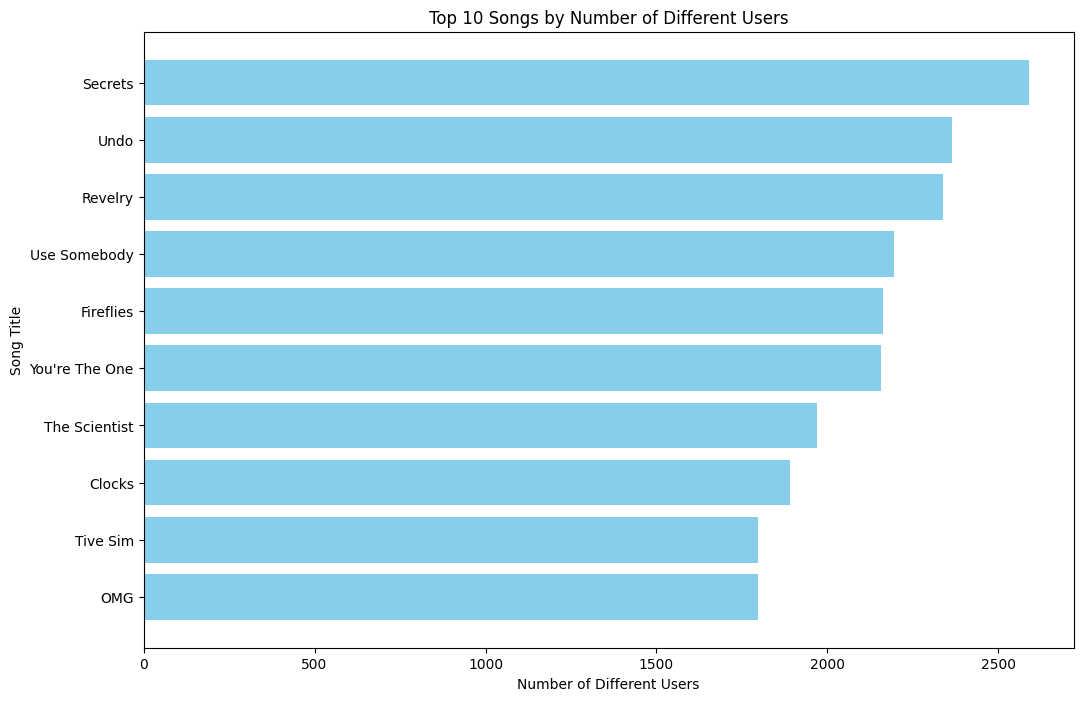


FINAL


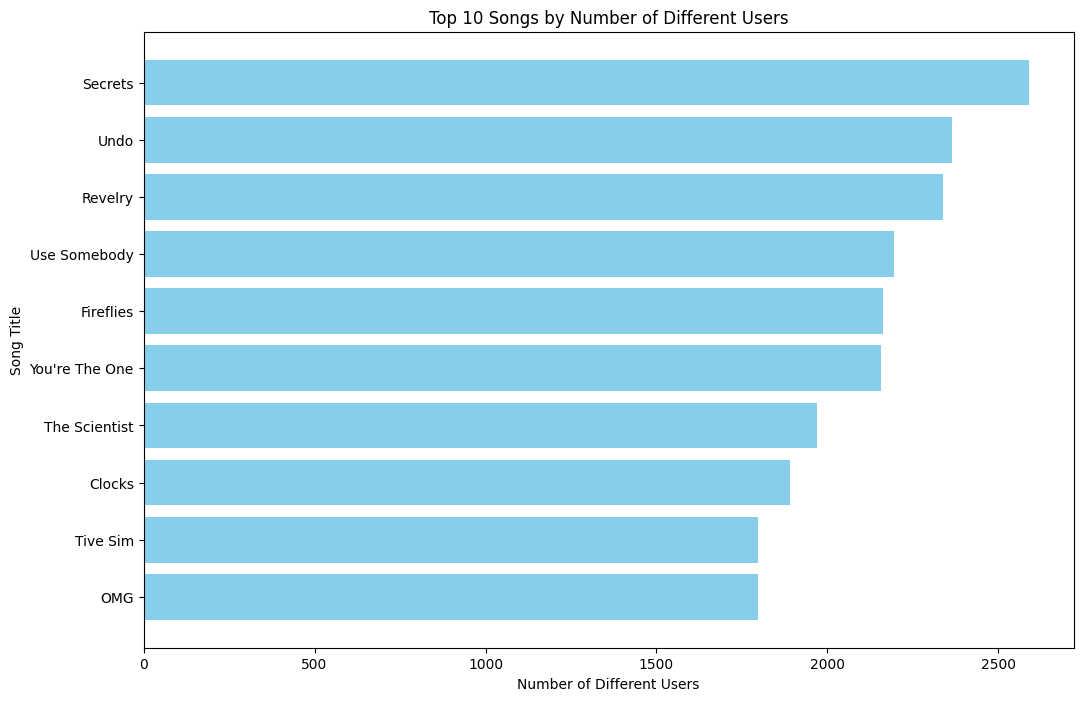

In [ ]:
print("BEFORE")
# Call the function to plot the top 10 songs by number of users
plot_top_users_per_song(users_per_song_df_before)

print()

print("FINAL")
# Call the function to plot the top 10 songs by number of users
plot_top_users_per_song(users_per_song_df_final)

In [ ]:
print("BEFORE")
max_users_list_before = [30, 60, 90, 120, 150, 200]
filtered_results_before = filter_songs_by_user_count(df_final_before_songs, max_users_list_before)

print()

print("FINAL")
max_users_list_final = [30, 60, 90, 120, 150, 200]
filtered_results_final = filter_songs_by_user_count(df_final, max_users_list_final)

BEFORE
There are 222 songs listened to by less than 30 users.
There are 8005 songs listened to by more than 30 users.

There are 3072 songs listened to by less than 60 users.
There are 5155 songs listened to by more than 60 users.

There are 5044 songs listened to by less than 90 users.
There are 3183 songs listened to by more than 90 users.

There are 6105 songs listened to by less than 120 users.
There are 2122 songs listened to by more than 120 users.

There are 6727 songs listened to by less than 150 users.
There are 1500 songs listened to by more than 150 users.

There are 7318 songs listened to by less than 200 users.
There are 909 songs listened to by more than 200 users.


FINAL
There are 0 songs listened to by less than 30 users.
There are 2122 songs listened to by more than 30 users.

There are 0 songs listened to by less than 60 users.
There are 2122 songs listened to by more than 60 users.

There are 0 songs listened to by less than 90 users.
There are 2122 songs listened t

BEFORE


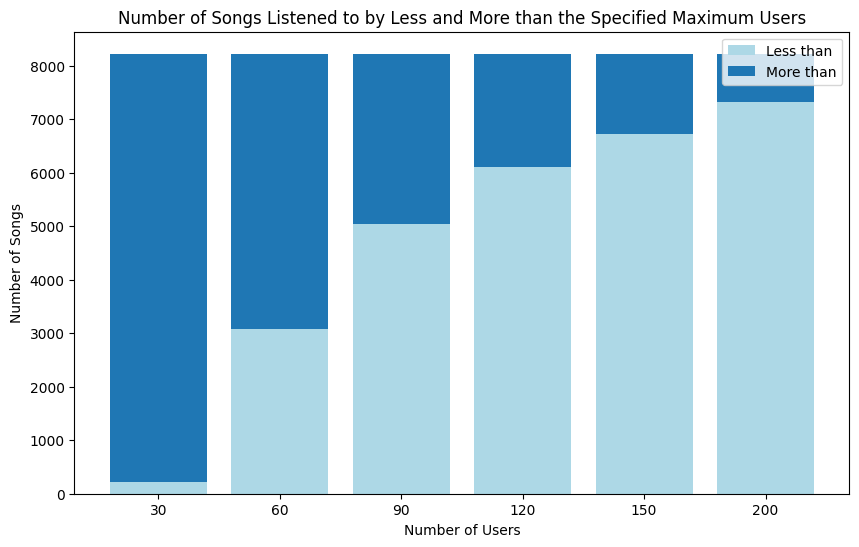


AFTER


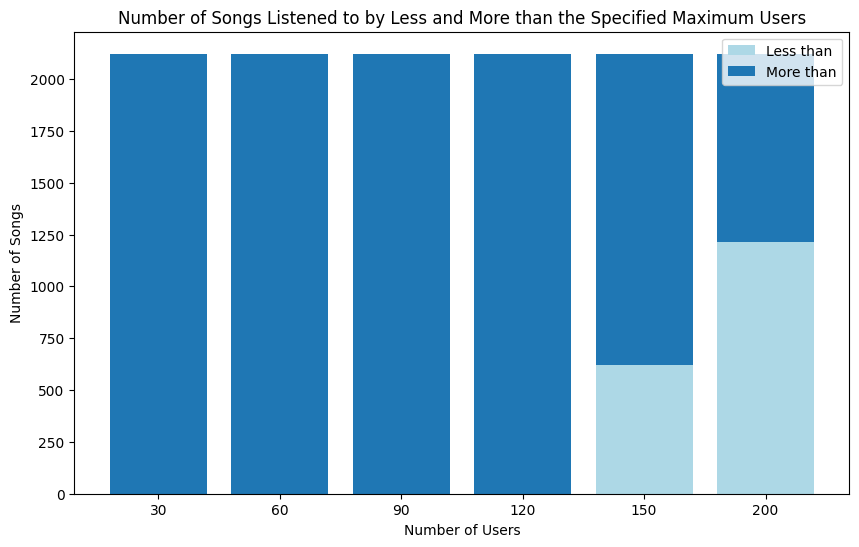

In [ ]:
print("BEFORE")
# Call the plot function directly with filtered results
plot_song_counts_by_max_users(filtered_results_before)

print()

print("AFTER")
# Call the plot function directly with filtered results
plot_song_counts_by_max_users(filtered_results_final)



---



In [ ]:
df_final_before_rating = df_final.copy()

### Dropping rating > 10

<b>

d. Rating system - we will limit the users to only those who have listened to each song no more than 10 times.

</b>

In [ ]:
d = 10

- Before implementing our find, we will do some final research:

In [ ]:
shape_before_dropping_d = df_final.shape
print("Shape of our df before dropping rating >", d, ":", shape_before_dropping_d)

# Sum the values in the 'listen_count' column
listen_count_before_dropping_d = df_final['listen_count'].sum()
print("Sum of all the listen count before dropping rating >", d, ":", listen_count_before_dropping_d)

different_song_count_before_dropping_d = df_final['song_id'].nunique()
print("Number of different songs before dropping dropping rating >", d, ":", different_song_count_before_dropping_d)

different_user_count_before_dropping_d = df_final['user_id'].nunique()
print("Number of different users before dropping dropping rating >", d, ":", different_user_count_before_dropping_d)

Shape of our df before dropping rating > 10 : (544534, 7)
Sum of all the listen count before dropping rating > 10 : 1515343
Number of different songs before dropping dropping rating > 10 : 2122
Number of different users before dropping dropping rating > 10 : 15762


In [ ]:
# # Drop records with play_count more than(>) 5
# df_final = df_final[df_final.listen_count <= d]

In [ ]:
def filter_users_by_listen_count(df, n):
    """
    Filter out users who have at least one row with 'listen_count' > n.

    Parameters:
        df (DataFrame): The DataFrame containing the song data.
        n (int): Maximum number of listens allowed for a song.

    Returns:
        DataFrame: Filtered DataFrame containing users who listened within the specified limit.
    """
    # Find users with at least one row where 'listen_count' exceeds n
    users_to_remove = df[df['listen_count'] > n]['user_id'].unique()

    # Filter the original DataFrame to exclude users found above
    filtered_df = df[~df['user_id'].isin(users_to_remove)]

    return filtered_df

In [ ]:
df_final = filter_users_by_listen_count(df_final, d)

- By dropping rating > 5 we lose users who listened to a song more than 5 times. Moreover, we lose some songs that was listened to only by the users we dropped. <br>
Of course, the total number of listens became smaller. <br>
Here are the findings:

In [ ]:
shape_after_dropping_d = df_final.shape
print("Shape of our df after dropping rating >", d, ":", shape_after_dropping_d)

# Sum the values in the 'listen_count' column
listen_count_after_dropping_d = df_final['listen_count'].sum()
print("Sum of all the listen count after dropping rating >", d, ":", listen_count_after_dropping_d)

different_song_count_after_dropping_d = df_final['song_id'].nunique()
print("Number of different songs after dropping dropping rating >", d, ":", different_song_count_after_dropping_d)

different_user_count_after_dropping_d = df_final['user_id'].nunique()
print("Number of different users after dropping dropping rating >", d, ":", different_user_count_after_dropping_d)

Shape of our df after dropping rating > 10 : (279989, 7)
Sum of all the listen count after dropping rating > 10 : 485558
Number of different songs after dropping dropping rating > 10 : 2122
Number of different users after dropping dropping rating > 10 : 8845


In [ ]:
print("By dropping rating >", d, ", we reduced the amount of samples by:", shape_before_dropping_d[0] - shape_after_dropping_d[0])
print("By dropping rating >", d, ", we reduced the amount of listening by:", listen_count_before_dropping_d - listen_count_after_dropping_d)
print("By dropping rating >", d, ", we reduced the number of songs by:", different_song_count_before_dropping_d - different_song_count_after_dropping_d)
print("By dropping rating >", d, ", we reduced the number of users by:", different_user_count_before_dropping_d - different_user_count_after_dropping_d)

By dropping rating > 10 , we reduced the amount of samples by: 264545
By dropping rating > 10 , we reduced the amount of listening by: 1029785
By dropping rating > 10 , we reduced the number of songs by: 0
By dropping rating > 10 , we reduced the number of users by: 6917


In [ ]:
print("BEFORE")
# Call the function to calculate the number of users per listen count
users_per_listen_count_df_before = calculate_users_per_listen_count(df_final_before_rating)

# Print the DataFrame
users_per_listen_count_df_before

BEFORE


listen_count  num_users
0               1      15636
1               2      14714
2               3      11783
3               4       9021
4               5       8963
..            ...        ...
181           338          1
182           353          1
183           405          1
184           436          1
185           879          1

[186 rows x 2 columns]

In [ ]:
print("FINAL")
# Call the function to calculate the number of users per listen count
users_per_listen_count_df_final = calculate_users_per_listen_count(df_final)

# Print the DataFrame
users_per_listen_count_df_final

FINAL


listen_count  num_users
0             1       8824
1             2       8194
2             3       6078
3             4       4199
4             5       4095
5             6       2533
6             7       1627
7             8       1090
8             9        776
9            10        820

BEFORE


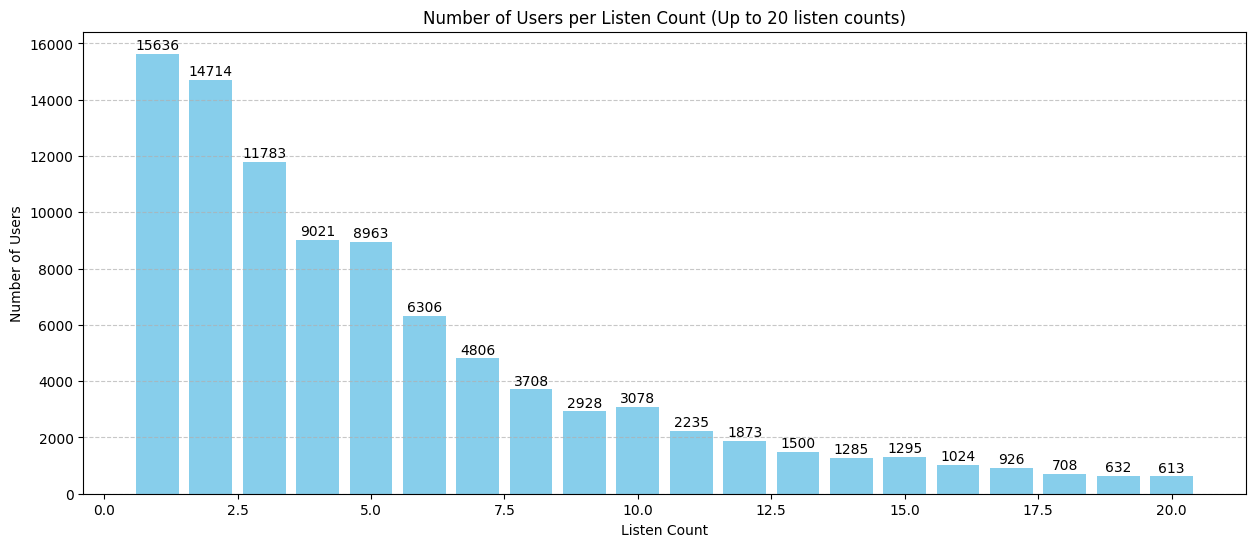


FINAL


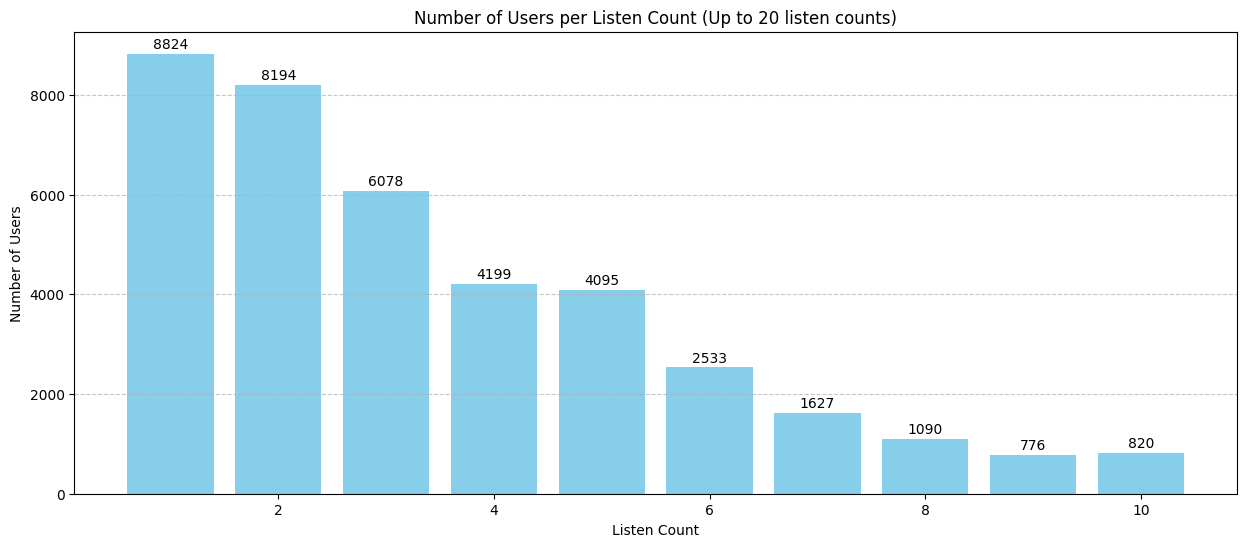

In [ ]:
print("BEFORE")
# Call the function to plot the number of users per listen count for up to n listen counts
plot_users_per_listen_count(users_per_listen_count_df_before, n=20)

print()

print("FINAL")
# Call the function to plot the number of users per listen count for up to n listen counts
plot_users_per_listen_count(users_per_listen_count_df_final, n=20)

BEFORE
Number of users left for max listen count of 3: 2272
Number of users left for max listen count of 4: 3204
Number of users left for max listen count of 5: 4693
Number of users left for max listen count of 6: 5812
Number of users left for max listen count of 7: 6694
Number of users left for max listen count of 8: 7410
Number of users left for max listen count of 9: 8025
Number of users left for max listen count of 10: 8845
Number of users left for max listen count of 11: 9451
Number of users left for max listen count of 12: 9983
Number of users left for max listen count of 13: 10416
Number of users left for max listen count of 14: 10819
Number of users left for max listen count of 15: 11267


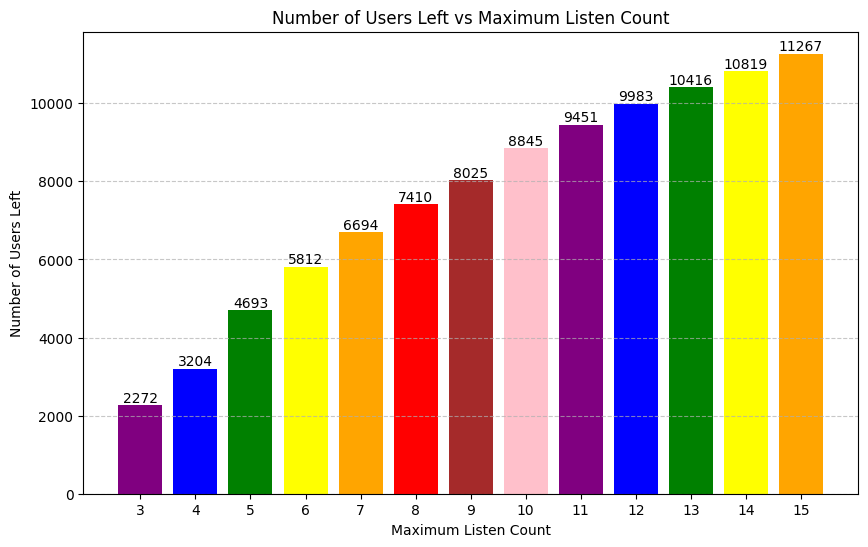


FINAL
Number of users left for max listen count of 3: 2272
Number of users left for max listen count of 4: 3204
Number of users left for max listen count of 5: 4693
Number of users left for max listen count of 6: 5812
Number of users left for max listen count of 7: 6694
Number of users left for max listen count of 8: 7410
Number of users left for max listen count of 9: 8025
Number of users left for max listen count of 10: 8845
Number of users left for max listen count of 11: 8845
Number of users left for max listen count of 12: 8845
Number of users left for max listen count of 13: 8845
Number of users left for max listen count of 14: 8845
Number of users left for max listen count of 15: 8845


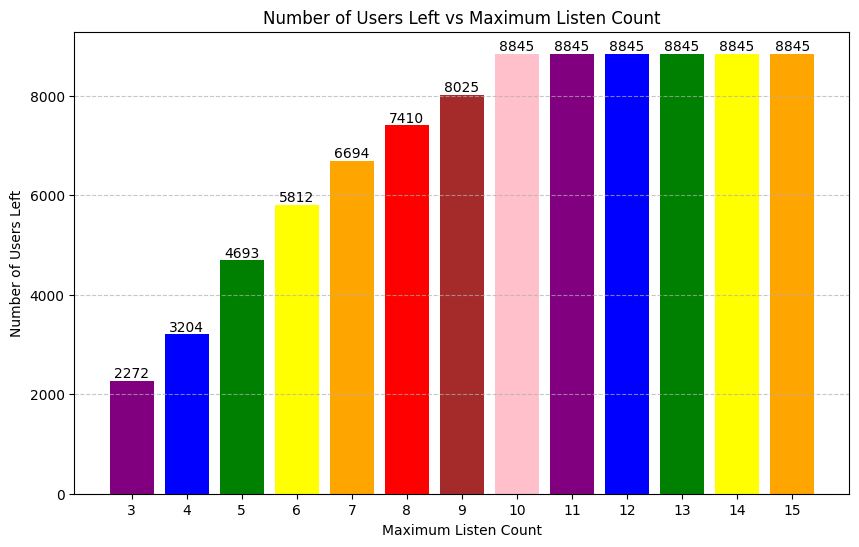

In [ ]:
print("BEFORE")
# Call the function to check max listen counts from 3 to 15
filtered_df_before, ratings_before = filter_users_by_max_listen_count(df_final_before_rating, start_count=3, end_count=15)

# Plot the results
plot_users_left(ratings_before)

print()

print("FINAL")
# Call the function to check max listen counts from 3 to 15
filtered_df_final, ratings_final = filter_users_by_max_listen_count(df_final, start_count=3, end_count=15)

# Plot the results
plot_users_left(ratings_final)

BEFORE


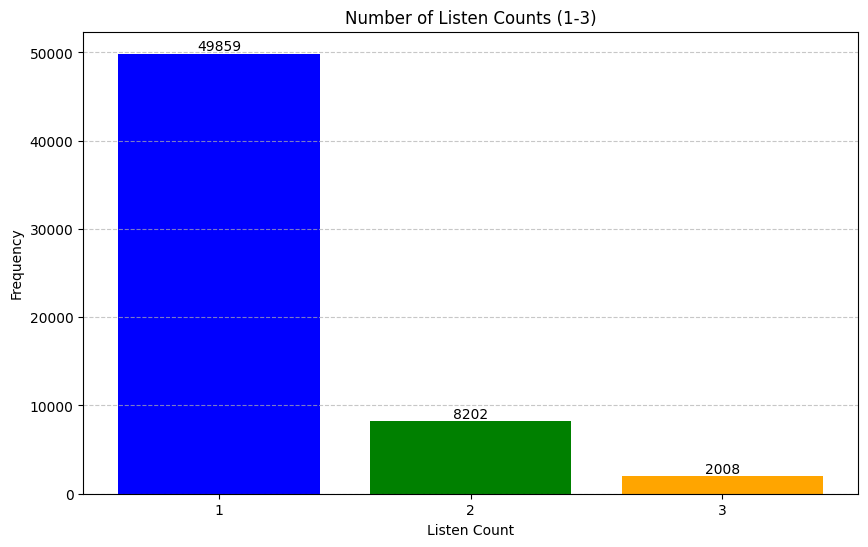

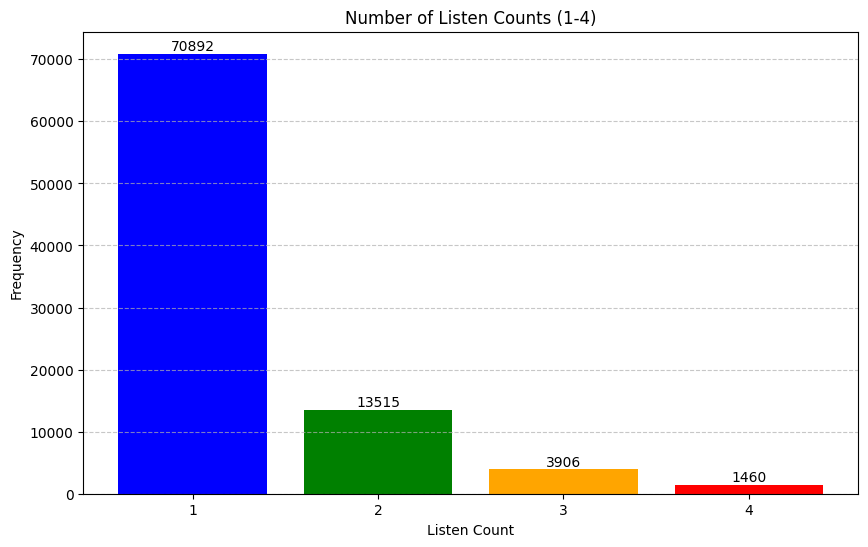

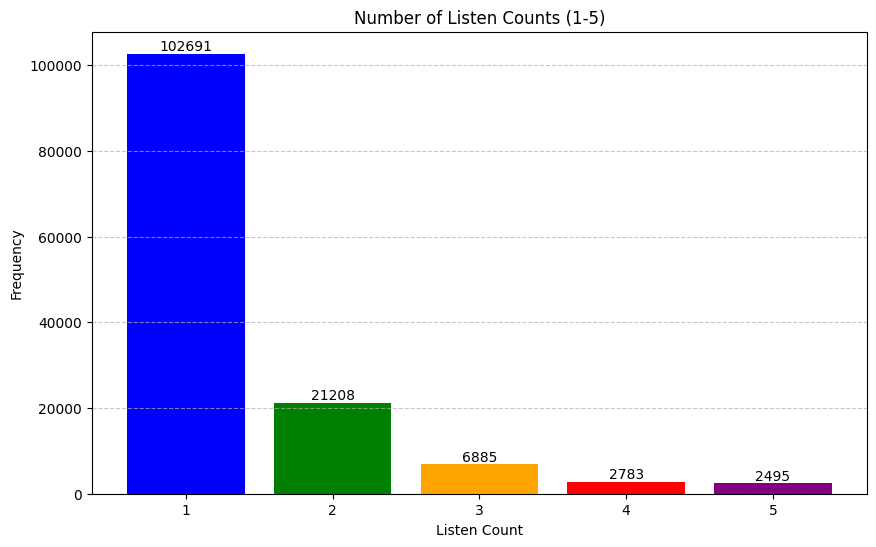

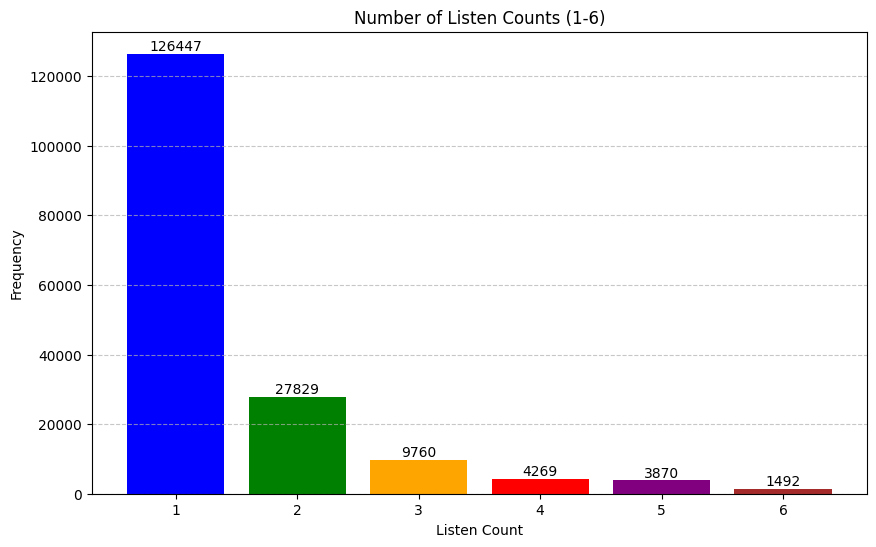

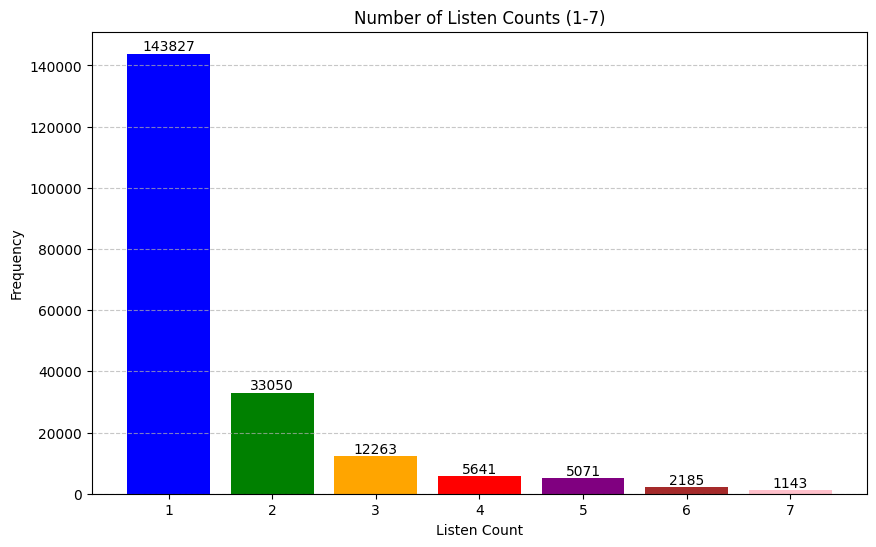

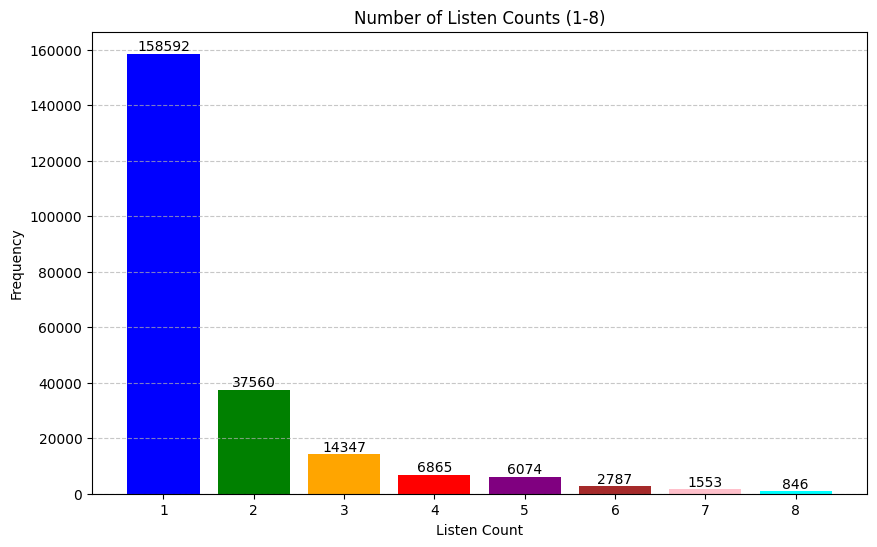

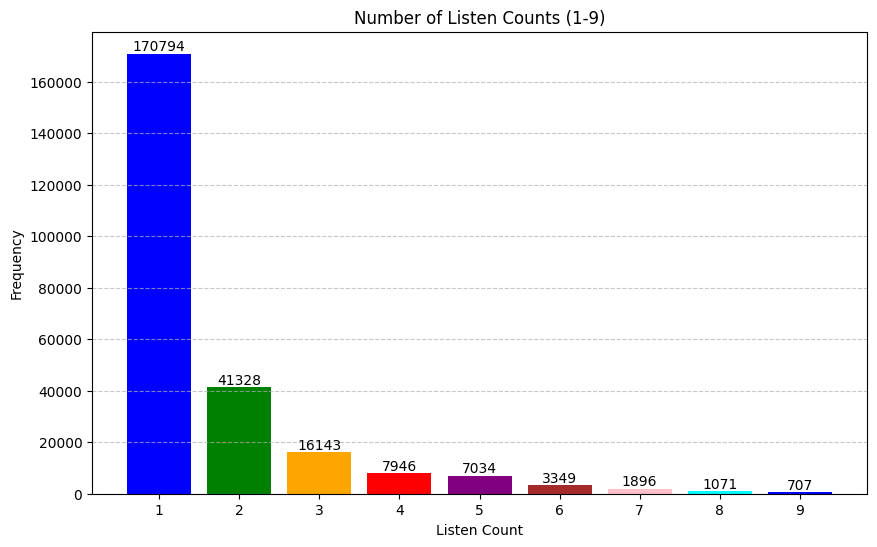

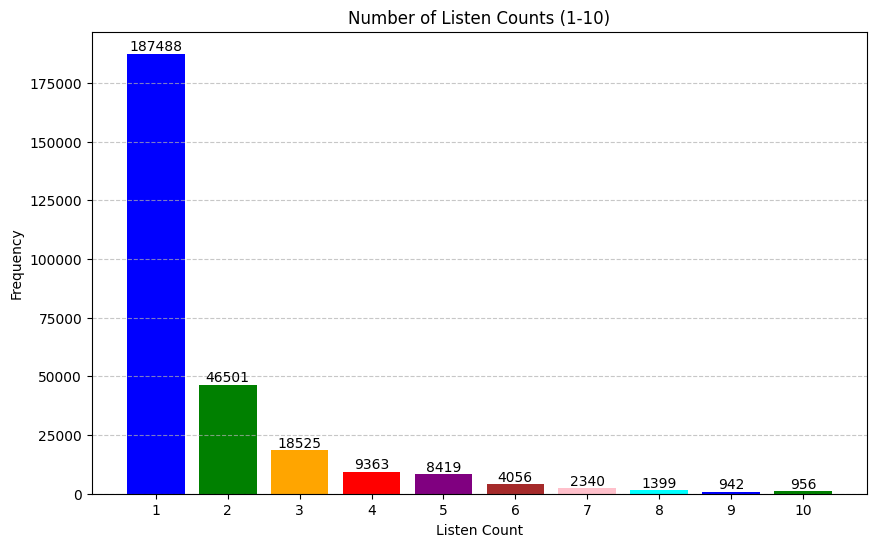

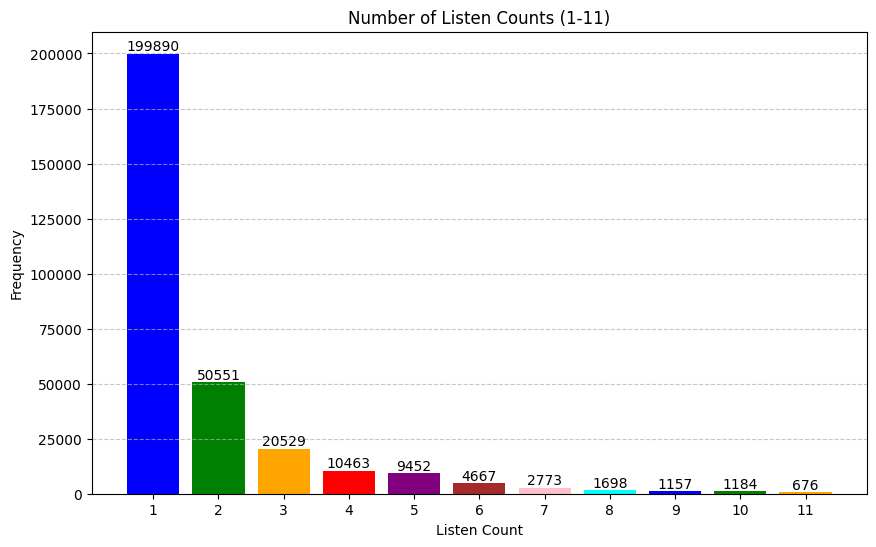

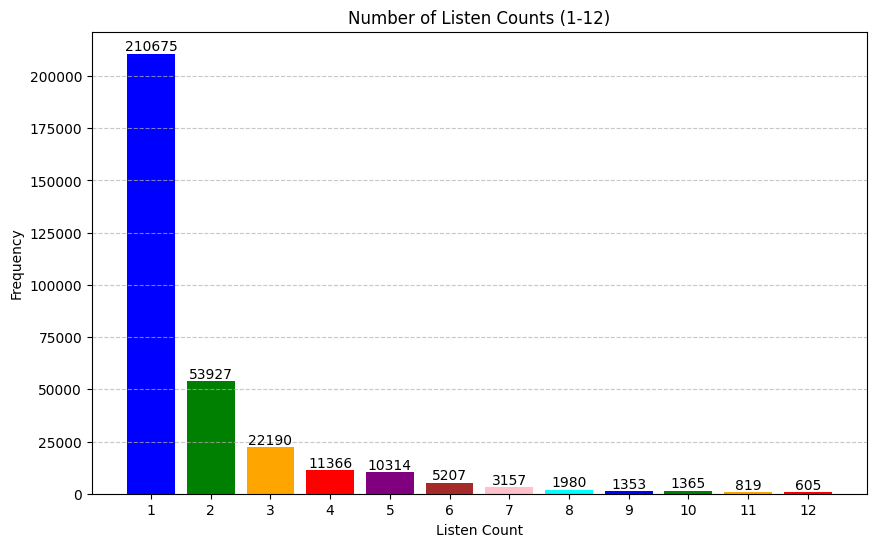

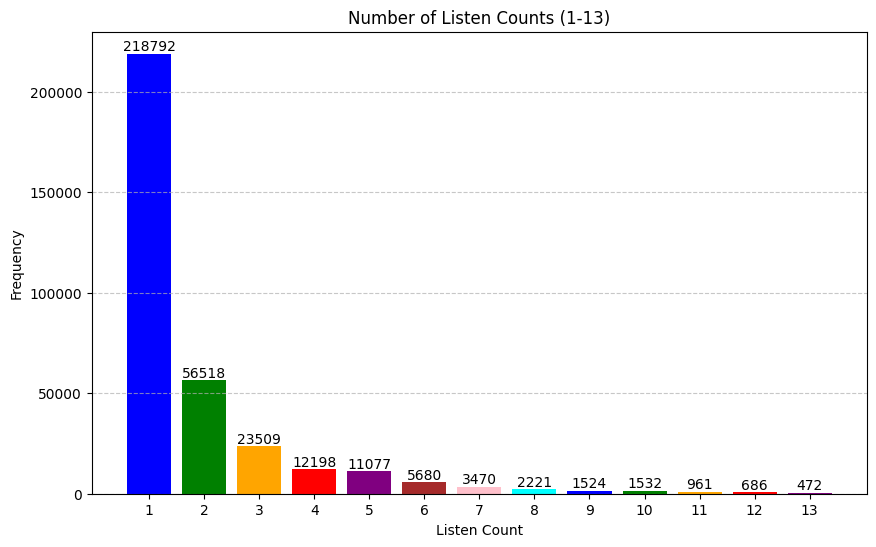

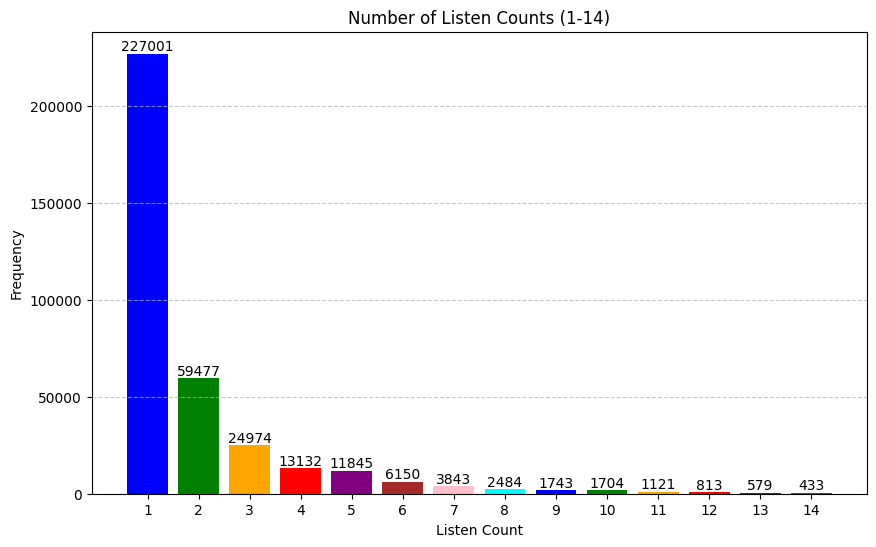

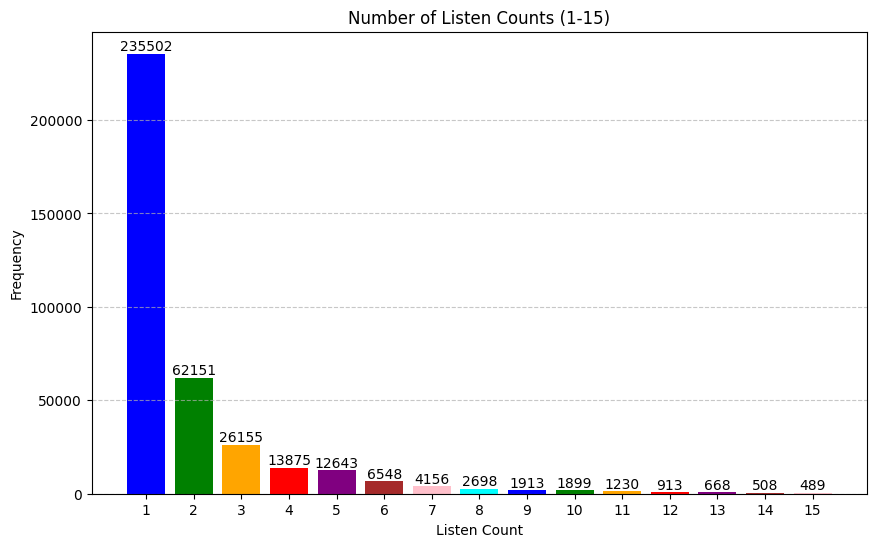


AFTER


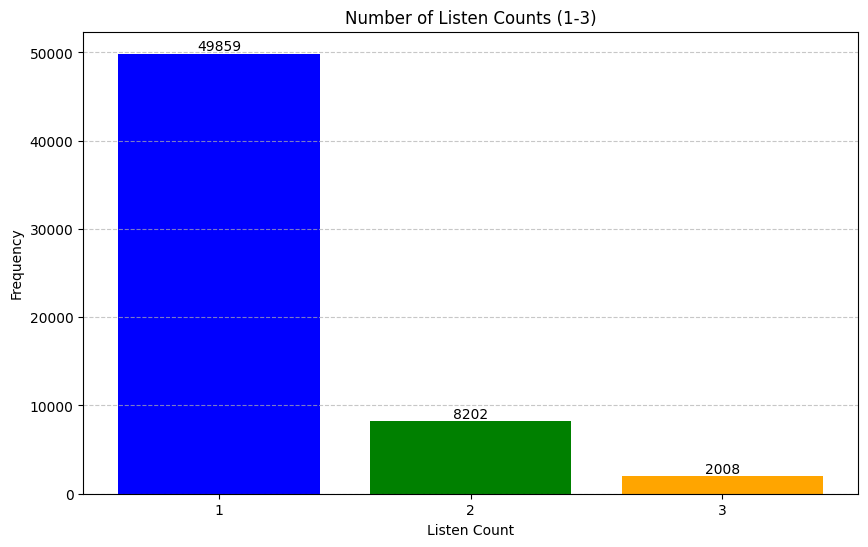

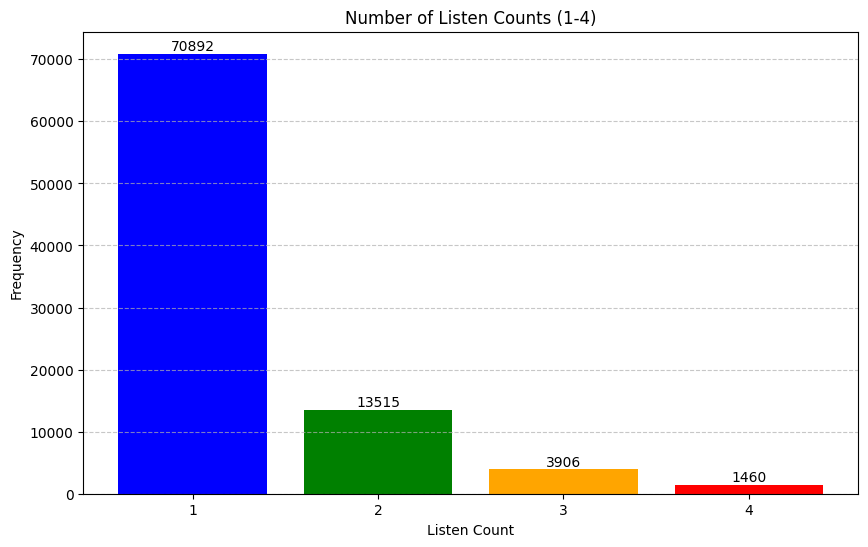

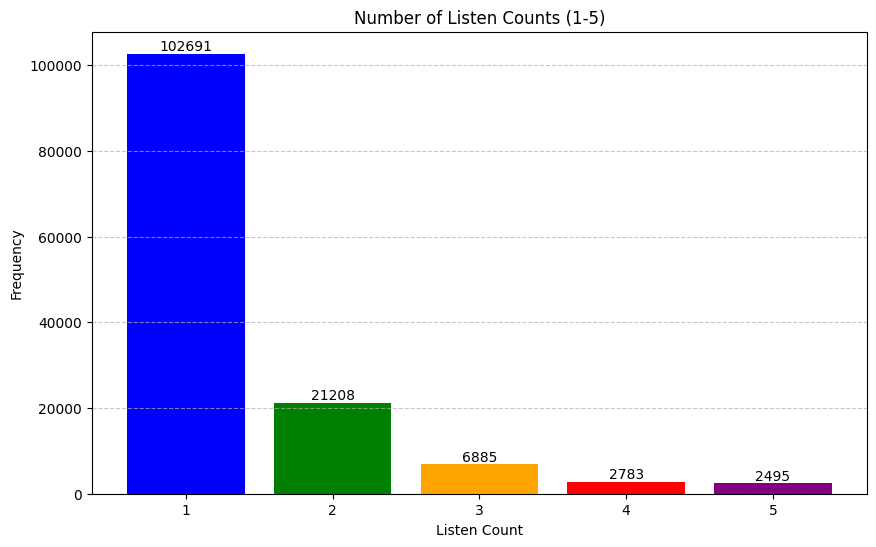

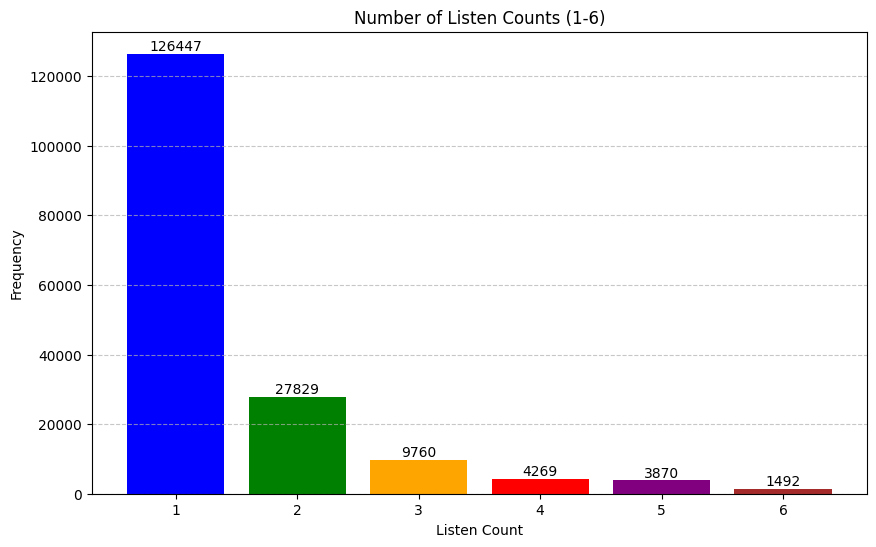

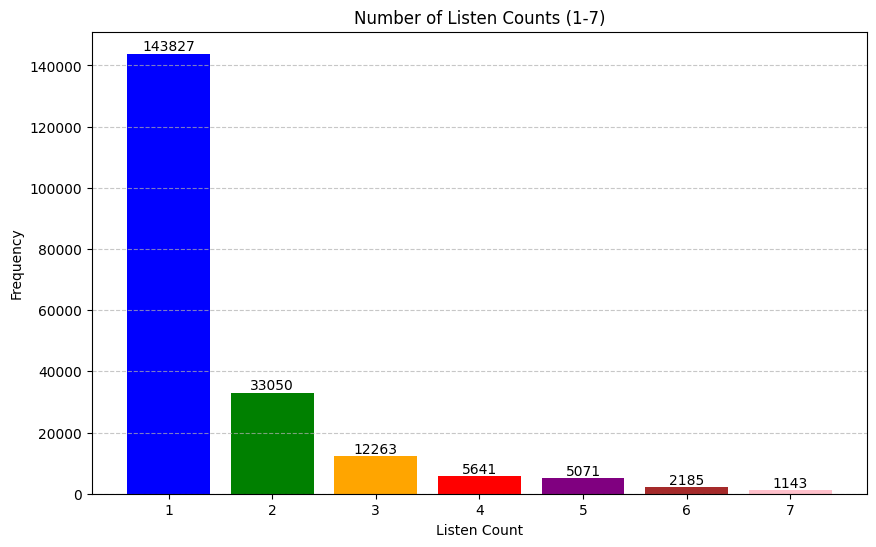

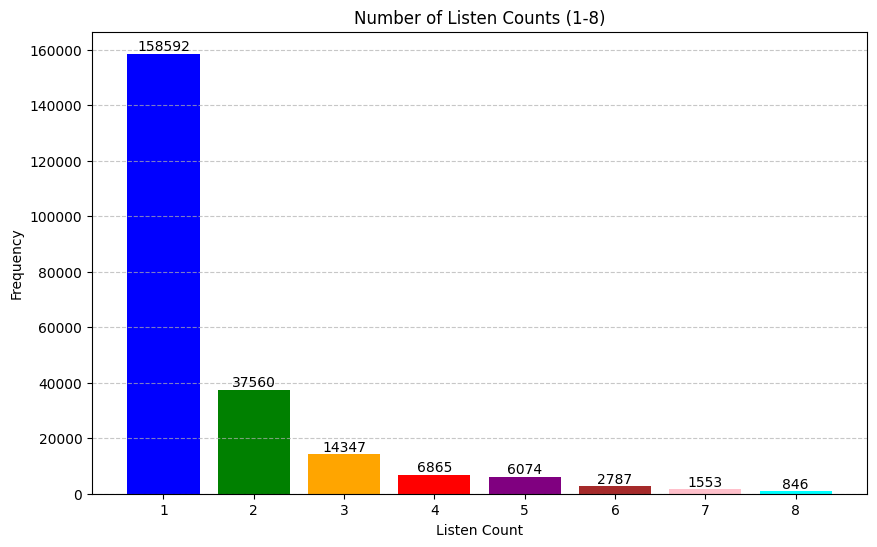

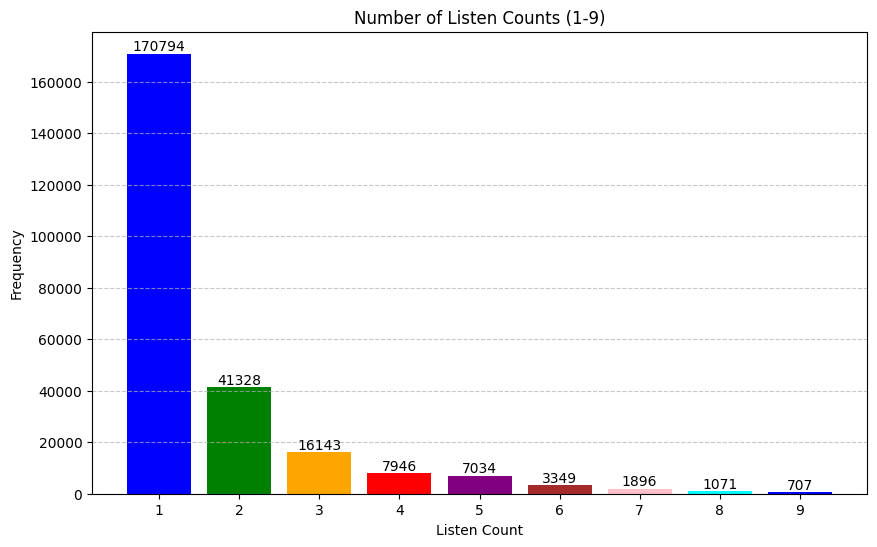

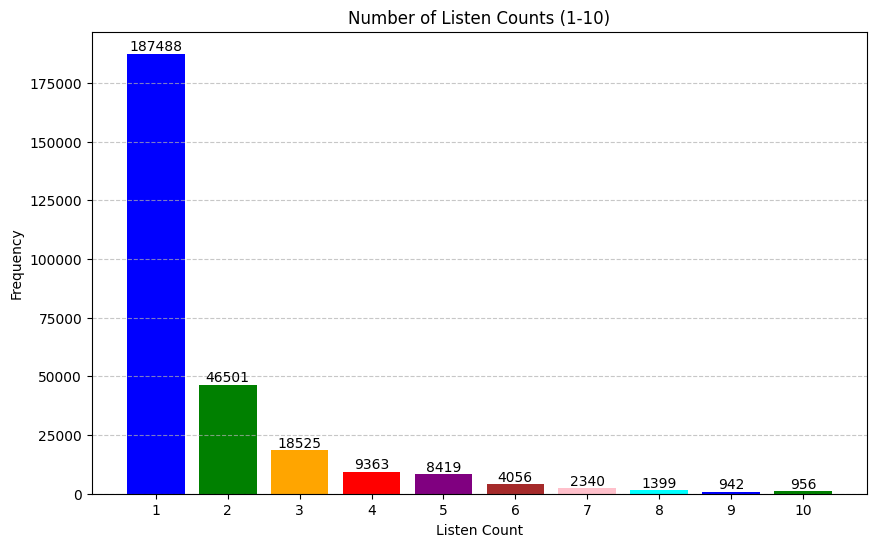

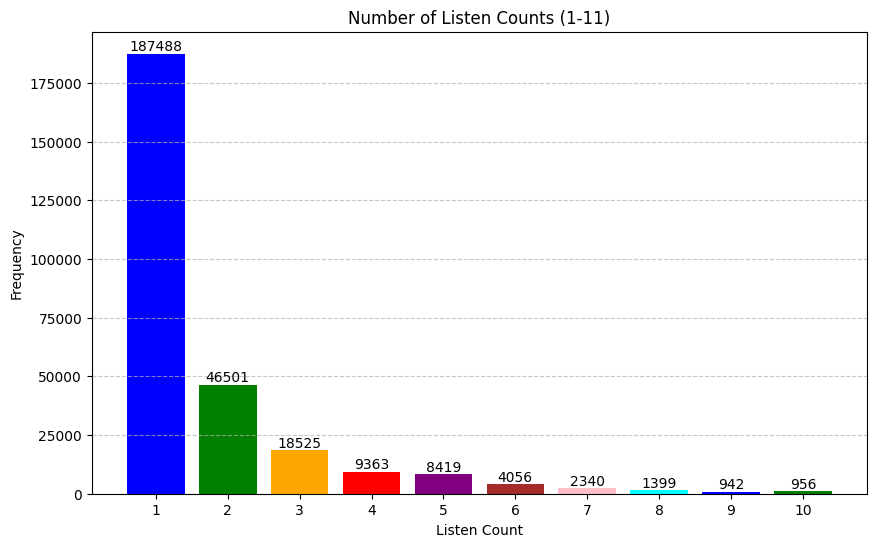

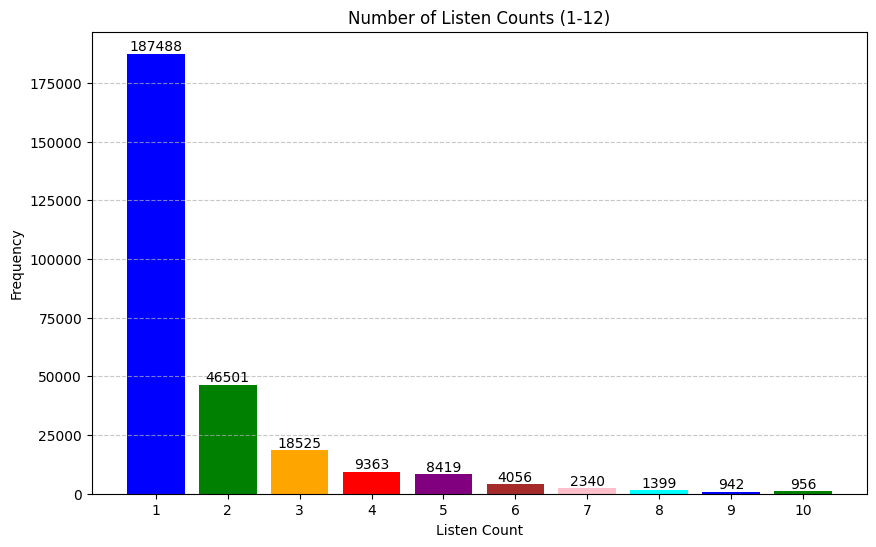

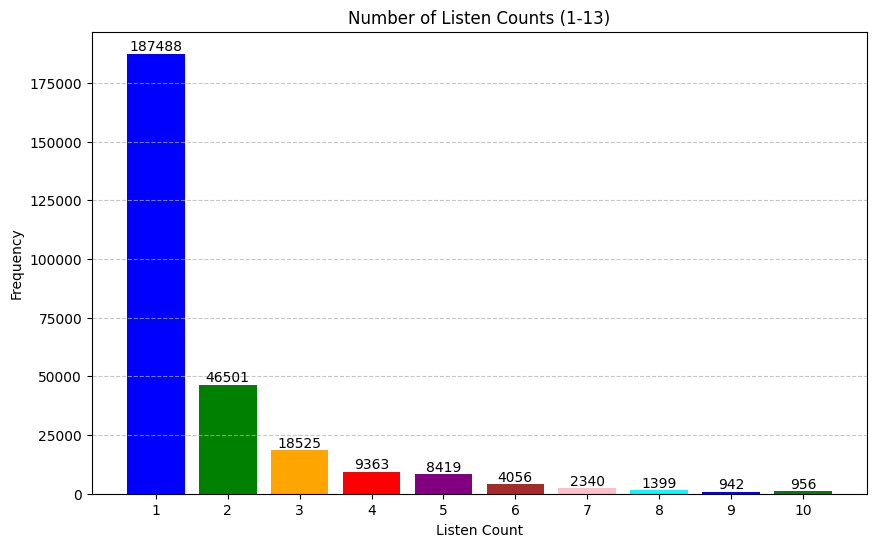

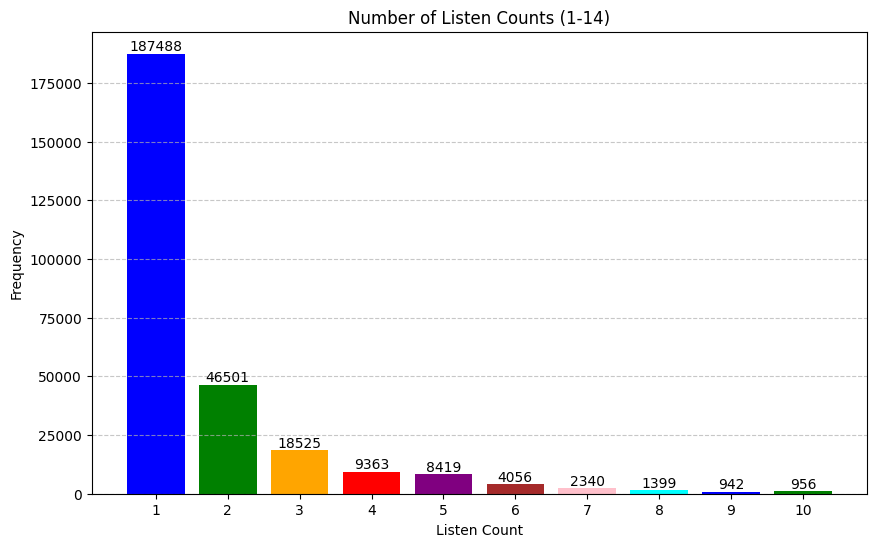

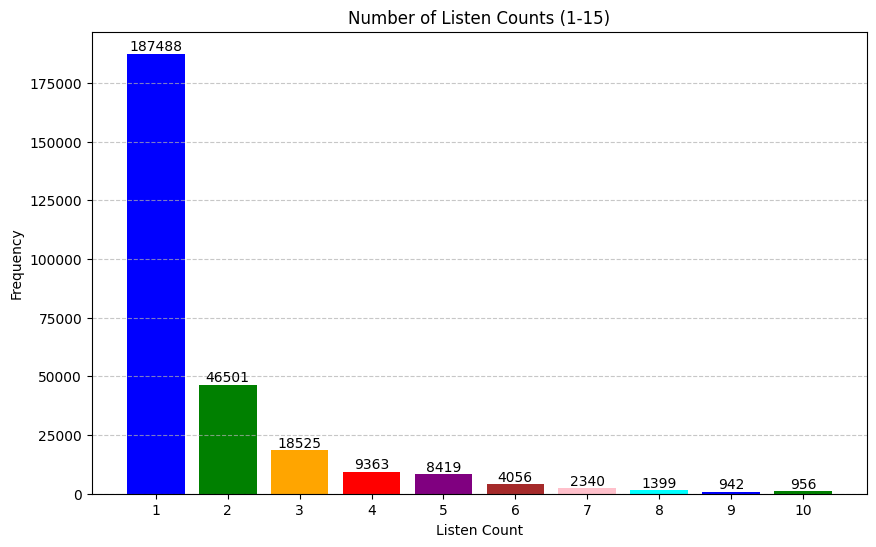

In [ ]:
print("BEFORE")
# Call the function with start_count=3 and end_count=15
plot_listen_counts_range(df_final_before_rating, start_count=3, end_count=15)

print()

print("AFTER")
# Call the function with start_count=3 and end_count=15
plot_listen_counts_range(df_final, start_count=3, end_count=15)

TODO Fix df

In [ ]:
df_final.reset_index(inplace=True)

In [ ]:
df_final

index  user_id  song_id  listen_count  \
0             2    54752      605             1   
1             3    54752      618             1   
2             4    54752      972             1   
3             6    54752     1252             1   
4            12    54752     3091             1   
...         ...      ...      ...           ...   
279984  1999992    64343     2648             1   
279985  1999994    64343     2767             4   
279986  1999996    64343     3051             4   
279987  1999997    64343     3059             3   
279988  1999998    64343     3182             1   

                                 title                        release  \
0                             Stronger                     Graduation   
1                       Constellations              In Between Dreams   
2                         Learn To Fly  There Is Nothing Left To Lose   
3                        Paper Gangsta               The Fame Monster   
4                           Love Shack           Original Hits - Rock   
...                                ...                            ...   
279984               That Should Be Me                      My Worlds   
279985          Unwell (Album Version)    More Than You Think You Are   
279986          Two Is Better Than One                     Love Drunk   
279987  What I've Done (Album Version)                 What I've Done   
279988                              Up                      My Worlds   

                                   artist_name  year  
0                                   Kanye West  2007  
1                                 Jack Johnson  2005  
2                                 Foo Fighters  1999  
3                                    Lady GaGa  2008  
4                                   The B-52's  1989  
...                                        ...   ...  
279984                           Justin Bieber  2010  
279985                         matchbox twenty  2003  
279986  Boys Like Girls featuring Taylor Swift  2009  
279987                             Linkin Park  2007  
279988                           Justin Bieber  2010  

[279989 rows x 8 columns]

# TODO - ToDel - Full function section


TODO - this section we be redone (We will probably remove it and put it somewhere else with changes in functions. Some are not relevant)!!!!!

TODO - this section we be redone!!!!!

https://github.com/rctruta/music_recommendation_system/blob/main/music_recommendation_system_final_submission.ipynb

In [ ]:
# # ========== Function precision_recall_at_k ==========
# def precision_recall_at_k(model, k=10, threshold=1, verbose=True):
#     """
#     A function to calculate rmse, precision, recall, and F1_score, at k.
#     This function is adapted from the one in the Surprise library.
#     Params:
#       model: the model to be used for predictions
#       k: the number of relevant items to be considered (top k)
#       threshold: the minimum value that a rating should satisfy to be relevant
#       verbose: Bool, determines the way to display the results
#     Returns:
#       [rmse, recall, precision, f1_score]
#         verbose=True: displays the list containing the 4 metrics
#         verbose=False: returns a list with the 4 metrics.
#           This is useful when experimenting with various values for (k, threshold).

#     """

#     # First map the predictions to each user.
#     user_est_true = defaultdict(list)

#     # Making predictions on the test data.
#     predictions = model.test(testset)

#     for uid, _, true_r, est, _ in predictions:
#         user_est_true[uid].append((est, true_r))

#     precisions = dict()
#     recalls = dict()
#     for uid, user_ratings in user_est_true.items():

#         # Sort user play counts by estimated value.
#         user_ratings.sort(key=lambda x : x[0], reverse=True)

#         # Number of relevant items
#         n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)

#         # Number of recommended items in top k
#         n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[ : k])

#         # Number of relevant and recommended items in top k
#         n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold))
#                               for (est, true_r) in user_ratings[ : k])

#         # Precision@K: Proportion of recommended items that are relevant
#         # When n_rec_k is 0, Precision is undefined. Here, we set Precision to 0 when n_rec_k is 0

#         precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 0

#         # Recall@K: Proportion of relevant items that are recommended
#         # When n_rel is 0, Recall is undefined. Here, we set Recall to 0 when n_rel is 0

#         recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 0

#     # Mean of all the predicted precisions are calculated
#     precision = round((sum(prec for prec in precisions.values()) / len(precisions)), 3)

#     # Mean of all the predicted recalls are calculated
#     recall = round((sum(rec for rec in recalls.values()) / len(recalls)), 3)

#     rmse = round(accuracy.rmse(predictions, verbose=False), 3)

#     f1_score = round((2 * precision * recall) / (precision + recall), 3)

#     if verbose:
#         return print(clr.S+'rmse: {}, recall: {}, precision: {}, f1_score: {}'.format(rmse, recall, precision, f1_score)+clr.E)
#     else:
#         return [rmse, recall, precision, f1_score]

# # ========== Function get_songs_played_by_user ==========
# def get_songs_played_by_user(user, data):
#     """
#     Returns all the songs played by a user.
#     Params:
#         user: user_id
#         data: the dataframe with the data
#     Returns:
#         An array with all the song_ids of the songs user_id listened to.
#     TODO: it can be easily updated to generalize the interaction between a user and items.
#     Add an additional param item='song_id', and change the return condition.
#     """
#     return data[data['user_id'] == user]['song_id'].unique()

# # ========== Function get_songs_not_played_by_user ==========
# def get_songs_not_played_by_user(user, data):
#     """
#     Returns all the songs not played by a user.
#     Params:
#         user: user_id
#         data: the dataframe with the data
#     Returns:
#         An array with all the song_ids of the songs user_id had not listened to.
#     TODO: it can be easily updated to generalize the interaction between a user and items.
#     Add an additional param item='song_id', and change the return condition.
#     """
#     return data[~data['song_id'].isin(get_songs_played_by_user(user))]['song_id'].unique()

# # ========== Function played_count_predict ==========
# def play_count_predict(algo, user, song, r_ui=None):
#     """
#     A function that uses algo, to predict the rating for a song, by user.
#     Args:
#         algo: the algorithm used for prediction
#         user: the user_id
#         song: the song_id
#         r_ui: play_count, if it exists
#     Returns:
#         A formatted display of the results of the prediction method.
#     """

#     r_ui = algo.predict(user, song, r_ui=r_ui).r_ui
#     est = round(algo.predict(user, song).est, 2)
#     return print(clr.S+'Displaying the predictions for user {} and song {}.\n\n- Real prediction: {},\n- Estimated prediction: {}.'
#                  .format(user, song, r_ui, est)+clr.E)

# # ========== Function display_best_params ==========
# def display_best_params(model):
#     """
#     Function to display the best RMSE and values of the hyper-parameters, following a Grid/Randomized search.
#     Args:
#         model: the model used
#     Returns:
#     """
#     print(clr.S+'RMSE of the best option: {}'.format(round(model.best_score['rmse'], 3))+clr.E)
#     print(clr.S+'The hyperparameters of the best option: {}'.format(model.best_params['rmse'])+clr.E)

# # ========== Function get_recommendations ==========
# def get_recommendations(data, user, n, algo):
#     """
#     Function to get the top_n recommendations for a user.
#     Params:
#         data: the DataFrame with user-item information
#         user: the ID of the user for which we generate recommendations
#         n: the upper limit of the recommendations we are making
#         algo: the algorithm used for recommendations
#     Returns:
#         A list of the top_n items recommended to the user.
#     """
#     # Creating an empty list to store the recommended song IDs.
#     recommendations = []

#     # Creating an user-item interactions matrix.
#     user_item_interactions_matrix = data.pivot(index='user_id', columns='song_id', values='play_count')

#     # Extracting those song IDs that the user_id has not listened to yet.
#     non_listened_songs = user_item_interactions_matrix.loc[user][user_item_interactions_matrix.loc[user].isnull()].index.tolist()

#     # Looping through each of the song IDs that user_id has not listened to yet.
#     for item_id in non_listened_songs:

#         # Predicting the play_count for those songs not listened to by this user.
#         est = round(algo.predict(user, item_id).est, 2)

#         # Appending the predicted play_counts.
#         recommendations.append((item_id, est))

#     # Sorting the predicted play_counts in descending order.
#     recommendations.sort(key = lambda x: x[1], reverse=True)

#     # Returing top n highest predicted play_counts for this user.
#     return recommendations[:n]

# # ========== Function get_users_who_played_song ==========
# def get_users_who_played_song(song, data):
#     """
#     data=df_final
#     Returns all the users who listened to the song.
#     Params:
#         song: song_id
#         data: the dataframe with the data
#     Returns:
#         An array with all the user_ids of the users who listened to the song.
#     TODO: it can be easily updated to generalize the interaction between a user and items.
#     Add an additional param item='user_id', and change the return condition.
#     """
#     return data[data['song_id'] == song]['user_id'].unique()

# # ========== Function get_users_who_did_not_played_song ==========
# def get_users_who_did_not_played_song(song, data):
#     """
#     Returns all the users who did not listened to the song.
#     Params:
#         song: song_id
#         data: the dataframe with the data
#     Returns:
#         An array with all the user_ids of the users who had not listened to the song.
#     TODO: it can be easily updated to generalize the interaction between a user and items.
#     Add an additional param item='user_id', and change the return condition.
#     """
#     return data[~data['user_id'].isin(get_users_who_played_song(song, data=data))]['user_id'].unique()

# # ========== Function ==========

# Recommendation system models & algorithms workflow

TODO: ADD THe WORKFLOW

* After working on the data and the pre-processing, he approached the models of the recommendation system. Each model is based on a different algorithm.
* We will use a few diffrent approach, trying a few models and then will compare between them.
The models we will use :    
1. Rank - Based (Popularity) Model  
2. Collaborative - Filtering
  - Similarity / Neighborhood - based
    - User - User
    - Item - Item
  - Matrix Factorization
3. Cluster - Based
4. Content - Based


# Rank-based (Popularity)

* In this model, songs that are frequently listened to or have high listen counts are ranked higher and recommended to users.

* This model does not take into account the individual preferences or tastes of users. Instead, it focuses on recommending songs that are popular among a large group of users.

* Here there is no need for train-test splitting because rank-based recommendation systems typically do not involve complex model training or parameter optimization. Instead, they rely on simple ranking or popularity metrics to provide recommendations.

In [ ]:
# Calculating the average of listen_count :
avg_count = df_final.groupby('song_id')['listen_count'].mean()
# Calculating the frequency each song was listened
sum_count = df_final.groupby('song_id')['listen_count'].sum()

In [ ]:
# Creating dataframe with : avg_count and sum_count
rb_popular = pd.DataFrame({'avg_count': avg_count,'sum_count': sum_count})
# Descending order, by the average counts a song was listened.
rb_popular = rb_popular.sort_values(by='avg_count', ascending=False)
# Reset index to turn "song_id" into a column
rb_popular.reset_index(inplace=True)
# Let us see the first five records of the rb_popular dataset
rb_popular.head()

song_id  avg_count  sum_count
0     5948   3.808696        438
1     6841   3.782609        174
2     4869   3.489362        164
3     1394   3.188679        169
4     5493   3.185185        258

In [ ]:
# Calculate descriptive statistics for rb_popular excluding the 'song_id' row
rb_popular_description = rb_popular.drop('song_id', axis=1).describe()

# Show the descriptive statistics
rb_popular_description

avg_count    sum_count
count  2122.000000  2122.000000
mean      1.726119   228.820924
std       0.355207   214.067254
min       1.101852    63.000000
25%       1.462051   128.000000
50%       1.693309   169.000000
75%       1.927704   238.000000
max       3.808696  2770.000000

Let's define a function that findss the top n songs for a recommendation based on their average listen counts. <br> Additionally, we'll include a threshold for the minimum number of listen counts a song must have to be considered for recommendation.

In [ ]:
def top_n_songs(rb_popular, n, min_interaction=200):
    # Finding songs with a minimum number of interactions
    recommendations = rb_popular[rb_popular['sum_count'] >= min_interaction]

    # Sorting songs based on their average listen_count in descending order
    recommendations = recommendations.sort_values(by='avg_count', ascending=False)

    # Return the song IDs of the top n songs
    return recommendations['song_id'].head(n)


In [ ]:
# Get the song IDs of the top 10 songs
top_n_song_ids = top_n_songs(rb_popular, 10)

# Filter rb_popular to include only the top N songs
top_n_songs_df = rb_popular[rb_popular['song_id'].isin(top_n_song_ids)]

# Print the DataFrame with the required format
top_n_songs_df

song_id  avg_count  sum_count
0      5948   3.808696        438
4      5493   3.185185        258
5      7385   3.120482        259
7      5651   3.089109        624
9      4123   3.030303        200
10      502   2.985621       2284
12     4617   2.893204        596
14      253   2.866890       2563
15     3666   2.823529        240
16     6863   2.797619        235

In [ ]:
# Find the indices of the top 10 songs
top_n_song_indices = top_n_songs(rb_popular, 10)
top_n_song_indices

0     5948
4     5493
5     7385
7     5651
9     4123
10     502
12    4617
14     253
15    3666
16    6863
Name: song_id, dtype: int64

In [ ]:
def get_song_info(song_ids, df_final):
    # Define a list to store the selected rows
    selected_songs = []

    # Iterate over each song_id in the list of song_ids
    for song_id in song_ids:
        # Filter df_final to include only the rows corresponding to the current song_id
        song_data = df_final[df_final['song_id'] == song_id]

        # Extract the required columns and append to the list
        selected_songs.append(song_data[['song_id', 'title', 'release', 'artist_name', 'year']].iloc[0])

    # Create a DataFrame from the selected songs
    selected_songs_df = pd.DataFrame(selected_songs)

    return selected_songs_df

In [ ]:
selected_songs_df = get_song_info(top_n_song_indices, df_final)

In [ ]:
# Merge selected_songs_df and rb_popular by song_id
top_10_info = pd.merge(selected_songs_df, rb_popular, on='song_id', how='inner')

# show the merged DataFrame
top_10_info

song_id                                              title  \
0     5948                              Victoria (LP Version)   
1     5493            Silent Lucidity (2002 Digital Remaster)   
2     7385                            Verde Que Te Quero Rosa   
3     5651                               Mercy:The Laundromat   
4     4123  Alley Oop (Girls Version) (2007 Digital Remaster)   
5      502                                     You're The One   
6     4617                                       Transparency   
7      253                                               Undo   
8     3666                                                #40   
9     6863                                    The Big Gundown   

                                      release         artist_name  year  \
0        Hit By A Train: The Best Of Old 97's            Old 97's  2006   
1                                      Empire         Queensryche  1990   
2                     Verde Que Te Quero Rosa             Cartola  1977   
3             Westing (By Musket and Sextant)            Pavement  1993   
4         The Doughnut In Granny's Greenhouse  The Bonzo Dog Band  1968   
5                          If There Was A Way       Dwight Yoakam  1990   
6                             Workout Holiday         White Denim  2008   
7                             Vespertine Live               Björk  2001   
8                          Listener Supported  DAVE MATTHEWS BAND  1999   
9  Invaders Must Die Remixes and Bonus Tracks         The Prodigy  2009   

   avg_count  sum_count  
0   3.808696        438  
1   3.185185        258  
2   3.120482        259  
3   3.089109        624  
4   3.030303        200  
5   2.985621       2284  
6   2.893204        596  
7   2.866890       2563  
8   2.823529        240  
9   2.797619        235

Seems like there is a mix of different release years, and popularity levels among the songs. <br> For example, "Victoria (LP Version)" by Old 97's is from 2006 and has an average listen count of 3.37, indicating it is quite popular. <br> And "Heaven Must Be Missing An Angel" by Tavares is from 1979 with a lower average listen count of 2.21, showing that older songs can still be popular among listeners. <br> This suggests that music preferences are diverse and not solely based on release year or genre.

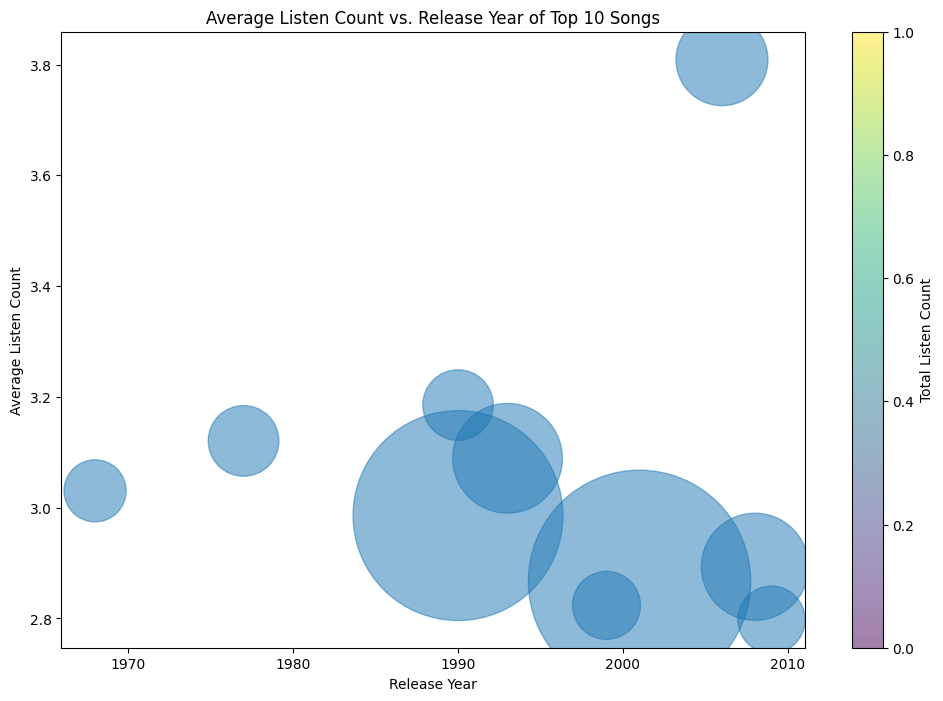

In [ ]:
# Plotting the TOP 10 SONGS

# X-axis (Release Year): Each point on the x-axis represents the release year of a song.

# Y-axis (Average Listen Count): The y-axis shows the average listen count for each song.

# Point Size: The size of each point is determined by the total listen count of the song.
# Larger points indicate songs that have been listened to more frequently.

# Color: The color of each point also represents the total listen count,
# with darker colors indicating songs with higher total listen counts.

plt.figure(figsize=(12, 8))
plt.scatter(top_10_info['year'], top_10_info['avg_count'], s=top_10_info['sum_count']*10, alpha=0.5, cmap='viridis')
plt.title('Average Listen Count vs. Release Year of Top 10 Songs')
plt.xlabel('Release Year')
plt.ylabel('Average Listen Count')
plt.colorbar(label='Total Listen Count')
plt.show()


# Importing recommendation system package

* **Surprise** - Surprise is one of the “scikit-based Python” libraries to develop recommender systems using explicit rating data. This package allows building and evaluating recommender systems, offering a range of collaborative filtering algorithms and evaluation metrics. Surprise provides several algorithms to develop collaborative filtering recommender systems, starting from memory-based method (i.e. KNN) to model-based method (i.e. Singular Value Decomposition or SVD).
* Here is its documentation: [surprise](https://surpriselib.com/)

TODO explain more

In [ ]:
# Install the surprise package using pip. Uncomment and run the below code to do the same

!pip install surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 7.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3162975 sha256=01e5b26b3324096755abcaba7f956fa77f201bec83082d8aac1ff9b97c372adb
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


In [ ]:
# Import the necessary libraries

# To compute the accuracy of models
from surprise import accuracy

# This class is used to parse a file containing play_counts, data should be in structure - user; item; play_count
from surprise.reader import Reader

# Class for loading datasets
from surprise.dataset import Dataset

# For tuning model hyperparameters
from surprise.model_selection import GridSearchCV, RandomizedSearchCV

# For splitting the data in train and test dataset
from surprise.model_selection import train_test_split

# For implementing similarity-based recommendation system
from surprise.prediction_algorithms.knns import KNNBasic

# For implementing matrix factorization based recommendation system
from surprise.prediction_algorithms.matrix_factorization import SVD

# For implementing KFold cross-validation
from surprise.model_selection import KFold

# For implementing clustering-based recommendation system
from surprise import CoClustering

# Preparing the data for modeling


Here we want to make sure that our data is arranged properly:
* In the following models we will use the surprise library which deals with explicit ranking data, for this reason we need to make sure that our data is divided by "rankings".

*   **Reader** - class in the Surprise package is used to parse raw data files or dataframes into a format suitable for collaborative filtering algorithms, specifying the expected rating scale of the data.
*    **Generate a rating scale** - In order to create a semblance of a rating system, we have restricted our data to users that have listened to a song at most 5 times. In this way, listen_count can be used as a rating system, with values between 1 and 5.
*    **data** - we will convert our dataset into a Dataset object from the Surprise library, and use the Reader object to be able to parse the DataFrame. The oder should be: user ID, item ID, and rating (This is also the  relevant dataset).
*    **Splitting the data** - class in the Surprise package that randomly dividing the interactions (in the data) while preserving the user-item relationships.

In [ ]:
# Instantiating Reader scale with expected rating scale
reader = Reader(rating_scale = (1,5))

# Loading the relevant dataset
data = Dataset.load_from_df(df_final[["user_id", "song_id", "listen_count"]], reader)

# Splitting the data into train and test dataset
# Take test_size = 0.2, random_state = 42
trainset, testset = train_test_split(data, test_size = 0.2, random_state = 42)

# Useful functions

TODO - FIX FUNCTIONS & EXPLAIN

1. **precision_recall_at_k**: This is a common metrics that help evaluate the performance of recommender and ranking systems by RMSE, precision@k, recall@k, and F_1 score.
* k - represents the number of top recommended songs to consider when evaluating the precision and recall metrics. It determines how many of the top-ranked songs are assessed for their relevance to the user's preferences. (we will choose default of top 10).
* threshold - represents the minimum rating (user's listen count) that qualifies it as relevant. It helps distinguish between songs that meet the user's preferences and those that do not. (we will choose default of 1).
* RMSE - Root Mean Squared Error measures the average difference between predicted and actual ratings.
* precision@k - Precision at k measures the proportion of relevant items among the top k recommendations.<br>
  * Precision@k = Number of relevant items recommended in top k / k
* recall@k - Recall at k measures the proportion of relevant items captured within the top k recommendations. <br>
  * Recall@k = Number of relevant items recommended in top k / Total number of relevant items
* F_1 score - The harmonic mean of precision and recall, providing a balanced measure of the system's performance. <br>
  * F1 = (2×Precision×Recall) / (Precision+Recall)
* Output - The function provides a comprehensive evaluation of the system's effectiveness through these metrics.<br><br>
* "Relevant items" refer to items that are considered valuable or appropriate for a particular user. Here, it could be songs that the user has rated highly or listened to frequently.

In [ ]:
# The function to calulate the RMSE, precision@k, recall@k, and F_1 score
def precision_recall_at_k(testset, model, k = 10, threshold = 1):
    """Return precision and recall at k metrics for each user"""

    # First map the predictions to each user.
    user_est_true = defaultdict(list)

    # Making predictions on the test data
    predictions=model.test(testset)

    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))

    precisions = dict()
    recalls = dict()
    for uid, user_ratings in user_est_true.items():

        # Sort user ratings by estimated value
        user_ratings.sort(key = lambda x : x[0], reverse = True)

        # Number of relevant items
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)

        # Number of recommended items in top k
        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[ : k])

        # Number of relevant and recommended items in top k
        n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold))
                              for (est, true_r) in user_ratings[ : k])

        # Precision@K: Proportion of recommended items that are relevant
        # When n_rec_k is 0, Precision is undefined. We here set Precision to 0 when n_rec_k is 0

        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 0

        # Recall@K: Proportion of relevant items that are recommended
        # When n_rel is 0, Recall is undefined. We here set Recall to 0 when n_rel is 0

        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 0

    # Mean of all the predicted precisions are calculated
    precision = round((sum(prec for prec in precisions.values()) / len(precisions)), 3)

    # Mean of all the predicted recalls are calculated
    recall = round((sum(rec for rec in recalls.values()) / len(recalls)), 3)

    # Calculate RMSE
    rmse = accuracy.rmse(predictions, verbose=False)

    # Calculate F1 score
    f1_score = round((2 * precision * recall) / (precision + recall), 3)

    # Return metrics as a dictionary
    metrics = {
        'RMSE': rmse,
        'Precision': precision,
        'Recall': recall,
        'F_1 score': f1_score
    }

    return metrics

2. **listen_count_predict:**
* This function uses the model to predict the rating (listen_count) for a song, by user.
* r_ui stands for "rating user-item" and is used to evaluate the performance of recommendation algorithms by comparing predicted ratings to actual ratings (it will be the listen_count, if exists)
* This function returns a formatted display of the results of the prediction method.

In [ ]:
def listen_count_predict(model, user_id, song_id, r_ui=None):
    #r_ui = model.predict(user_id, song_id, r_ui=r_ui).r_ui
    est = round(model.predict(user_id, song_id).est, 2)
    return print(clr.S+'The predictions for user {} and song {} is:\n\n- Real prediction: {},\n- Estimated prediction: {}.'
                 .format(user_id, song_id, r_ui, est)+clr.E)

3.  **get_songs_played_by_user**:
* This function returns all the songs played by or not played by a user.
* played is boolean indicating whether to return songs played by the user (True) or not played (False).
*  This function returns an array with all the song_ids of the songs user_id listened to or did not listen to.

In [ ]:
def get_songs_played_by_user(user_id, data, played=True):
  played_songs = data[data['user_id'] == user_id]['song_id'].unique()
  if played:
    print(clr.S+"Songs played by user {}:".format(user_id)+clr.E)
    return played_songs
  else:
    print(clr.S+"Songs not played by user {}:".format(user_id)+clr.E)
    return data[~data['song_id'].isin(played_songs)]['song_id'].unique()

4. **get_users_who_played_or_not_song**:
* This function returns all the users who played or did not play a song.
* played is boolean indicating whether to return users who played the song (True) or did not play (False).
*  This function returns an array with all the user_ids of the users who listened to or did not listen to the song.

In [ ]:
def get_users_who_played_or_not_song(song_id, data, played=True):
  users_played = data[data['song_id'] == song_id]['user_id'].unique()
  if played:
      print(clr.S + "Users who played song {}:".format(song_id) + clr.E)
      return users_played
  else:
      print(clr.S + "Users who did not play song {}:".format(song_id) + clr.E)
      return data[~data['user_id'].isin(users_played)]['user_id'].unique()

5. **get_recommendations**:
* This function generates recommendations for a given user based on their interactions with songs and returns a list of the top_n items recommended to the user (the default is top 10).
* This function generates recommendations for a given user by first identifying the songs the user has not listened to yet, then predicting the play counts for those songs using a provided model, and finally returning the top n recommendations based on the predicted play counts.

In [ ]:
def get_recommendations(data, user_id, model, n=10):
    # Creating an empty list to store the recommended song IDs.
    recommendations = []

    # Creating an user-item interactions matrix.
    user_item_interactions_matrix = data.pivot(index='user_id', columns='song_id', values='listen_count')

    # Extracting those song IDs that the user_id has not listened to yet.
    non_listened_songs = get_songs_played_by_user(user_id, data, False)
    print(clr.S+"(and according to the model, he should listen to them)"+clr.E)

    # Looping through each of the song IDs that user_id has not listened to yet.
    for item_id in non_listened_songs:

        # Predicting the listen_count for those songs not listened to by this user.
        est = round(model.predict(user_id, item_id).est, 2)

        # Appending the predicted listen_count.
        recommendations.append((item_id, est))

    # Sorting the predicted listen_count in descending order.
    recommendations.sort(key = lambda x: x[1], reverse=True)

    # Returing top n highest predicted listen_count for this user.
    return recommendations[:n]


5. **display_best_params**:
* This function displays the best RMSE and values of the hyper-parameters, following a Grid-search

In [ ]:
def display_best_params(model):
    print(clr.S+'RMSE of the best option: {}'.format(round(model.best_score['rmse'], 3))+clr.E)
    print(clr.S+'The hyperparameters of the best option: {}'.format(model.best_params['rmse'])+clr.E)

TODO - need to check this!

6. **ranking_songs**:
* In this function we will  correct the predicted listen_count a quantity $\frac{1}{\sqrt{n}}$ is subtracted, Because:
  - When recommending a new song and aiming to boost its likelihood of recommendation, we would add the adjustment $\frac{1}{\sqrt{n}}$.

  - In this scenario, given the maximum listen_count limit of 5 for the songs, we opt to subtract $\frac{1}{\sqrt{n}}$. This adjustment ensures more realistic predictions,  while avoiding a listen_count for a song with a value higher than 5.

* Also:
  - Normalization: The function normalizes predicted play counts by subtracting a term inversely related to the square root of total play frequency. This ensures fair comparison across recommendations.

  - Avoiding Overestimation: Subtracting the correction term prevents overestimation of play counts, especially for highly played songs, maintaining realistic recommendations.

  - Enhanced Accuracy: The adjustment improves ranking accuracy by considering relative song popularity, leading to more reliable recommendations.

  - Balanced Recommendations: It balances promotion of new songs while keeping predictions realistic, offering a diverse set of recommendations without inflating play counts.

  - Algorithm Robustness: This correction accounts for play count distribution, ensuring recommendations aren't solely driven by popularity but also by user preferences.




In [ ]:
def ranking_songs(recommendations, final_rating):
    # Convert recommendations to DataFrame
    recommendations_df = pd.DataFrame(recommendations, columns=['song_id', 'predicted_listen_count'])

    # Merge recommendations with final_rating on song_id
    merged_df = final_rating.merge(recommendations_df, on='song_id', how='inner')

    # Sort the merged DataFrame based on sum_count in descending order
    ranked_songs = merged_df.sort_values('avg_count', ascending=False)

    # Calculate corrected listen counts and sort based on corrected listen counts
    ranked_songs['corrected_listen_count'] = round(ranked_songs['predicted_listen_count'] - 1 / (ranked_songs['sum_count'] ** 0.5), 2)
    ranked_songs = ranked_songs.sort_values('corrected_listen_count', ascending=False)

    return ranked_songs

7. **get_recommendations_dict**:
* This function will take corrected_recommendations and user_id as input arguments and return a dictionary with the user id and his top final recommendation songs ids (and their predicted listen_count)

In [ ]:
def generate_recommendations_dict(corrected_recommendations, user_id):
    # Initialize the recommendations dictionary
    recommendations_dict = {'user_id': user_id}

    # Iterate over each row in corrected_recommendations DataFrame
    for index, row in corrected_recommendations.iterrows():
        song_id = row['song_id']
        corrected_listen_count = row['corrected_listen_count']
        recommendations_dict[song_id] = corrected_listen_count

    return recommendations_dict

# Collaborative-filtering

Here we will deal with **Collaborative Filtering** models.<br>
**Collaborative Filtering** is a family of algorithms with different ways to find similarities (between users or items) in order to recommend songs to users based on the preferences of other users.<br>
In this approach, the similarity is not calculated using factors like the age of users, genre of the song, or any other data about users or songs. It is calculated only on the basis of the number of times user listened to a song. For example, two users can be considered similar if they listend to the same songs despite there being a big difference in their age.

## Similarity/Neighborhood-based

Memory-based collaborative relies on the premise that users with similar past preferences will continue to exhibit similar preferences in the future, computing item ratings by considering the ratings of nearby users or items.<br><br>
Advantages:<br>
* Simplicity: Memory-based approaches are intuitive and easy to implement, making them suitable for handling moderately large datasets quickly
* Transparency: Recommendations from Memory-Based systems are straightforward to interpret as they rely on direct interactions between users and items.
* Serendipity: Memory-based filtering can offer unexpected recommendations, allowing users to discover potentially fascinating content through shared relationships with others.
<br>

Disadvantages:<br>
* Sparsity and Scalability: As datasets grow, finding reliable neighbors becomes challenging due to decreasing user-item interactions, potentially leading to scalability issues.
* Cold Start: Memory-Based systems face difficulties making reliable suggestions when there are insufficient interactions with new users or items.
* Limited Representation: Memory-based approaches may yield subpar results as they may not fully capture complex data patterns.

<br><br>
In collaborative filtering (CF) for music recommendation, the "user-user" and "item-item" approaches are two common strategies used to find similarities between users or items based on their interactions with the system. Those are the models we will use.
<br><br>
We'll use KNNBasic for music recommendation because it's simple, transparent, and effective. KNN is a neighborhood-based collaborative filtering algorithm used for recommendation systems. It identifies similar users or items based on past preferences and generates recommendations by considering the ratings of nearby users or items. KNNBasic is particularly suitable for our system as it offers clear recommendations based on raw ratings, making it easy to interpret and implement.

### User-User Similarity-Based CF Model

* In the user-user approach, similarities between users are calculated based on their past interactions with items, in this case, the songs they have listened to.
* To recommend music to a user, we first identify users who are similar to that user based on the songs they listen to and the number of times they have listened to those songs.
* Then, we will recommend music that those similar users have interacted with but the target user has not.

TODO decide if we want GridSearchCV or RandomizedSearchCV

Using **grid search** to tune the user-user similarity model for optimal performance:

- We will use grid search cross-validation from the Surprise package in order to determine the optimal values for the hyperparameters.
- As a result, the model will be fine-tuned using the obtained parameters to enhance its performance.

(user_based is True because it is a user-user model)


The KNNBasic hyperparameters:
* k (int) – The (max) number of neighbors to take into account for aggregation. Default is 40.
* min_k (int) – The minimum number of neighbors to take into account for aggregation. If there are not enough neighbors, the prediction is set to the global mean of all ratings. Default is 1.
* sim_options (dict) – A dictionary of options for the similarity measure. And there are four similarity measures available in surprise -
  - cosine
  - msd (default)
  - Pearson
  - Pearson baseline

In [ ]:
# param_grid = {'k': [10, 20, 30, 40, 50, 60], 'min_k': [9, 12, 15, 18, 21],
#               'sim_options': {'name': ['msd', 'cosine', 'pearson', 'pearson_baseline'],
#                               'user_based': [True]}
#               }

# # Performing 3-fold cross-validation to tune the hyperparameters
# #gs_user_user = RandomizedSearchCV(KNNBasic, param_grid, measures=['rmse'], cv=3, n_jobs=-1)
# gs_user_user = GridSearchCV(KNNBasic, param_grid, measures=['rmse'], cv=3, n_jobs=-1)

# # Fitting the data
# gs_user_user.fit(data)
# # Display the best parameters
# display_best_params(gs_user_user)

- The `GridSearch Cross Validation` algorithm has outputed the following **optimal values** for the hyperparameters:
  - `k`: **40**,
  - `min_k`: **15**, and
  - `sim_options`: **{'name': 'pearson_baseline', 'user_based': True}**.


In [ ]:
# Train the best model found in the above grid search
# Using the optimal similarity measure for user-user based collaborative filtering.
sim_options = {'name': 'pearson_baseline',
               'k': 40,
               'min_k': 15,
               'user_based': [True]}

# Creating an instance of KNNBasic with optimal hyperparameter values
sim_user_user_optimized = KNNBasic(sim_options=sim_options, random_state=1, verbose=False)

# Training the algorithm on the train set
sim_user_user_optimized.fit(trainset)

In [ ]:
# Evaluate the model on the test set
evaluation_user_user = precision_recall_at_k(testset, sim_user_user_optimized)
evaluation_user_user

{'RMSE': 1.4277553168158792,
 'Precision': 1.0,
 'Recall': 0.957,
 'F_1 score': 0.978}

**Observations :**

TODO

Get random user from the data that in both tarinset and testset:

In [ ]:
df_final

index  user_id  song_id  listen_count  \
0             2    54752      605             1   
1             3    54752      618             1   
2             4    54752      972             1   
3             6    54752     1252             1   
4            12    54752     3091             1   
...         ...      ...      ...           ...   
279984  1999992    64343     2648             1   
279985  1999994    64343     2767             4   
279986  1999996    64343     3051             4   
279987  1999997    64343     3059             3   
279988  1999998    64343     3182             1   

                                 title                        release  \
0                             Stronger                     Graduation   
1                       Constellations              In Between Dreams   
2                         Learn To Fly  There Is Nothing Left To Lose   
3                        Paper Gangsta               The Fame Monster   
4                           Love Shack           Original Hits - Rock   
...                                ...                            ...   
279984               That Should Be Me                      My Worlds   
279985          Unwell (Album Version)    More Than You Think You Are   
279986          Two Is Better Than One                     Love Drunk   
279987  What I've Done (Album Version)                 What I've Done   
279988                              Up                      My Worlds   

                                   artist_name  year  
0                                   Kanye West  2007  
1                                 Jack Johnson  2005  
2                                 Foo Fighters  1999  
3                                    Lady GaGa  2008  
4                                   The B-52's  1989  
...                                        ...   ...  
279984                           Justin Bieber  2010  
279985                         matchbox twenty  2003  
279986  Boys Like Girls featuring Taylor Swift  2009  
279987                             Linkin Park  2007  
279988                           Justin Bieber  2010  

[279989 rows x 8 columns]

In [ ]:
# Extract user IDs from the test set & train set
user_test_ids = set([user_id for user_id, _, _ in testset])
user_train_ids = set(trainset.all_users())

# Extract user IDs from the test set & train set
user_data_ids = set(user_test_ids.union(user_train_ids))
# Remove duplicates from user_data_ids
user_data_ids = list(set(user_data_ids))

# Set a fixed seed for the random number generator
# Now, any subsequent calls to random functions will produce the same results
random.seed(42)

# Initialize a flag to check if the random_user_id is in both train and test sets
in_both = False

# Loop until we find a random_user_id that is in both train and test sets
while not in_both:
    # Choose a random user ID
    random_user_id = random.choice(list(user_data_ids))

    # Check if the random_user_id is in both train and test sets
    if random_user_id in user_test_ids and random_user_id in user_train_ids:
        in_both = True

# Print the selected random_user_id that is in both train and test sets
print(clr.S + "Random user ID in both train and test sets:" + clr.E)
print(str(random_user_id))

Random user ID in both train and test sets:
4572


In [ ]:
# Displaying the corresponding songs, that user listened to.
songs_played_by_user = get_songs_played_by_user(random_user_id, df_final, True)
songs_played_by_user

Songs played by user 4572:


array([ 438,  632,  914, 1000, 1092, 1528, 1966, 2334, 2763, 3086, 3120,
       3152, 3236, 3614, 3705, 3797, 3940, 3969, 4218, 4234, 4451, 4661,
       4951, 5313, 5414, 5427, 5447, 5688, 5844, 5946, 5955, 6522, 7105,
       7194, 7210, 7334, 7442, 7755, 7886, 8007])

In [ ]:
# Displaying the corresponding songs, that user listened to.
played = False
songs_not_played_by_user = get_songs_played_by_user(random_user_id, df_final, False)
songs_not_played_by_user

Songs not played by user 4572:


array([ 605,  618,  972, ..., 1999, 4032, 4171])

Get random songs from the songs user listen and have not listen:

In [ ]:
# Get a random song ID from songs_not_played_by_user
not_listen_song_id = np.random.choice(songs_not_played_by_user)

# Get a random song from songs_played_by_user
listen_song_id = np.random.choice(songs_played_by_user)

print("Random song not played by the user:", not_listen_song_id)
print("Random song played by the user:", listen_song_id)

Random song not played by the user: 1199
Random song played by the user: 1966


Get users rating (listen_count) of the song he listen (listen_song_id):

In [ ]:
desired_row = df_final[(df_final['user_id'] == random_user_id) & (df_final['song_id'] == listen_song_id)]
desired_row

index  user_id  song_id  listen_count               title  \
133585  944365     4572     1966             1  You And Your Heart   

                   release   artist_name  year  
133585  You And Your Heart  Jack Johnson  2010

In [ ]:
rating_user = desired_row['listen_count'].values[0]
rating_user

1

We will test the performance of our model on the random user we sampled from our test data:

* random_user_id

* not_listen_song_id - It's a song the user hasn't listen, let's see what rating the model predicts for it

* listen_song_id - It's a song that the user listen (with rating rating_user), we'll see what rating the model predicts for him and how wrong he was in relation to the given rating

* Getting his top 10 songs recommendations

In [ ]:
# Predicting listen_count for the sample user with a not listened song.
listen_count_predict(sim_user_user_optimized, random_user_id, not_listen_song_id)

The predictions for user 4572 and song 1199 is:

- Real prediction: None,
- Estimated prediction: 1.51.


In [ ]:
# Predicting play_count for a sample user with a listened song.
listen_count_predict(sim_user_user_optimized, random_user_id, listen_song_id, rating_user)

The predictions for user 4572 and song 1966 is:

- Real prediction: 1,
- Estimated prediction: 1.11.


In [ ]:
# Make top 10 recommendations for any user_id with a similarity-based recommendation engine
recommendations = get_recommendations(df_final, random_user_id, sim_user_user_optimized)
recommendations

Songs not played by user 4572:
(and according to the model, he should listen to them)


[(6120, 5),
 (4857, 5),
 (1241, 5),
 (5788, 5),
 (5130, 5),
 (74, 5),
 (638, 5),
 (6841, 5),
 (1478, 5),
 (2577, 5)]

In [ ]:
pd.DataFrame(recommendations, columns=['song_id', 'predicted_listen_count'])

song_id  predicted_listen_count
0     6120                       5
1     4857                       5
2     1241                       5
3     5788                       5
4     5130                       5
5       74                       5
6      638                       5
7     6841                       5
8     1478                       5
9     2577                       5

TODO: add an explanation about this part & why we used this function

In [ ]:
# Filter rows in df_final where the 'song_id' matches the value stored in listen_song_id
filtered_rows = df_final[df_final['song_id'] == listen_song_id]
# Sort the filtered rows based on the 'listen_count' column in descending order
sorted_rows = filtered_rows.sort_values(by='listen_count', ascending=False)
sorted_rows

index  user_id  song_id  listen_count               title  \
180451  1274360    24668     1966             9  You And Your Heart   
68819    486166    50927     1966             9  You And Your Heart   
200373  1418605    39519     1966             8  You And Your Heart   
230793  1643748    47171     1966             6  You And Your Heart   
15341    108236    68346     1966             6  You And Your Heart   
...         ...      ...      ...           ...                 ...   
92423    659039    11876     1966             1  You And Your Heart   
90163    647058    51970     1966             1  You And Your Heart   
84815    608792    36632     1966             1  You And Your Heart   
83343    600183    18670     1966             1  You And Your Heart   
279815  1998171      588     1966             1  You And Your Heart   

                   release   artist_name  year  
180451  You And Your Heart  Jack Johnson  2010  
68819   You And Your Heart  Jack Johnson  2010  
200373  You And Your Heart  Jack Johnson  2010  
230793  You And Your Heart  Jack Johnson  2010  
15341   You And Your Heart  Jack Johnson  2010  
...                    ...           ...   ...  
92423   You And Your Heart  Jack Johnson  2010  
90163   You And Your Heart  Jack Johnson  2010  
84815   You And Your Heart  Jack Johnson  2010  
83343   You And Your Heart  Jack Johnson  2010  
279815  You And Your Heart  Jack Johnson  2010  

[143 rows x 8 columns]

In [ ]:
rb_popular[rb_popular['song_id'] == listen_song_id]

song_id  avg_count  sum_count
859     1966   1.769231        253

In [ ]:
# Applying the ranking_songs function
corrected_recommendations = ranking_songs(recommendations, rb_popular)
corrected_recommendations

song_id  avg_count  sum_count  predicted_listen_count  \
5     6120   2.016667        242                       5   
0     6841   3.782609        174                       5   
1     2577   2.448276        142                       5   
2     5130   2.358209        158                       5   
3     1478   2.236111        161                       5   
4     5788   2.038462        159                       5   
6       74   2.000000        152                       5   
8     1241   1.564103        122                       5   
9     4857   1.561644        114                       5   
7      638   1.714286        108                       5   

   corrected_listen_count  
5                    4.94  
0                    4.92  
1                    4.92  
2                    4.92  
3                    4.92  
4                    4.92  
6                    4.92  
8                    4.91  
9                    4.91  
7                    4.90

Final recommendations for random_user_id by user-user CF model:

In [ ]:
recommendations_user_user = generate_recommendations_dict(corrected_recommendations, random_user_id)
recommendations_user_user

{'user_id': 4572,
 6120.0: 4.94,
 6841.0: 4.92,
 2577.0: 4.92,
 5130.0: 4.92,
 1478.0: 4.92,
 5788.0: 4.92,
 74.0: 4.92,
 1241.0: 4.91,
 4857.0: 4.91,
 638.0: 4.9}

TODO: to add conclusions

### Item-item Similarity-Based CF Model

* In the item-item approach, similarities between items are calculated based on the users' interactions with those items, in this case, the songs they have listened to.
* To recommend music to a user, we first identify items (songs) that are similar to the items the user has interacted with based on the users' past interactions (Similarity between songs will be reflected by how much users liked them according to their rating).
* Then, we will recommend similar items (songs) to the ones the user has interacted with, leveraging the similarity between items rather than between users. This approach is effective when users' tastes are diverse and item similarities are meaningful.

Also here, we will use grid search cross-validation from the Surprise package, and then use the parameters obtained and tune the model, in order to improve the model's performance.

(user_based is False because it is a user-user model)

TODO remove the RandomizedSearchCV

In [ ]:
# param_grid = {'k': [10, 20, 30, 40, 50, 60],
#               'min_k': [9, 12, 15, 18, 21],
#               'sim_options': {'name': ['msd', 'cosine', 'pearson', 'pearson_baseline'],
#                               'user_based': [False]}
#               }

# # Performing 3-fold cross-validation to tune the hyperparameters
# #gs_item_item = RandomizedSearchCV(KNNBasic, param_grid, measures = ['rmse'], cv = 3, n_jobs = -1)
# gs_item_item = GridSearchCV(KNNBasic, param_grid, measures = ['rmse'], cv = 3, n_jobs = -1)

# # Fitting the data
# gs_item_item.fit(data)
# # Display the best parameters
# display_best_params(gs_item_item)

- The `Randomized GridSearch Cross Validation` algorithm has outputed the following **optimal values** for the hyperparameters:
  - `k`: **30**,
  - `min_k`: **9**, and
  - `sim_options`: **{'name': 'pearson_baseline', 'user_based': False}**.

In [ ]:
# Train the best model found in the above grid search
# Using the optimal similarity measure for item-item based collaborative filtering
sim_options = {'name': 'pearson_baseline',
               'k': 30,
               'min_k': 9,
               'user_based': False}

# Creating an instance of KNNBasic with optimal hyperparameter values
sim_item_item_optimized = KNNBasic(sim_options=sim_options, random_state=1, verbose=False)

# Training the algorithm on the train set
sim_item_item_optimized.fit(trainset)

In [ ]:
# Evaluate the model on the test set
evaluation_item_item = precision_recall_at_k(testset, sim_item_item_optimized)
evaluation_item_item

{'RMSE': 1.3691379976089535,
 'Precision': 1.0,
 'Recall': 0.957,
 'F_1 score': 0.978}

**Observations :**

TODO

We will use the random_user_id, random_user_song_id and rating_user we found before, and so we can see the differences between the models:

We will check that the random_user_id did not listen to not_listen_song_id:

In [ ]:
users_not_listen = get_users_who_played_or_not_song(not_listen_song_id, df_final, False)
users_not_listen

Users who did not play song 1199:


array([54752, 54290,  6932, ..., 53641, 55142, 64343])

In [ ]:
random_user_id in users_not_listen

True

We will check that the random_user_id listen to listen_song_id:

In [ ]:
users_listen = get_users_who_played_or_not_song(listen_song_id, df_final, True)
users_listen

Users who played song 1966:


array([66509, 31721, 37958, 10749, 73484, 28157, 68346, 48300, 57178,
       30775, 12592, 25863, 51553, 24348, 54688, 29950, 33190, 37511,
       39633, 10090, 35250, 24898,  4293,  2245, 45492, 18349,  8712,
       73821, 11447, 51626, 68989, 65600, 50927, 56958, 14129, 37526,
       13687,  7865, 18819,  3133, 52481, 73612, 51531, 73322, 18670,
       36632, 28960, 51970, 73226, 11876, 39750, 21071,  5178, 45170,
       61609, 42772, 70061, 50315, 51066, 30720, 26214, 74810,  4572,
       11121, 64232, 59349, 53345, 19728, 27788, 16514, 43204,  1706,
       11747, 13017,  8284, 45911, 75294, 25936, 12035, 32854,  5352,
       43707, 40862,  7647, 56827, 24668, 14338, 28558, 31017, 51746,
       13496, 41957, 50950, 31269,  6832, 47721, 44468, 69047, 68630,
       39519, 45363, 15889, 35112, 46365, 34032, 32166,  6192, 58729,
       47845,  8109, 12853, 20475, 36969, 67269, 30186, 47171, 27036,
        5943, 13037,  9146, 64795,  1478, 43350, 65824, 65620, 61371,
       74597, 50023,

In [ ]:
random_user_id in users_listen

True

The predictions for our user & songs examples:

In [ ]:
# Predicting play_count for a sample user with a not listened song.
listen_count_predict(sim_item_item_optimized, random_user_id, listen_song_id, rating_user)

The predictions for user 4572 and song 1966 is:

- Real prediction: 1,
- Estimated prediction: 1.


In [ ]:
# Predicting listen_count for the sample user with a listened song.
listen_count_predict(sim_item_item_optimized, random_user_id, not_listen_song_id)

The predictions for user 4572 and song 1199 is:

- Real prediction: None,
- Estimated prediction: 2.68.


We will check who are the top 10 closest neighbors to the most played song of random_user_id:

In [ ]:
# Get the inner ID for the random_user_id
inner_user_id = trainset.to_inner_uid(random_user_id)

# Get the ratings of all items (songs) for the specified user
user_ratings = trainset.ur[inner_user_id]

# Find the item with the highest rating
most_rated_song = max(user_ratings, key=lambda x: x[1])

# Get the inner ID of the most rated song
most_rated_song_inner_id = most_rated_song[0]

# Get the inner IDs of the 10 most similar items to the user's most rated song
similar_item_inner_ids = sim_item_item_optimized.get_neighbors(most_rated_song_inner_id, 10)

# Map the inner IDs to their corresponding song IDs
similar_song_ids = [trainset.to_raw_iid(inner_id) for inner_id in similar_item_inner_ids]

# Show information about the top 10 closest songs
get_song_info(similar_song_ids, df_final)

song_id                      title  \
7569     2709             Supposed To Be   
18       8109            Holes To Heaven   
2961     3705                 Wrong Turn   
4384     4878                  Questions   
4379     3330            People Watching   
7557      300                All At Once   
7560      632  We're Going To Be Friends   
355      1747                   Tive Sim   
1121     7422         Staple It Together   
161      1046           Somebody To Love   

                                                release    artist_name  year  
7569  Sing-A-Longs & Lullabies For The Film Curious ...   Jack Johnson  2006  
18                                   Thicker Than Water   Jack Johnson  2003  
2961  Sing-A-Longs & Lullabies For The Film Curious ...   Jack Johnson  2006  
4384  Sing-A-Longs & Lullabies For The Film Curious ...   Jack Johnson  2006  
4379  Sing-A-Longs & Lullabies For The Film Curious ...   Jack Johnson  2006  
7557                           Sleep Through The Static   Jack Johnson  2008  
7560  Sing-A-Longs & Lullabies For The Film Curious ...   Jack Johnson  2006  
355                                    Nova Bis-Cartola        Cartola  1974  
1121                                  In Between Dreams   Jack Johnson  2005  
161                                           My Worlds  Justin Bieber  2010

In [ ]:
# Making top 10 recommendations for any user_id  with item_item_similarity-based recommendation engine
recommendations = get_recommendations(df_final, random_user_id, sim_item_item_optimized)
recommendations

Songs not played by user 4572:
(and according to the model, he should listen to them)


[(2171, 5),
 (1611, 5),
 (3636, 5),
 (4494, 4.72),
 (1097, 4.63),
 (4391, 4.54),
 (981, 4.44),
 (5429, 4.33),
 (3095, 4.08),
 (6589, 4.0)]

In [ ]:
pd.DataFrame(recommendations, columns=['song_id', 'predicted_listen_count'])

song_id  predicted_listen_count
0     2171                    5.00
1     1611                    5.00
2     3636                    5.00
3     4494                    4.72
4     1097                    4.63
5     4391                    4.54
6      981                    4.44
7     5429                    4.33
8     3095                    4.08
9     6589                    4.00

TODO: add an explanation about this part & why we used this function

In [ ]:
# Applying the ranking_songs function
corrected_recommendations = ranking_songs(recommendations, rb_popular)
corrected_recommendations

song_id  avg_count  sum_count  predicted_listen_count  \
0     3636   2.719298        155                    5.00   
2     2171   2.352941        120                    5.00   
8     1611   1.628205        127                    5.00   
1     4494   2.692308        385                    4.72   
5     1097   1.739130        120                    4.63   
4     4391   1.834951        189                    4.54   
3      981   2.178218        220                    4.44   
6     5429   1.717647        146                    4.33   
9     3095   1.341463        110                    4.08   
7     6589   1.701754         97                    4.00   

   corrected_listen_count  
0                    4.92  
2                    4.91  
8                    4.91  
1                    4.67  
5                    4.54  
4                    4.47  
3                    4.37  
6                    4.25  
9                    3.98  
7                    3.90

Final recommendations for random_user_id by item-item CF model:

In [ ]:
recommendations_item_item = generate_recommendations_dict(corrected_recommendations, random_user_id)
recommendations_item_item

{'user_id': 4572,
 3636.0: 4.92,
 2171.0: 4.91,
 1611.0: 4.91,
 4494.0: 4.67,
 1097.0: 4.54,
 4391.0: 4.47,
 981.0: 4.37,
 5429.0: 4.25,
 3095.0: 3.98,
 6589.0: 3.9}

TODO: to add conclusions

## Model-Based Collaborative Filtering - Matrix Factorization


**Matrix Factorization (MF)** is a Collaborative Filtering model-based recommendation system that uses similarities between users' song preferences to recommend new songs.
The idea is to represent users and items as low-dimensional latent factors, or embeddings, which capture characteristics such as genre preference. It decomposes the user-song interaction matrix using SVD. <br>


**SVD - Singular Value Decomposition**, a technique from linear algebra used for matrix factorization, that decomposes the user-item matrix into three matrices: <BR> U (users), S (singular values), also resprents as Σ (Sigma) , and V (items). These matrices capture latent features or characteristics of users and items.<br>

image.png

Why do we use SVD ? <BR>
Using SVD alLows us to minimise the Root Mean Square Error (RMSE) to predict ratings for unseen items. This approach helps in making personalized recommendations by mapping users and items into a latent space with lower dimensions.
The decomposition allows the model to predict how much a user likes a song by taking the dot product of their respective latent factor vectors.
<br>

**Latent features** are underlying characteristics that are not directly observed but can be inferred from user-item interactions.
SVD maps each user and item into a latent space, where relationships between users and items are represented. This enables the system to make recommendations by finding similar users or items based on their latent representations or predicting how a user would rate an unseen item.
<br>


**The structure of the model :** <br>

- Start with a user-item interaction matrix A, where rows represent users, columns represent items (songs in our case), and the values in each cell represent the interactions, in our case, the rating a user has given to that song.

- Using SVD, decomposes the user-item matrix into three matrices:

   - U matrix: Represents the relationship between users and latent factors. (how much use like each feature)
   - Σ (Sigma) matrix: A diagonal matrix representing the strengths of the latent factors.
   - V^T (V transpose) matrix: Represents the relationship between items and latent factors. (how relevant each feature to each song)


- Keep only the top k singular values (S matrix) and their corresponding vectors,
This reduces the dimensionality of the matrices and captures the most important patterns in the data.

- Reconstruct the user-item matrix by multiplying the truncated matrices back together. The reconstructed matrix approximates the original user-item matrix and can be used to make recommendations.


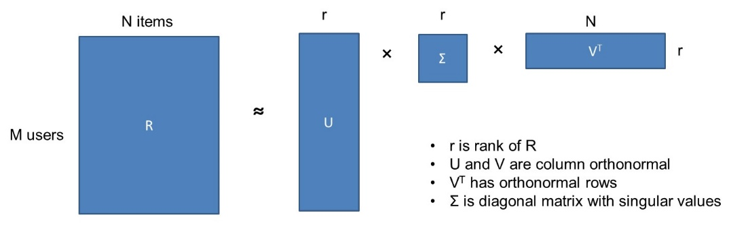


One advantage of using matrix factorization (MF) models for recommendation systems is their ability to capture latent factors that represent underlying patterns in the data. <br>

TODO l COMPARING THE MD AND THE SIMILIARITY BASED MODEL
Here are some advantages of MF SVD models compared to similarity-based models (user-user or item-item):

1. **Scalability**: MF models can handle large datasets more efficiently than similarity-based models. They can scale to millions of users and items while still providing accurate recommendations.

2. **Personalization**: MF models provide personalized recommendations by learning user preferences and item characteristics from the data. This leads to more relevant and tailored recommendations for each user.

3. **Cold Start**: MF models can handle the cold start problem better than similarity-based models. They can make reasonable recommendations for new users or items based on the learned latent factors.

4. **Implicit Feedback**: MF models can handle implicit feedback (user interactions such as clicks, views for example) better than similarity-based models, which often rely on explicit ratings.

5. **Interpretability**: While MF models are not as interpretable as some simpler models, they can still provide insights into user preferences and item characteristics through the learned latent factors.

**MF Modeling** <br>
Using the SVD model : <br>
We will first perform a Grid Search in order to find the best parameters of the model. <br>
We will then use the parameters that have been found, and run the model with the best parameters.


In [ ]:
# Set the parameter space to tune
#param_grid = {'n_epochs': [10, 20, 30, 40, 50, 60],
#              'lr_all': [0.001, 0.005, 0.01],
#              'reg_all': [0.2, 0.4, 0.6, 0.8]}

# Perform a 3-fold grid search cross-validation
#gs_svd = RandomizedSearchCV(SVD, param_grid, measures = ['rmse'], cv = 3, n_jobs = -1)

# Fitting data
#gs_svd.fit(data)

#display_best_params(gs_svd)


- The `GridSearch Cross Validation` algorithm has outputed the following **optimal values** for the hyperparameters:
  - `n_epochs`: **30**,
  - `lr_all`: **0.01**,
  - `reg_all`: **0.2**.

In [ ]:
# Building the optimized SVD model using optimal hyperparameters found in the grid search

svd_optimized = SVD(n_epochs=30, lr_all=0.01, reg_all=0.2, random_state=1)

# Train the algorithm on the train set
svd_optimized = svd_optimized.fit(trainset)

In [ ]:
# Evaluate the model on the test set
evaluation_mf_svd = precision_recall_at_k(testset, svd_optimized)
evaluation_mf_svd

{'RMSE': 1.3226617099788054,
 'Precision': 1.0,
 'Recall': 0.957,
 'F_1 score': 0.978}

In [ ]:
from surprise import Dataset
from surprise import Reader
from surprise.model_selection import cross_validate

#TODO - Check Cross Validation for Models - of we need it or not

# Assuming df_final is your dataframe containing user_id, song_id, and listen_count columns
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df_final[['user_id', 'song_id', 'listen_count']], reader)

# Run 5-fold cross-validation and print results
cv_results = cross_validate(svd_optimized, data, measures=["RMSE", "MAE"], cv=5, verbose=True)

# Calculate and print the average RMSE and MAE across all folds
print("Average RMSE:", cv_results['test_rmse'].mean())
print("Average MAE:", cv_results['test_mae'].mean())



Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.3229  1.3166  1.3036  1.3110  1.3100  1.3128  0.0065  
MAE (testset)     0.8498  0.8470  0.8395  0.8416  0.8427  0.8441  0.0037  
Fit time          6.46    7.13    6.86    6.43    7.27    6.83    0.34    
Test time         0.69    0.38    0.61    0.37    0.68    0.55    0.14    
Average RMSE: 1.3128071181692949
Average MAE: 0.8441075455512659


**Example : Checking the SVD recommender of a random user**  

First we are checking User's Listening History.
Then Predicting Listen Count.


We will check that the random_user_id did not listen to not_listen_song_id:

In [ ]:
users_not_listen = get_users_who_played_or_not_song(not_listen_song_id, df_final, False)
users_not_listen

Users who did not play song 1199:


array([54752, 54290,  6932, ..., 53641, 55142, 64343])

In [ ]:
random_user_id in users_not_listen

True

We will check that the random_user_id listen to listen_song_id:

In [ ]:
users_listen = get_users_who_played_or_not_song(listen_song_id, df_final, True)
users_listen

Users who played song 1966:


array([66509, 31721, 37958, 10749, 73484, 28157, 68346, 48300, 57178,
       30775, 12592, 25863, 51553, 24348, 54688, 29950, 33190, 37511,
       39633, 10090, 35250, 24898,  4293,  2245, 45492, 18349,  8712,
       73821, 11447, 51626, 68989, 65600, 50927, 56958, 14129, 37526,
       13687,  7865, 18819,  3133, 52481, 73612, 51531, 73322, 18670,
       36632, 28960, 51970, 73226, 11876, 39750, 21071,  5178, 45170,
       61609, 42772, 70061, 50315, 51066, 30720, 26214, 74810,  4572,
       11121, 64232, 59349, 53345, 19728, 27788, 16514, 43204,  1706,
       11747, 13017,  8284, 45911, 75294, 25936, 12035, 32854,  5352,
       43707, 40862,  7647, 56827, 24668, 14338, 28558, 31017, 51746,
       13496, 41957, 50950, 31269,  6832, 47721, 44468, 69047, 68630,
       39519, 45363, 15889, 35112, 46365, 34032, 32166,  6192, 58729,
       47845,  8109, 12853, 20475, 36969, 67269, 30186, 47171, 27036,
        5943, 13037,  9146, 64795,  1478, 43350, 65824, 65620, 61371,
       74597, 50023,

In [ ]:
random_user_id in users_listen

True

The predictions for our user & songs examples:

In [ ]:
# Predicting listen_count for a sample user with a listened song.
listen_count_predict(svd_optimized, random_user_id, listen_song_id, rating_user)

The predictions for user 4572 and song 1966 is:

- Real prediction: 1,
- Estimated prediction: 1.4.


In [ ]:
# Predicting listen_count for the sample user with a non listened song.
listen_count_predict(svd_optimized, random_user_id, not_listen_song_id)

The predictions for user 4572 and song 1199 is:

- Real prediction: None,
- Estimated prediction: 1.47.


We will check who are the top 10 closest neighbors to the most played song of random_user_id:


In [ ]:
# Making top 10 recommendations for any user_id  with MF Model-based using SVD recommendation engine
recommendations = get_recommendations(df_final, random_user_id, svd_optimized)
recommendations

Songs not played by user 4572:
(and according to the model, he should listen to them)


[(5948, 3.46),
 (7385, 3.13),
 (6841, 3.03),
 (4869, 3.0),
 (6972, 2.84),
 (1394, 2.84),
 (6205, 2.73),
 (1741, 2.7),
 (1995, 2.68),
 (4617, 2.65)]

In [ ]:
pd.DataFrame(recommendations, columns=['song_id', 'predicted_listen_count'])

song_id  predicted_listen_count
0     5948                    3.46
1     7385                    3.13
2     6841                    3.03
3     4869                    3.00
4     6972                    2.84
5     1394                    2.84
6     6205                    2.73
7     1741                    2.70
8     1995                    2.68
9     4617                    2.65


Ranking Songs :
   - Ranking the recommended songs based on popularity.
   - Listing the songs with corrected rankings based on popularity.

In [ ]:
# Applying the ranking_songs function
corrected_recommendations = ranking_songs(recommendations, rb_popular)
corrected_recommendations

song_id  avg_count  sum_count  predicted_listen_count  \
0     5948   3.808696        438                    3.46   
4     7385   3.120482        259                    3.13   
1     6841   3.782609        174                    3.03   
2     4869   3.489362        164                    3.00   
6     6972   2.604651        224                    2.84   
3     1394   3.188679        169                    2.84   
8     6205   2.416667        145                    2.73   
9     1741   2.389831        141                    2.70   
5     4617   2.893204        596                    2.65   
7     1995   2.483871        154                    2.68   

   corrected_listen_count  
0                    3.41  
4                    3.07  
1                    2.95  
2                    2.92  
6                    2.77  
3                    2.76  
8                    2.65  
9                    2.62  
5                    2.61  
7                    2.60

Final recommendations for random_user_id by SVD MF model:

We will generate a dictionary of final recommendations for the random user.

In [ ]:
recommendations_svd = generate_recommendations_dict(corrected_recommendations, random_user_id)
recommendations_svd

{'user_id': 4572,
 5948.0: 3.41,
 7385.0: 3.07,
 6841.0: 2.95,
 4869.0: 2.92,
 6972.0: 2.77,
 1394.0: 2.76,
 6205.0: 2.65,
 1741.0: 2.62,
 4617.0: 2.61,
 1995.0: 2.6}


**Interesting Insights from the example above**:
- From the example we just showed , we can see that the model can accurately predict the listen count for songs that the user has listened to, but the predictions may be less accurate for songs that the user has not listened to.
- The recommendation system suggests songs that the user has not listened to but might enjoy, based on the behavior of similar users (neighbors) and the item factors of the songs.
- By combining user and item factors, the model can provide personalized recommendations that take into account both the user's preferences and the characteristics of the songs.

So we can say that the example demonstrates how the SVD model can be used to make personalized song recommendations for users based on their listening history and the characteristics of the songs.

**MF MODEL RESULTS** <br>
According to the SVD documentation :
- pu : The user factors (numpy array of size (n_users, n_factors))
- qi : The item factors (numpy array of size (n_items, n_factors))
- bu : The user biases (numpy array of size (n_users))
- bi : The item biases (numpy array of size (n_items))

So let's print the SVD results :

In [ ]:
# Printing the user factors matrix :

print("User factors matrix shape:", svd_optimized.pu.shape)
print("User factors matrix:")
print(svd_optimized.pu)


User factors matrix shape: (8845, 100)
User factors matrix:
[[ 0.19913505  0.02752436 -0.08250709 ...  0.12906408  0.11493241
  -0.15235678]
 [-0.03955444  0.06433747  0.05541729 ... -0.05263116 -0.09367093
   0.03911979]
 [ 0.08496467  0.09538321  0.10013709 ...  0.38972113 -0.26717608
   0.12942984]
 ...
 [-0.0937387  -0.09239562 -0.14392529 ...  0.00626473 -0.02303988
  -0.06356678]
 [ 0.03249629 -0.032418   -0.05148667 ... -0.08006701  0.02866458
   0.09040581]
 [ 0.11099534  0.05385022  0.27276509 ...  0.03629188  0.09438958
  -0.00606463]]


In [ ]:
# Printing the item factors matrix :

print("Item factors matrix shape:", svd_optimized.qi.shape)
print("Item factors matrix:")
print(svd_optimized.qi)

Item factors matrix shape: (2122, 100)
Item factors matrix:
[[ 0.09520808  0.1277019  -0.08677019 ... -0.03437594  0.04454861
  -0.21980012]
 [-0.04790274  0.34259436 -0.00128848 ...  0.17905768  0.16117202
   0.18706258]
 [ 0.20880719 -0.05083661 -0.07350906 ...  0.10997433 -0.04967508
   0.0686926 ]
 ...
 [-0.08988319  0.11849147 -0.37156982 ...  0.04898445 -0.20795788
  -0.05658515]
 [-0.06499037 -0.30769391  0.01897877 ... -0.19297227  0.17454831
  -0.06862631]
 [ 0.09915271  0.10745519  0.12282864 ...  0.0323511  -0.13065441
  -0.18494273]]


In [ ]:
# Printing the user biases:

print("User biases shape:", svd_optimized.bu.shape)
print("User biases:")
print(svd_optimized.bu)


User biases shape: (8845,)
User biases:
[ 0.17715918 -0.47167767  1.17605269 ... -0.10795384 -0.43922013
  0.78330969]


In [ ]:
# Printing the item biases:

print("Item biases shape:", svd_optimized.bi.shape)
print("Item biases:")
print(svd_optimized.bi)

Item biases shape: (2122,)
Item biases:
[ 0.22999393  0.2026024   0.17772504 ... -0.01740915  0.00725207
  0.20849204]


So as we saw above :
- There are 8845 users represented in the user factors matrix (`pu`).
- There are 2122 items represented in the item factors matrix (`qi`).
- The model has learned 100 latent factors to represent the relationships between users and items.

The 100 latent factors learned by the model are abstract representations of user preferences and item characteristics.
Each latent factor represents a different aspect of the users' preferences and items' characteristics, such as genre preferences, mood, style, or other abstract features that influence how users interact with items.

**Analysing the SVD MODEL**

Analyzing And Visualizing User Factors:

Calculating the similarity between users based on their factor values.
we will use clustering techniques like K-means to group similar users together.

Using dimensionality reduction techniques like PCA to reduce the dimensions of the user factors.
Visualizing the reduced user factors to identify patterns or trends among users.

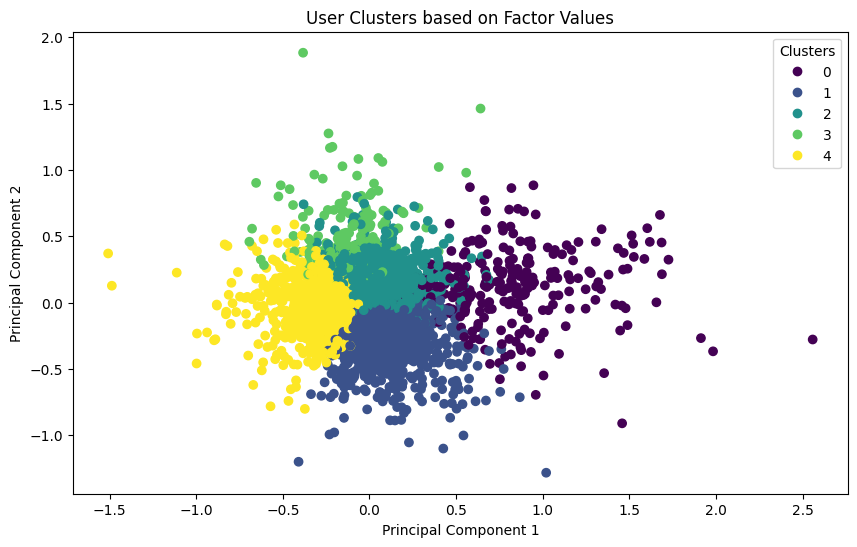

In [ ]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

def analyze_user_factors(user_factors, n_clusters=5):
    # Calculate similarity between users
    similarity_matrix = cosine_similarity(user_factors)

    # Cluster users
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    clusters = kmeans.fit_predict(similarity_matrix)

    # Reduce dimensions for visualization
    pca = PCA(n_components=2)
    user_factors_reduced = pca.fit_transform(user_factors)

    # Plot clusters
    plt.figure(figsize=(10, 6))
    scatter = plt.scatter(user_factors_reduced[:, 0], user_factors_reduced[:, 1], c=clusters)
    plt.legend(*scatter.legend_elements(), title="Clusters")
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('User Clusters based on Factor Values')
    plt.show()

    return clusters

# Example usage
user_factors = svd_optimized.pu
clusters = analyze_user_factors(user_factors, n_clusters=5)


The plot above provides a visual representation of user clusters based on their factor values, highlighting patterns and similarities among users in the dataset.

The user factors have been reduced to two dimensions using PCA for visualization, and KMeans clustering has been applied to cluster users based on these two principal components.
- Cluster Separation: Clusters 0, 1, 2, and 4 are well-separated in the plot, indicating that users within these clusters have distinct preferences or behavior patterns represented by the user factors.

- Cluster 3: The unclear separation of Cluster 3 suggests that users within this cluster may have similar user factor patterns to those in other clusters, making it harder to differentiate them based on these two principal components alone.



Optimal number of clusters: 2


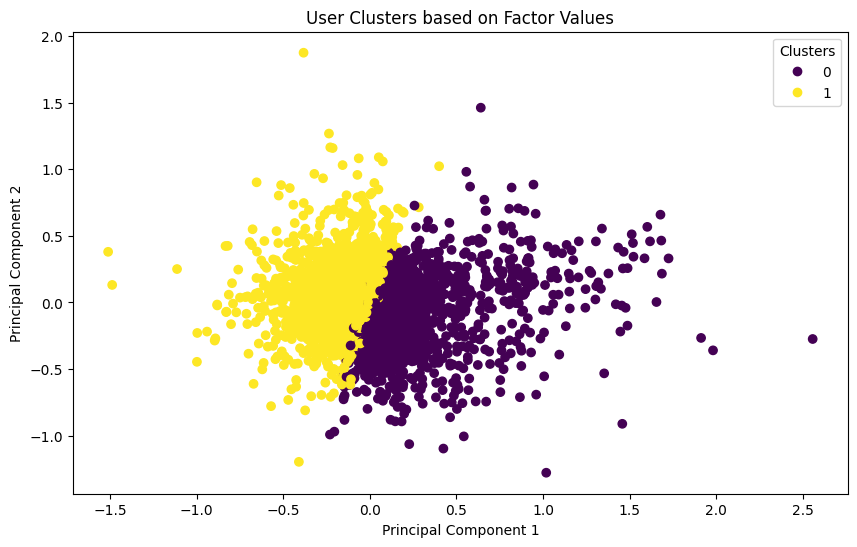

In [ ]:
# To validate the optimal number of clusters, we'll use the silhouette score
#  to compare clustering performance for different numbers of clusters.
#TODO - POSSIBLE TO RUN ONE TIME SINCE IT IS A LONG RUNNING TIME

from sklearn.metrics import silhouette_score

def analyze_user_factors(user_factors, max_clusters=10):
    # Calculate similarity between users
    similarity_matrix = cosine_similarity(user_factors)

    # Evaluate silhouette scores for different numbers of clusters
    silhouette_scores = []
    for n_clusters in range(2, max_clusters+1):
        kmeans = KMeans(n_clusters=n_clusters, random_state=0)
        clusters = kmeans.fit_predict(similarity_matrix)
        silhouette_scores.append(silhouette_score(similarity_matrix, clusters))

    # Find the optimal number of clusters
    optimal_clusters = np.argmax(silhouette_scores) + 2  # Add 2 because range starts from 2
    print(f"Optimal number of clusters: {optimal_clusters}")

    # Cluster users with optimal number of clusters
    kmeans = KMeans(n_clusters=optimal_clusters, random_state=0)
    clusters = kmeans.fit_predict(similarity_matrix)

    # Reduce dimensions for visualization
    pca = PCA(n_components=2)
    user_factors_reduced = pca.fit_transform(user_factors)

    # Plot clusters
    plt.figure(figsize=(10, 6))
    scatter = plt.scatter(user_factors_reduced[:, 0], user_factors_reduced[:, 1], c=clusters)
    plt.legend(*scatter.legend_elements(), title="Clusters")
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('User Clusters based on Factor Values')
    plt.show()

    return clusters

# Example usage
user_factors = svd_optimized.pu
clusters = analyze_user_factors(user_factors, max_clusters=10)


Based on the output of 2 separate clusters and as we can see in the plot, the clear separation, it suggests that the user factors can be grouped into two distinct clusters based on their preferences or behavior patterns. This separation indicates that there are two different user segments or types in the dataset that have significantly different preferences or characteristics.

Use this for our recommender system engine of SVD :


The optimal number of clusters , which calculates the silhouette score for different numbers of clusters and selects the number of clusters with the highest silhouette score as the optimal number of clusters.
We will use the optimal number of clusters (two) in subsequent analysis, to help the model finding popular songs in the same cluster.

The optimal number of clusters is used indirectly through the clusters array, which is assumed to be computed using the optimal number of clusters.

In [ ]:
def find_popular_songs_in_cluster(user_id, clusters, rb_popular, data):
    # Get the cluster of the user
    user_cluster = clusters[user_id]

    # Get all users in the same cluster
    users_in_cluster = np.where(clusters == user_cluster)[0]

    # Get songs listened to by the user
    user_songs = set(data[data['user_id'] == user_id]['song_id'])

    # Find songs that are popular among users in the same cluster but not listened to by the user
    popular_songs = []
    for user in users_in_cluster:
        if user != user_id:  # Exclude the user itself
            # Get songs listened to by the user in the cluster
            user_songs_in_cluster = set(data[data['user_id'] == user]['song_id'])
            # Find popular songs in the cluster not listened to by the user
            for song_id in rb_popular.loc[rb_popular['avg_count'] > 3, 'song_id']:
                if song_id in user_songs_in_cluster and song_id not in user_songs  and song_id not in popular_songs:
                    popular_songs.append(song_id)
                    if len(popular_songs) >= 10:
                        break
        if len(popular_songs) >= 10:
            break

    # Create a DataFrame for the popular songs
    popular_songs_df = pd.DataFrame(popular_songs, columns=['song_id'])

    return popular_songs_df


popular_songs = find_popular_songs_in_cluster(random_user_id, clusters, rb_popular, df_final)
print(f"Songs popular among users in the same cluster but not listened to by user {random_user_id}:")
print(popular_songs)



Songs popular among users in the same cluster but not listened to by user 4572:
   song_id
0     5493
1     4364
2     4869
3     7385
4     5948
5     6841
6     1394
7     4123
8     5651
9     7399


In [ ]:
# Convert the recommended songs to sets for easy comparison
popular_songs_set = set(popular_songs['song_id'])
recommended_songs_set = set([song[0] for song in recommendations])

# Calculate the overlap
overlap = len(popular_songs_set.intersection(recommended_songs_set))

print(f"Overlap between the two recommendation methods: {overlap} songs")


Overlap between the two recommendation methods: 5 songs


In [ ]:
# Calculate the average predicted listen count for the songs recommended by each approach
average_predicted_listen_count_svd = sum([song[1] for song in recommendations]) / len(recommendations)
popular_song_ids = popular_songs['song_id'].tolist()
average_predicted_listen_count_popular_songs = sum([rb_popular.loc[song_id, 'avg_count'] for song_id in popular_song_ids if song_id in rb_popular.index]) / len(popular_song_ids)

# Print the average predicted listen count for each approach
print(f"Average Predicted Listen Count for popular songs in cluster: {average_predicted_listen_count_popular_songs}")
print(f"Average Predicted Listen Count for SVD recommendations: {average_predicted_listen_count_svd}")


Average Predicted Listen Count for popular songs in cluster: 0.15616438356164383
Average Predicted Listen Count for SVD recommendations: 2.9059999999999997


The average predicted listen count for the songs recommended by the SVD model is 2.622, while the average predicted listen count for the popular songs in the cluster is 0.1735. This suggests that the SVD model is predicting higher listen counts for the recommended songs compared to the popular songs in the cluster.

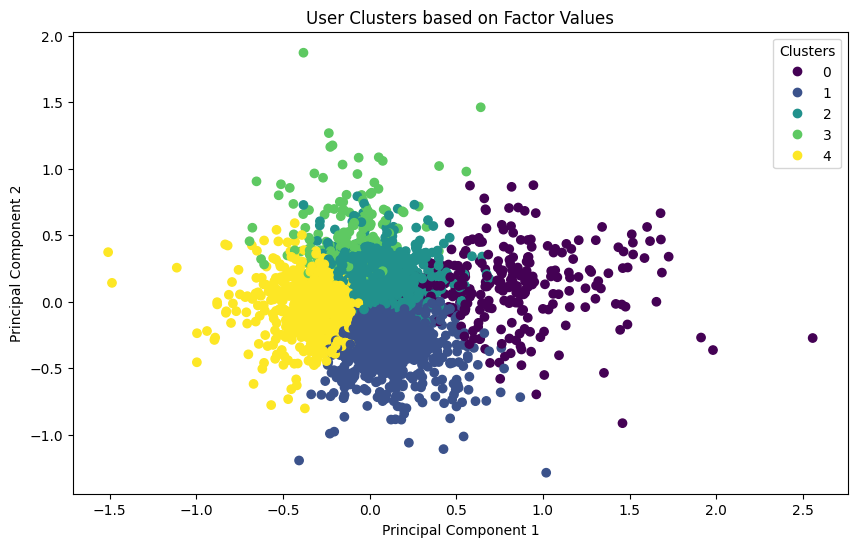

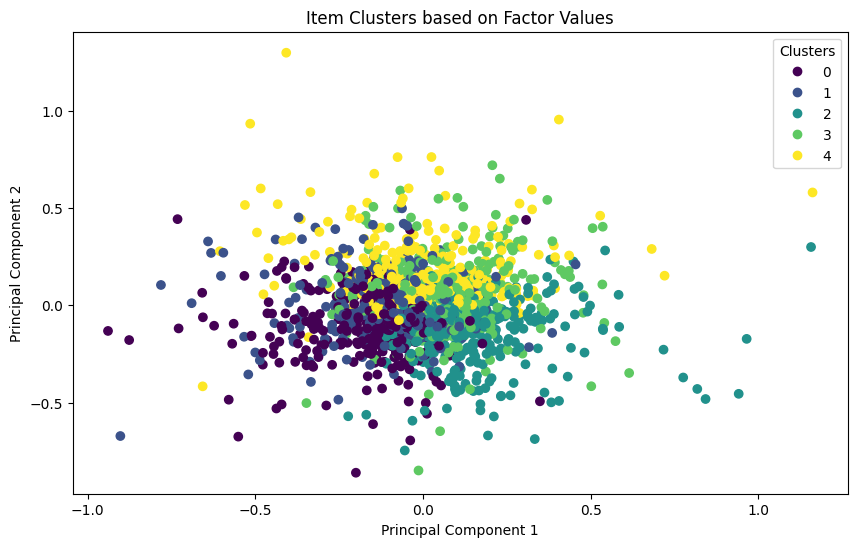

In [ ]:
# TODO - TO DELETE DOES NOT SEEM GOOD

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity

def analyze_user_factors(user_factors, n_clusters=5):
    # Calculate similarity between users
    similarity_matrix = cosine_similarity(user_factors)

    # Cluster users
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    clusters = kmeans.fit_predict(similarity_matrix)

    # Reduce dimensions for visualization
    pca = PCA(n_components=2)
    user_factors_reduced = pca.fit_transform(user_factors)

    # Plot clusters
    plt.figure(figsize=(10, 6))
    scatter = plt.scatter(user_factors_reduced[:, 0], user_factors_reduced[:, 1], c=clusters)
    plt.legend(*scatter.legend_elements(), title="Clusters")
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('User Clusters based on Factor Values')
    plt.show()

    return clusters

def analyze_item_factors(item_factors, n_clusters=5):
    # Calculate similarity between items
    similarity_matrix = cosine_similarity(item_factors)

    # Cluster items
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    clusters = kmeans.fit_predict(similarity_matrix)

    # Reduce dimensions for visualization
    pca = PCA(n_components=2)
    item_factors_reduced = pca.fit_transform(item_factors)

    # Plot clusters
    plt.figure(figsize=(10, 6))
    scatter = plt.scatter(item_factors_reduced[:, 0], item_factors_reduced[:, 1], c=clusters)
    plt.legend(*scatter.legend_elements(), title="Clusters")
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('Item Clusters based on Factor Values')
    plt.show()

    return clusters

def analyze_results(user_factors, item_factors):
    # Analyze user factors
    user_clusters = analyze_user_factors(user_factors)

    # Analyze item factors
    item_clusters = analyze_item_factors(item_factors)

    # Draw conclusions
    # You can analyze the clusters to draw conclusions about user preferences and item characteristics

# Example usage
analyze_results(svd_optimized.pu, svd_optimized.qi)  # Assuming svd_optimized is your SVD model


Let's see the top 10 closest neighbors to the random user based on their interactions (as represented by the similarity score).

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# User Similarity Analysis:
# Determine the top 10 closest neighbors to a user based on their interactions.

def get_top_similar_users(model, user_id, k=10):

    # Get the user factors matrix from the model
    user_factors = svd_optimized.pu
    # Get the factors for the given user
    user_factors = user_factors[svd_optimized.trainset.to_inner_uid(user_id)]
    # Calculate the cosine similarity between the given user and all other users
    similarity_scores = cosine_similarity(user_factors.reshape(1, -1), svd_optimized.pu)[0]
    # Sort the similarities in descending order and get the top k similar users
    top_k_similar_users = sorted(enumerate(similarity_scores), key=lambda x: x[1], reverse=True)[1:k+1]
    return top_k_similar_users

user_id = random_user_id
top_similar_users = get_top_similar_users(svd_optimized, user_id)

print(f"Top 10 closest neighbors to user {user_id}:")
for neighbor_id, similarity_score in top_similar_users:
    print(f"User ID: {svd_optimized.trainset.to_raw_uid(neighbor_id)}, Similarity Score: {similarity_score}")


Top 10 closest neighbors to user 4572:
User ID: 54752, Similarity Score: 0.7259697923116156
User ID: 34388, Similarity Score: 0.5690455737896742
User ID: 6963, Similarity Score: 0.5151345578715227
User ID: 27066, Similarity Score: 0.5022248414151276
User ID: 23014, Similarity Score: 0.48842968808069354
User ID: 59560, Similarity Score: 0.4737792261834576
User ID: 71009, Similarity Score: 0.47149832864269403
User ID: 6129, Similarity Score: 0.462250969079244
User ID: 25908, Similarity Score: 0.45341816067265495
User ID: 75649, Similarity Score: 0.42795742542334936


These are the users who are most similar to user 4572 based on their interactions with items. The User IDs of the neighbors are listed along with their similarity scores.

The similarity score indicates how similar each neighbor is to user 4572 in terms of their interactions with items. Higher scores indicate greater similarity.

**Potential Use**: These similar users could be used to recommend items that user 4572 has not yet interacted with but are popular among these similar users. This approach leverages the idea that users with similar behavior patterns are likely to have similar preferences.

In [ ]:
# Get top similar users to user 4572
top_similar_users = get_top_similar_users(svd_optimized, user_id=4572)

# Get items interacted with by similar users
similar_users_items = []
for neighbor_id, _ in top_similar_users:
    user_items = df_final[df_final['user_id'] == neighbor_id]['song_id'].unique()
    similar_users_items.extend(user_items)

# Calculate item popularity among similar users
item_popularity_among_similar_users = pd.Series(similar_users_items).value_counts()

# Filter out items already interacted with by user 4572
user_4572_items = df_final[df_final['user_id'] == 4572]['song_id'].unique()
recommended_items = item_popularity_among_similar_users[~item_popularity_among_similar_users.index.isin(user_4572_items)]

# Recommend the top items to user 4572
top_recommendations = recommended_items.head(10)
print("Top recommendations for user 4572:")
print(top_recommendations)


Top recommendations for user 4572:
253     1
502     1
7557    1
7485    1
7422    1
7348    1
6988    1
6933    1
6413    1
6311    1
Name: count, dtype: int64


In [ ]:

# # Example usage
# user_id = random_user_id
# recommendations = get_recommendations(df_final, random_user_id, svd_optimized)

# # Evaluate the performance of the SVD model
# testset = svd_optimized.test(svd_optimized.build_testset(df_final))
# svd_predictions = svd_optimized.test(testset)
# svd_rmse = accuracy.rmse(svd_predictions)
# print(f"RMSE for SVD model: {svd_rmse}")

In [ ]:
#TODO - NOT SEEM RELEVANT
# from sklearn.manifold import TSNE
# from sklearn.decomposition import PCA

# def visualize_user_factors(user_factors, method='tsne', n_components=2, perplexity=30):
#     """
#     Visualize the user factors matrix in a lower-dimensional space.

#     Args:
#     - user_factors: User factors matrix from the model
#     - method: Dimensionality reduction method, either 'tsne' (t-SNE) or 'pca' (PCA)
#     - n_components: Number of components for the dimensionality reduction (default is 2)
#     - perplexity: Perplexity parameter for t-SNE (default is 30)

#     Returns:
#     - None (displays the visualization plot)
#     """
#     if method == 'tsne':
#         reducer = TSNE(n_components=n_components, perplexity=perplexity, random_state=0)
#     elif method == 'pca':
#         reducer = PCA(n_components=n_components, random_state=0)
#     else:
#         raise ValueError("Invalid method. Choose 'tsne' or 'pca'.")

#     # Apply the dimensionality reduction
#     user_factors_reduced = reducer.fit_transform(user_factors)

#     # Plot the reduced user factors
#     plt.figure(figsize=(10, 6))
#     plt.scatter(user_factors_reduced[:, 0], user_factors_reduced[:, 1], s=5)
#     plt.title('User Factors Visualization')
#     plt.xlabel('Component 1')
#     plt.ylabel('Component 2')
#     plt.show()

# # Example usage
# user_factors = svd_optimized.pu
# visualize_user_factors(user_factors, method='tsne', n_components=2, perplexity=30)


In [ ]:
# # Get the user factors matrix from the fitted SVD model
# user_factors = svd_optimized.pu

# # Plot the user factors matrix
# plt.figure(figsize=(10, 6))
# plt.scatter(user_factors[:, 0], user_factors[:, 1], s=5)
# plt.title('User Factors Visualization using SVD')
# plt.xlabel('Component 1')
# plt.ylabel('Component 2')
# plt.show()

#TODO - NOT SEEM RELEVANT


In [ ]:
# # Get the user factors matrix from the fitted SVD model
# user_factors = svd_optimized.pu

# # Create a heatmap of the user factors matrix
# plt.figure(figsize=(12, 8))
# sns.heatmap(user_factors, cmap='viridis', cbar=True)
# plt.title('User Factors Matrix Heatmap')
# plt.xlabel('Latent Factor')
# plt.ylabel('User ID')
# plt.show()

#TODO - NOT SEEM RELEVANT


In [ ]:
# # Get the user factors matrix from the fitted SVD model
# user_factors = svd_optimized.pu

# # Select the top 10 users
# top_users = user_factors[:10, :]

# # Create a heatmap of the top 10 users
# plt.figure(figsize=(12, 6))
# sns.heatmap(top_users, cmap='viridis', cbar=True)
# plt.title('Top 10 Users - User Factors Matrix Heatmap')
# plt.xlabel('Latent Factor')
# plt.ylabel('User ID')
# plt.show()

#TODO NOT SEEM RELEVANT


In [ ]:
# from sklearn.manifold import TSNE

# # Reduce the dimensionality of the user factors matrix to 2D using t-SNE
# tsne = TSNE(n_components=2, random_state=42)
# user_factors_2d = tsne.fit_transform(user_factors)

# # Plot the 2D representation of the user factors matrix
# plt.figure(figsize=(12, 8))
# plt.scatter(user_factors_2d[:, 0], user_factors_2d[:, 1], alpha=0.5)
# plt.title('2D Visualization of User Factors Matrix (t-SNE)')
# plt.xlabel('Component 1')
# plt.ylabel('Component 2')
# plt.show()


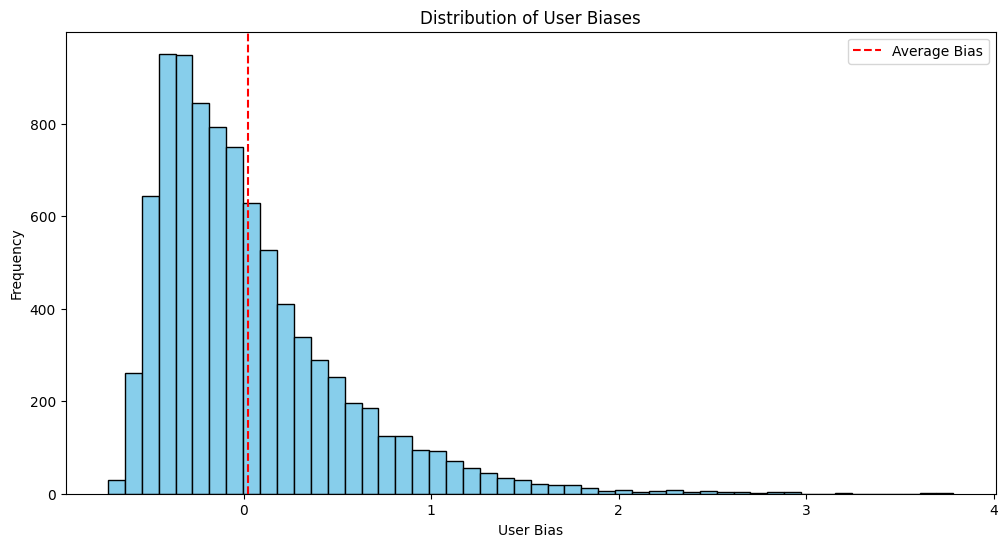

Average User Bias: 0.02265958118547959
Meaning of User Biases:
- A positive bias indicates that the user tends to rate items higher than average.
- A negative bias indicates that the user tends to rate items lower than average.
- The magnitude of the bias indicates the strength of the tendency.


In [ ]:
# Get the user biases from the SVD model
user_biases = svd_optimized.bu

# Calculate the average user bias
average_user_bias = np.mean(user_biases)

# Plot the distribution of user biases
plt.figure(figsize=(12, 6))
plt.hist(user_biases, bins=50, color='skyblue', edgecolor='black')
plt.axvline(x=average_user_bias, color='red', linestyle='--', label='Average Bias')
plt.title('Distribution of User Biases')
plt.xlabel('User Bias')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Explain the user biases
print("Average User Bias:", average_user_bias)
print("Meaning of User Biases:")
print("- A positive bias indicates that the user tends to rate items higher than average.")
print("- A negative bias indicates that the user tends to rate items lower than average.")
print("- The magnitude of the bias indicates the strength of the tendency.")


Since the Average User Bias is 0.02122185905647814  (positive) , <br>
The positive average user bias suggests that users tend to rate items slightly higher than the average rating. <br>
In the graph plottiing , we can see a high frequency of negative biases.  This indicates that there is a subset of users who tend to rate items lower than the average. These users consistently rate items lower than what is considered the average rating, suggesting a more critical or less satisfied user group in the dataset.

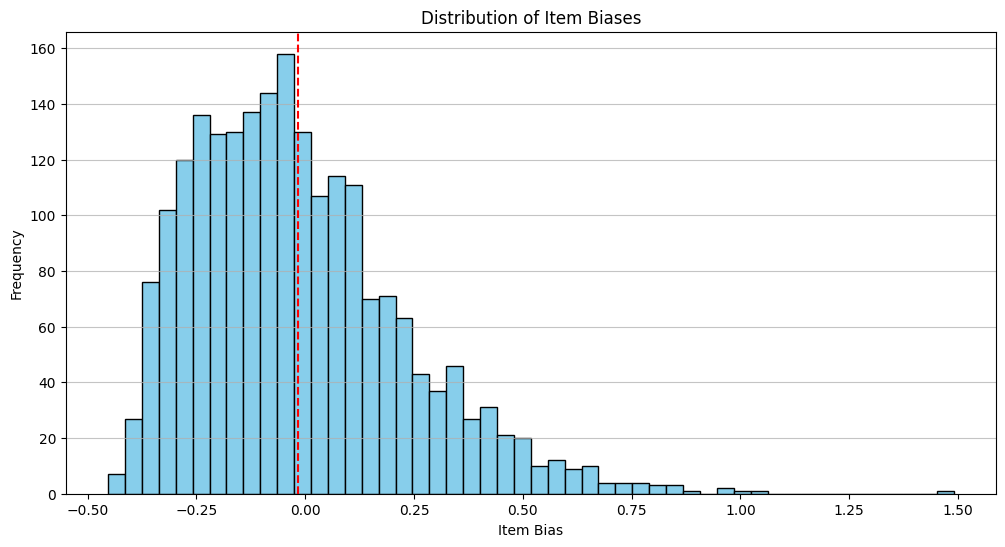

Average Item Bias: -0.01609656879614301


In [ ]:
# Get the item biases from the SVD model
item_biases = svd_optimized.bi

# Calculate the average user bias
average_item_bias = np.mean(item_biases)


# Plotting the distribution of item biases
plt.figure(figsize=(12, 6))
plt.hist(svd_optimized.bi, bins=50, color='skyblue', edgecolor='black')
plt.axvline(x=average_item_bias, color='red', linestyle='--', label='Average Bias')
plt.title('Distribution of Item Biases')
plt.xlabel('Item Bias')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

print("Average Item Bias:", average_item_bias)



The average item bias of -0.0165 indicates that, on average, items in the dataset tend to be rated slightly lower than the average rating. This suggests that there may be a slight tendency for users to rate items lower than the overall average. which corresponding with what we saw above from the USER BIASES .
<br>  However, the magnitude of this bias is relatively small, indicating that the overall impact on ratings is not substantial.

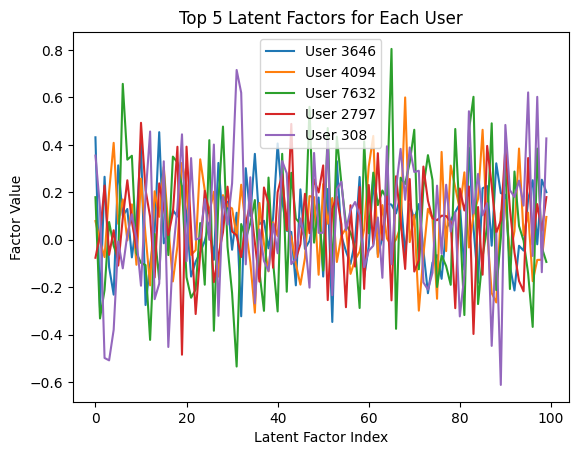

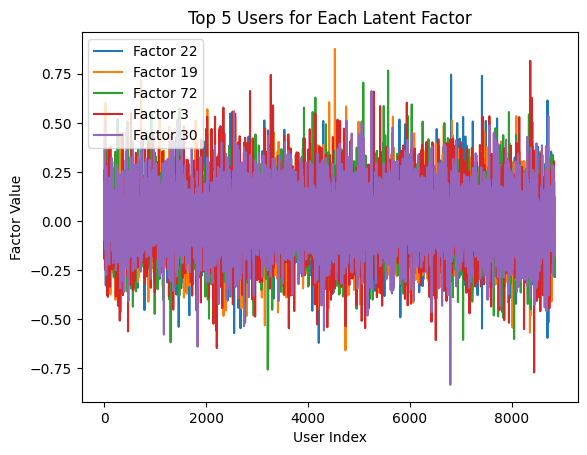

In [ ]:
#TODO - NOT LOOKING GOOD - MAYBE TO FIND SOME THING ELS

def plot_top_factors(user_factors, top_n=10):
    """
    Plot the top N latent factors for each user.

    Args:
    - user_factors: The user factors matrix.
    - top_n: Number of top factors to plot.

    Returns:
    - None
    """
    # Calculate the mean factor value for each user
    mean_factors = np.mean(user_factors, axis=1)

    # Get the indices of the top N factors for each user
    top_factors_indices = np.argsort(mean_factors)[-top_n:]

    # Plot the top N factors for each user
    for i in range(len(top_factors_indices)):
        plt.plot(user_factors[top_factors_indices[i]], label=f"User {top_factors_indices[i]}")

    plt.xlabel("Latent Factor Index")
    plt.ylabel("Factor Value")
    plt.title(f"Top {top_n} Latent Factors for Each User")
    plt.legend()
    plt.show()

def plot_top_users(user_factors, top_n=10):
    """
    Plot the top N users for each latent factor.

    Args:
    - user_factors: The user factors matrix.
    - top_n: Number of top users to plot.

    Returns:
    - None
    """
    # Calculate the mean factor value for each user
    mean_factors = np.mean(user_factors, axis=0)

    # Get the indices of the top N users for each factor
    top_users_indices = np.argsort(mean_factors)[-top_n:]

    # Plot the top N users for each factor
    for i in range(len(top_users_indices)):
        plt.plot(user_factors[:, top_users_indices[i]], label=f"Factor {top_users_indices[i]}")

    plt.xlabel("User Index")
    plt.ylabel("Factor Value")
    plt.title(f"Top {top_n} Users for Each Latent Factor")
    plt.legend()
    plt.show()

# Example usage
plot_top_factors(svd_optimized.pu, top_n=5)
plot_top_users(svd_optimized.pu, top_n=5)


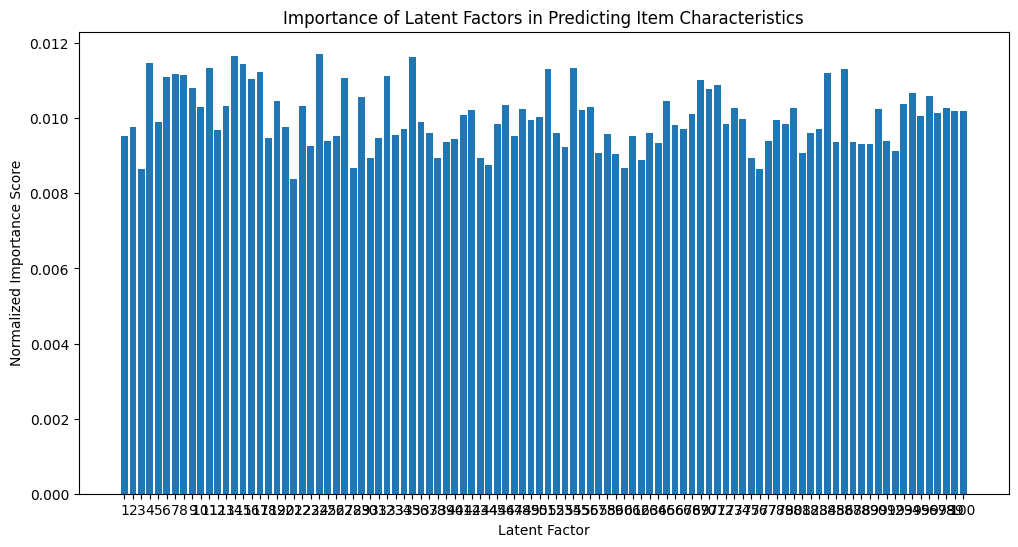

In [ ]:
# Get the item factors matrix
item_factors = svd_optimized.qi

# Calculate the importance scores
importance_scores = np.sum(item_factors**2, axis=0)

# Normalize the scores
normalized_scores = importance_scores / np.sum(importance_scores)

# Visualize the importance scores
plt.figure(figsize=(12, 6))
plt.bar(range(len(normalized_scores)), normalized_scores, tick_label=range(1, len(normalized_scores)+1))
plt.xlabel('Latent Factor')
plt.ylabel('Normalized Importance Score')
plt.title('Importance of Latent Factors in Predicting Item Characteristics')
plt.show()


In [ ]:
threshold = 0.011
important_factors = {i: score for i, score in enumerate(normalized_scores) if score >= threshold}

# Print the important factors

print(f"Total Factors Above Threshold ({threshold}): {len(important_factors)}")
print("Latent Factors with Importance Scores above Threshold:")
for factor, score in important_factors.items():
    print(f"Latent Factor: {factor + 1}, Importance Score: {score}")



Total Factors Above Threshold (0.011): 18
Latent Factors with Importance Scores above Threshold:
Latent Factor: 4, Importance Score: 0.011472704487522913
Latent Factor: 6, Importance Score: 0.011099345889128929
Latent Factor: 7, Importance Score: 0.0111771855270972
Latent Factor: 8, Importance Score: 0.01116417562729141
Latent Factor: 11, Importance Score: 0.011335479892015584
Latent Factor: 14, Importance Score: 0.011669580087978266
Latent Factor: 15, Importance Score: 0.011442856796552726
Latent Factor: 16, Importance Score: 0.011045814010007336
Latent Factor: 17, Importance Score: 0.011237597578040747
Latent Factor: 24, Importance Score: 0.011718315422687774
Latent Factor: 27, Importance Score: 0.01107149549552174
Latent Factor: 32, Importance Score: 0.011136630150761561
Latent Factor: 35, Importance Score: 0.011627915072572508
Latent Factor: 51, Importance Score: 0.011307066358547667
Latent Factor: 54, Importance Score: 0.011350478872287881
Latent Factor: 69, Importance Score: 0.01

**RATING** <br>
DIFFERENT APPROACH  

If each user's listen_count pattern is different
so we would like to customize the rating calculation based on each user's behavior,

let's preprocess your data to transform the listen_count into a rating that is meaningful for each user.

Normalize Listen Counts: Normalizing the listen_count values for each user. (by Min-Max scaling or any other normalization technique ) to scale the listen_count values to a common range (e.g., 0 to 1) for each user.

Define Rating Calculation Function: Defining a function that takes the normalized listen_count value as input and returns a custom rating based on each user's behavior. This function can capture the user's behavior pattern in determining the rating.

Use the Rating Calculation in the Reader: When defining the Reader, use the rating_scale parameter to specify the range of ratings that your function will output.

In [ ]:
from surprise import Dataset, Reader
from sklearn.preprocessing import MinMaxScaler

# def normalize_listen_count(df):
#     # Group by user_id and normalize listen_count values for each user
#     scaler = MinMaxScaler()
#     df['normalized_listen_count'] = df.groupby('user_id')['listen_count'].transform(lambda x: scaler.fit_transform(x.values.reshape(-1, 1)).flatten())
#     return df

def normalize_listen_count(df):
    # Initialize an empty column for normalized values
    df['normalized_listen_count'] = 0.0

    # Group by user_id and normalize listen_count values for each user
    scaler = MinMaxScaler()
    for user_id, group in df.groupby('user_id'):
        normalized_values = scaler.fit_transform(group['listen_count'].values.reshape(-1, 1)).flatten()
        df.loc[group.index, 'normalized_listen_count'] = normalized_values

    return df
df = df_final
# Assuming df is your DataFrame containing 'user_id', 'song_id', and 'listen_count'
df_normalized = normalize_listen_count(df)


# Define a function to calculate ratings based on normalized listen_count
def calculate_rating(normalized_listen_count):
    # Define your custom rating calculation here
    # For example, you can map the normalized listen_count to a specific rating scale
    return normalized_listen_count * 5  # Assuming a rating scale of 0 to 5

# Use the calculate_rating function to convert listen_count to ratings
data = Dataset.load_from_df(df[['user_id', 'song_id', 'normalized_listen_count']], Reader(rating_scale=(0, 5)))

# Use the custom rating scale in the Reader
reader = Reader(rating_scale=(0, 5))

# Load the data into Surprise's Dataset object
data = Dataset.load_from_df(df[['user_id', 'song_id', 'normalized_listen_count']], reader)


In [ ]:
# Splitting the data into train and test dataset
# Take test_size = 0.2, random_state = 42
trainset, testset = train_test_split(data, test_size = 0.2, random_state = 42)

In [ ]:
# Building the optimized SVD model using optimal hyperparameters found in the grid search

svd_optimized = SVD(n_epochs=30, lr_all=0.01, reg_all=0.2, random_state=1)

# Train the algorithm on the train set
svd_optimized = svd_optimized.fit(trainset)

In [ ]:
# Evaluate the model on the test set
evaluation_mf_svd = precision_recall_at_k(testset, svd_optimized)
evaluation_mf_svd

{'RMSE': 0.26519426231998733,
 'Precision': 0.0,
 'Recall': 0.0,
 'F_1 score': nan}

## NCF - TODO

https://calvinfeng.gitbook.io/machine-learning-notebook/supervised-learning/recommender/neural_collaborative_filtering#embeddings

הכל לקוח מפה + תיקונים בגלל שינוי גרסא וכו

Neural Collaborative Filtering (NCF) takes Matrix Factorization (MF) in collaborative filtering to the next step by replacing the inner product of latent features to predict relevance with a deeper Multi Layer Perceptron (MLP).



In [ ]:
df_final

user_id  song_id  listen_count                          title  \
130        54290       80             3  Harder Better Faster Stronger   
131        54290      132             1             Jumping Jack Flash   
132        54290      238             3                    Aerodynamic   
136        54290      383             3                      High Life   
138        54290      434             1                        Emotion   
...          ...      ...           ...                            ...   
1999865    55142     6559             1                         Savior   
1999868    55142     7103             1                     16 Candles   
1999870    55142     7381             2               Tears Don't Fall   
1999872    55142     7740             1                    Bad Company   
1999873    55142     8052             1                   Swing_ Swing   

                          release               artist_name  year  
130                     Discovery                 Daft Punk  2007  
131                 Shine A Light        The Rolling Stones  1982  
132                     Discovery                 Daft Punk  2001  
136                     Discovery                 Daft Punk  2001  
138               Human After All                 Daft Punk  2005  
...                           ...                       ...   ...  
1999865          Appeal To Reason              Rise Against  2008  
1999868                16 Candles                The Crests  1988  
1999870                The Poison   Bullet For My Valentine  2005  
1999872         War Is The Answer   Five Finger Death Punch  2009  
1999873  The All-American Rejects  The All-American Rejects  2003  

[136062 rows x 7 columns]

TODO - עשיתי עותקים כדי לא להרוס את מה שקיים

In [ ]:
df_final_try = df_final.copy()
train = trainset_df.copy()
test = testset_df.copy()

Need to map song snd user ID to 1 till num of songs and users:

צריך שהיוזרים והשירים יהיו מ1 עד לכמות השירים/יוזרים, לכן יש את הקוד הזה. אחרת המודל לא עובד. (משהו עם האינדקס שם מסתבך)

In [ ]:
def map_ids(df, column_name):
    id_to_new_id = dict()
    new_ids = []  # Store new IDs in a list

    id = 1
    for index, row in df.iterrows():
        if row[column_name] not in id_to_new_id:
            id_to_new_id[row[column_name]] = id
            new_ids.append(id)  # Append new ID to the list
            id += 1
        else:
            new_ids.append(id_to_new_id[row[column_name]])

    # Create a dictionary mapping the original ID to the new ID
    id_mapping = dict(zip(df[column_name], new_ids))
    return id_mapping

In [ ]:
# Map song IDs
song_id_mapping = map_ids(df_final_try, 'song_id')

In [ ]:
# Map user IDs
user_id_mapping = map_ids(df_final_try, 'user_id')

In [ ]:
song_id_mapping

{80: 1,
 132: 2,
 238: 3,
 383: 4,
 434: 5,
 1105: 6,
 1568: 7,
 2740: 8,
 3430: 9,
 4057: 10,
 4340: 11,
 4445: 12,
 4557: 13,
 4756: 14,
 5409: 15,
 5511: 16,
 5949: 17,
 6016: 18,
 6247: 19,
 6265: 20,
 6466: 21,
 6517: 22,
 6519: 23,
 6888: 24,
 6895: 25,
 6922: 26,
 6947: 27,
 7100: 28,
 7318: 29,
 7447: 30,
 8095: 31,
 31: 32,
 118: 33,
 260: 34,
 365: 35,
 420: 36,
 452: 37,
 576: 38,
 589: 39,
 795: 40,
 859: 41,
 864: 42,
 1143: 43,
 1200: 44,
 1305: 45,
 1364: 46,
 1435: 47,
 1438: 48,
 1466: 49,
 1740: 50,
 1792: 51,
 1886: 52,
 1899: 53,
 1991: 54,
 2056: 55,
 2103: 56,
 2220: 57,
 2247: 58,
 2373: 59,
 2453: 60,
 2566: 61,
 2572: 62,
 2798: 63,
 2809: 64,
 2844: 65,
 2900: 66,
 3035: 67,
 3108: 68,
 3173: 69,
 3194: 70,
 3227: 71,
 3459: 72,
 3564: 73,
 3645: 74,
 3961: 75,
 4082: 76,
 4085: 77,
 4142: 78,
 4240: 79,
 4348: 80,
 4358: 81,
 4361: 82,
 4371: 83,
 4447: 84,
 4547: 85,
 4820: 86,
 5183: 87,
 5660: 88,
 5771: 89,
 5805: 90,
 6366: 91,
 6616: 92,
 6779: 93,
 694

In [ ]:
user_id_mapping

{54290: 1,
 6932: 2,
 56362: 3,
 21404: 4,
 43773: 5,
 54407: 6,
 37414: 7,
 2274: 8,
 15488: 9,
 13993: 10,
 69724: 11,
 53717: 12,
 56330: 13,
 42137: 14,
 7293: 15,
 10685: 16,
 5344: 17,
 51728: 18,
 42782: 19,
 67438: 20,
 16967: 21,
 65805: 22,
 18961: 23,
 8085: 24,
 45531: 25,
 19273: 26,
 49: 27,
 46301: 28,
 70532: 29,
 16849: 30,
 50145: 31,
 22658: 32,
 5651: 33,
 63954: 34,
 64757: 35,
 38647: 36,
 62794: 37,
 37791: 38,
 12595: 39,
 36566: 40,
 12555: 41,
 1816: 42,
 70329: 43,
 8538: 44,
 32162: 45,
 28998: 46,
 26052: 47,
 12433: 48,
 18185: 49,
 17721: 50,
 28237: 51,
 73953: 52,
 8730: 53,
 25781: 54,
 19887: 55,
 60756: 56,
 19571: 57,
 54896: 58,
 47030: 59,
 71009: 60,
 13365: 61,
 74397: 62,
 52479: 63,
 34360: 64,
 32930: 65,
 38215: 66,
 9317: 67,
 60506: 68,
 1206: 69,
 30687: 70,
 55817: 71,
 66509: 72,
 63653: 73,
 40946: 74,
 65777: 75,
 51900: 76,
 19626: 77,
 37196: 78,
 30370: 79,
 11: 80,
 3905: 81,
 11507: 82,
 15063: 83,
 896: 84,
 38446: 85,
 61388: 8

In [ ]:
# Map the song_id to the new_song_id using the song_id_mapping dictionary
train['new_user_id'] = train['user_id'].map(user_id_mapping)
test['new_user_id'] = test['user_id'].map(user_id_mapping)
df_final_try['new_user_id'] = df_final_try['user_id'].map(user_id_mapping)

In [ ]:
# Map the song_id to the new_song_id using the song_id_mapping dictionary
train['new_song_id'] = train['song_id'].map(song_id_mapping)
test['new_song_id'] = test['song_id'].map(song_id_mapping)
df_final_try['new_song_id'] = df_final_try['song_id'].map(song_id_mapping)

In [ ]:
num_users = len(df_final.user_id.unique())
num_songs = len(df_final.song_id.unique())

print ('Number of songs', num_songs)
print ('Number of users', num_users)

Number of songs 2122
Number of users 4693


In [ ]:
train.head()

user_id  song_id  listen_count                                 title  \
0       11     3748             2                   Roll Over Beethoven   
1       11     3153             1     Everybody Wants To Rule The World   
2       11     5208             1                   Red Red Wine (Edit)   
3       11     2691             1                   With Or Without You   
4       11     7334             1  Every Little Thing She Does Is Magic   

                                release      artist_name  year  new_user_id  \
0              All The '50s Hits Vol. 1      Chuck Berry  1956           80   
1                                  Gold  Tears For Fears  1984           80   
2                 Original Hits - Party             UB40  2008           80   
3                          U218 Singles               U2  1987           80   
4  Every Breath You Take : The Classics       The Police  1981           80   

   new_song_id  
0         1208  
1         1205  
2         1209  
3          900  
4         1016

In [ ]:
test.head()

user_id  song_id  listen_count                        title  \
0       11      509             1  Invitation To Understanding   
1       11     6829             1               Come On Eileen   
2       11     5992             1              Electric Avenue   
3       11      645             1        Don't Dream It's Over   
4       12      324             3     All Along The Watchtower   

                                             release             artist_name  \
0                Slowly Going The Way Of The Buffalo                    MxPx   
1                                Kids Sing Along Pac  Dexys Midnight Runners   
2                          Lost & Found:  Eddy Grant              Eddy Grant   
3  Recurring Dream_ Best Of Crowded House (Domest...           Crowded House   
4                                 South Saturn Delta            Jimi Hendrix   

   year  new_user_id  new_song_id  
0  1998           80         1203  
1  1982           80         1213  
2  1982           80         1212  
3  1986           80          437  
4  1970         1050          944

**Matrix Factorization**

If we use an identity function for activation and enforce the edge weight matrix to be a uniform vector of 1, we can exactly recover the standard matrix factorization model.

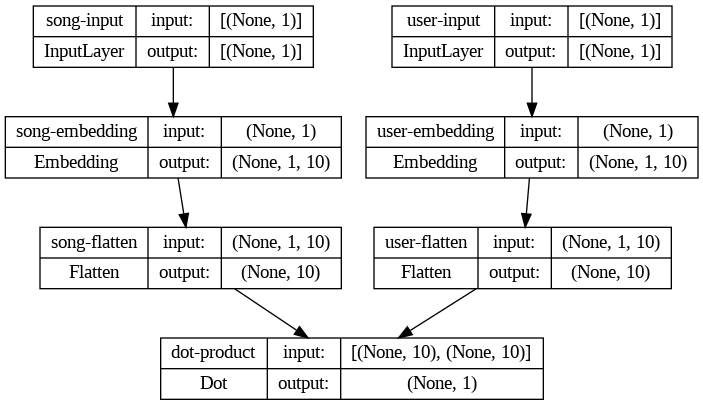

In [ ]:
from keras.models import Model
from keras.layers import Embedding, Flatten, Input, Dot
from keras.utils import plot_model
from IPython.display import Image

# Let's use a higher latent dimension.
latent_dim = 10

song_input = Input(shape=[1], name='song-input')
song_embedding = Embedding(num_songs + 1, latent_dim, name='song-embedding')(song_input)
song_vec = Flatten(name='song-flatten')(song_embedding)

user_input = Input(shape=[1], name='user-input')
user_embedding = Embedding(num_users + 1, latent_dim, name='user-embedding')(user_input)
user_vec = Flatten(name='user-flatten')(user_embedding)

prod = Dot(axes=1, name='dot-product')([song_vec, user_vec])

model = Model([user_input, song_input], prod)
model.compile('adam', 'mean_squared_error')

plot_model(model, show_shapes=True, to_file='model_plot.png')

# Display the plot
Image('model_plot.png')

In the model above, we are not using any activation function and there is no additional weight to layer. The model above represents a classic matrix factorization. It takes two inputs, a user ID and a song ID. The inputs are embedded into (1, 5) vectors. The vectors are then flattened. The dot product of the flattened vectors is the predicted rating.



In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 song-input (InputLayer)     [(None, 1)]                  0         []                            
                                                                                                  
 user-input (InputLayer)     [(None, 1)]                  0         []                            
                                                                                                  
 song-embedding (Embedding)  (None, 1, 10)                21230     ['song-input[0][0]']          
                                                                                                  
 user-embedding (Embedding)  (None, 1, 10)                46940     ['user-input[0][0]']          
                                                                                              

Epoch 1/10
3343/3343 [==============================] - 11s 3ms/step - loss: 2.4599
Epoch 2/10
3343/3343 [==============================] - 11s 3ms/step - loss: 1.1937
Epoch 3/10
3343/3343 [==============================] - 10s 3ms/step - loss: 0.6989
Epoch 4/10
3343/3343 [==============================] - 10s 3ms/step - loss: 0.6063
Epoch 5/10
3343/3343 [==============================] - 9s 3ms/step - loss: 0.5758
Epoch 6/10
3343/3343 [==============================] - 11s 3ms/step - loss: 0.5583
Epoch 7/10
3343/3343 [==============================] - 11s 3ms/step - loss: 0.5448
Epoch 8/10
3343/3343 [==============================] - 11s 3ms/step - loss: 0.5317
Epoch 9/10
3343/3343 [==============================] - 13s 4ms/step - loss: 0.5186
Epoch 10/10
3343/3343 [==============================] - 11s 3ms/step - loss: 0.5041


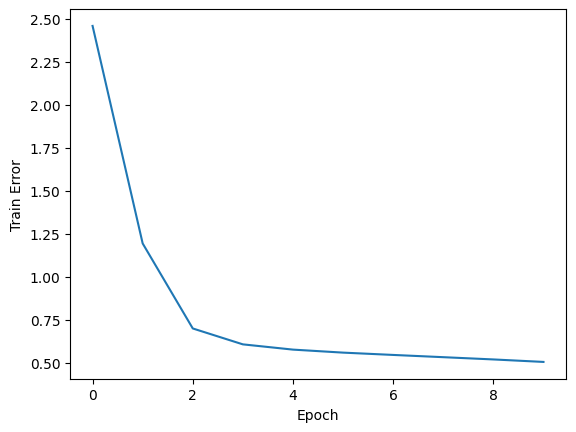

910/910 [==============================] - 2s 2ms/step
Mean Absolute Error: 0.5084180662067905
Root Mean Squared Error (RMSE): 0.7130344074494516


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

history = model.fit([train.new_user_id, train.new_song_id], train.listen_count, epochs=10)

plt.plot(history.history['loss'])
plt.xlabel("Epoch")
plt.ylabel("Train Error")
plt.show()

y_hat = np.round(model.predict([test.new_user_id, test.new_song_id]), decimals=2)
y_true = test.listen_count
mae = mean_absolute_error(y_true, y_hat)
rmse = np.sqrt(mae)
print("Mean Absolute Error:", mae)
print("Root Mean Squared Error (RMSE):", rmse)

We can go a little further by making it a non-negative matrix factorization by adding a non-negativity constraints on embeddings.

In [ ]:
# from keras.constraints import non_neg

# latent_dim = 5

# song_input = Input(shape=[1], name='song-input')
# song_embedding = Embedding(num_songs + 1, latent_dim, name='song-embedding',
#                            embeddings_constraint=non_neg())(song_input)
# song_vec = Flatten(name='song-flatten')(song_embedding)

# user_input = Input(shape=[1], name='user-input')
# user_embedding = Embedding(num_users + 1, latent_dim, name='user-embedding',
#                            embeddings_constraint=non_neg())(user_input)
# user_vec = Flatten(name='user-flatten')(user_embedding)

# prod = Dot(axes=1, name='dot-product')([song_vec, user_vec])

# model = Model([user_input, song_input], prod)
# model.compile(optimizer='adam', loss='mean_squared_error')

**Generalized Matrix Factorization (GMF)**

In the context of the paper, a generalized matrix factorization can be described by the following equation.

$$
\hat{y}_{ui} = \alpha(\mathbf{h}^\top \mathbf({\mathbf{p}_u \odot \mathbf{q}_i)\\}),
$$

where alpha is an activation function and ℎ is the edge weight matrix of the output layer. The edge weight matrix can be seen as an additional weight to the layer.

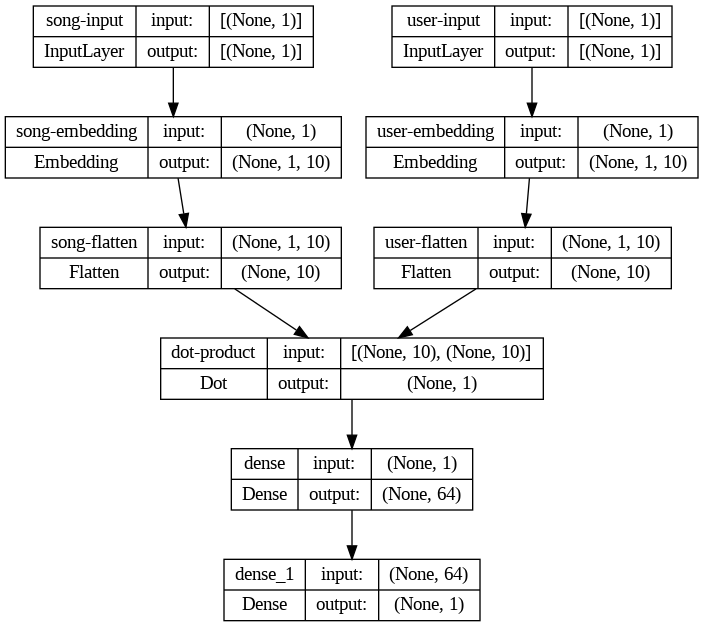

In [ ]:
from keras.models import Model
from keras.layers import Embedding, Flatten, Input, Dot, Dense, Concatenate
from keras.utils import plot_model
from IPython.display import Image

# Let's use a higher latent dimension.
latent_dim = 10

song_input = Input(shape=[1], name='song-input')
song_embedding = Embedding(num_songs + 1, latent_dim, name='song-embedding')(song_input)
song_vec = Flatten(name='song-flatten')(song_embedding)

user_input = Input(shape=[1], name='user-input')
user_embedding = Embedding(num_users + 1, latent_dim, name='user-embedding')(user_input)
user_vec = Flatten(name='user-flatten')(user_embedding)

# GMF part
merged_vector = Dot(axes=1, name='dot-product')([song_vec, user_vec])
dense_layer = Dense(64, activation='relu')(merged_vector)
output = Dense(1)(dense_layer)

model = Model([user_input, song_input], output)
model.compile('adam', 'mean_squared_error')

plot_model(model, show_shapes=True, to_file='model_plot.png')

# Display the plot
Image('model_plot.png')

In the modified model, we introduce non-linear transformations through dense layers after computing the dot product. This extends the model's expressiveness beyond classic matrix factorization. The user and song IDs are embedded into (1, 10) vectors, flattened, and then processed through dense layers. Ultimately, the model predicts the user's rating for the song, making it a Generalized Matrix Factorization (GMF) model.

Epoch 1/10
3343/3343 [==============================] - 12s 3ms/step - loss: 0.7071
Epoch 2/10
3343/3343 [==============================] - 13s 4ms/step - loss: 0.5586
Epoch 3/10
3343/3343 [==============================] - 12s 4ms/step - loss: 0.4161
Epoch 4/10
3343/3343 [==============================] - 11s 3ms/step - loss: 0.3052
Epoch 5/10
3343/3343 [==============================] - 10s 3ms/step - loss: 0.2299
Epoch 6/10
3343/3343 [==============================] - 11s 3ms/step - loss: 0.1874
Epoch 7/10
3343/3343 [==============================] - 13s 4ms/step - loss: 0.1628
Epoch 8/10
3343/3343 [==============================] - 11s 3ms/step - loss: 0.1456
Epoch 9/10
3343/3343 [==============================] - 11s 3ms/step - loss: 0.1320
Epoch 10/10
3343/3343 [==============================] - 15s 5ms/step - loss: 0.1220


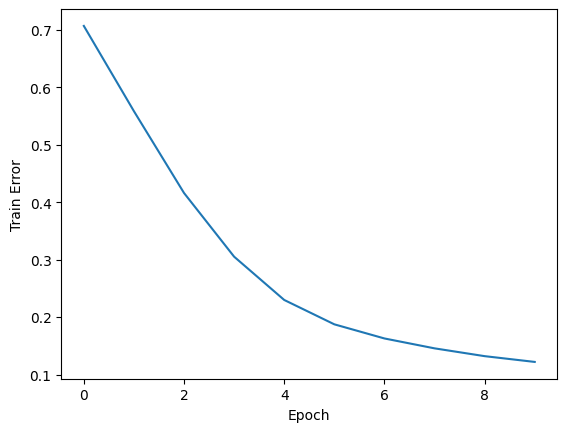

910/910 [==============================] - 2s 2ms/step
Mean Absolute Error: 0.5778261189617946
Root Mean Squared Error (RMSE): 0.7601487479183233


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

history = model.fit([train.new_user_id, train.new_song_id], train.listen_count, epochs=10)

plt.plot(history.history['loss'])
plt.xlabel("Epoch")
plt.ylabel("Train Error")
plt.show()

y_hat = np.round(model.predict([test.new_user_id, test.new_song_id]), decimals=2)
y_true = test.listen_count
mae = mean_absolute_error(y_true, y_hat)
rmse = np.sqrt(mae)
print("Mean Absolute Error:", mae)
print("Root Mean Squared Error (RMSE):", rmse)

**Neural Network with MF**

Now let's add some non-linearities to make it non-linear matrix factorization, which is essentially appending a neural network to the end of the model.

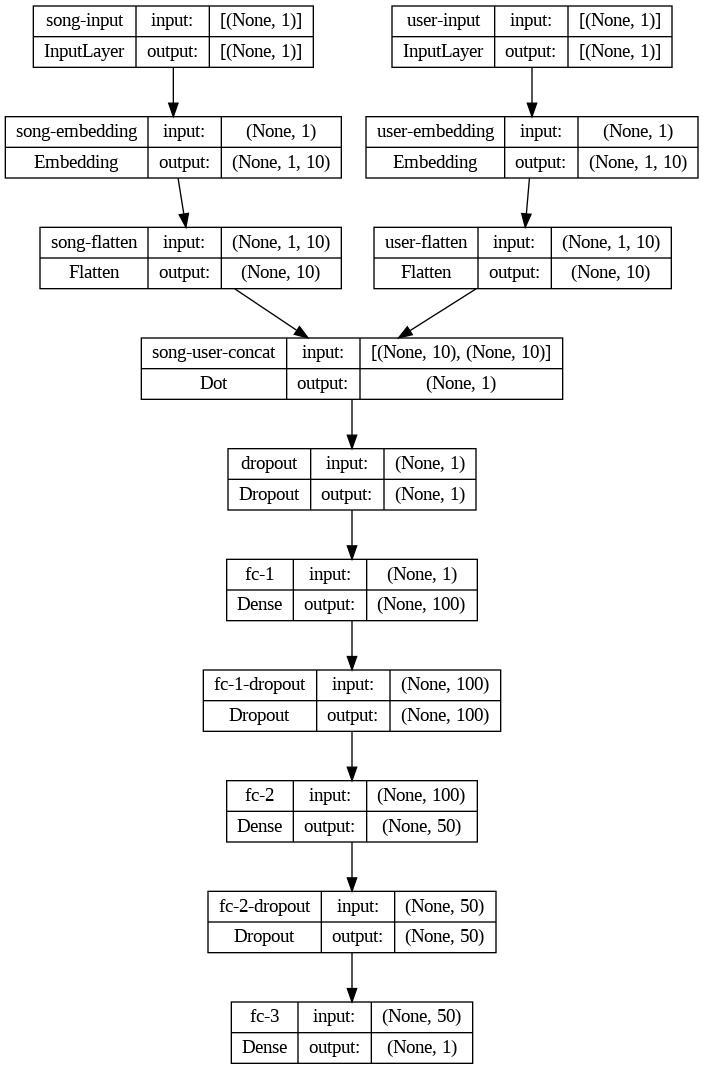

In [ ]:
from keras.models import Model
from keras.layers import Embedding, Flatten, Input, Dot, Dropout, Dense
from keras.optimizers import Adam
from keras.utils import plot_model
from IPython.display import Image

latent_dim = 10

song_input = Input(shape=[1], name='song-input')
song_embedding = Embedding(num_songs + 1, latent_dim, name='song-embedding')(song_input)
song_vec = Flatten(name='song-flatten')(song_embedding)

user_input = Input(shape=[1], name='user-input')
user_embedding = Embedding(num_users + 1, latent_dim, name='user-embedding')(user_input)
user_vec = Flatten(name='user-flatten')(user_embedding)

concat = Dot(axes=1, name='song-user-concat')([song_vec, user_vec])
concat_dropout = Dropout(0.2)(concat)
fc_1 = Dense(100, name='fc-1', activation='relu')(concat_dropout)
fc_1_dropout = Dropout(0.2, name='fc-1-dropout')(fc_1)
fc_2 = Dense(50, name='fc-2', activation='relu')(fc_1_dropout)
fc_2_dropout = Dropout(0.2, name='fc-2-dropout')(fc_2)
fc_3 = Dense(1, name='fc-3', activation='relu')(fc_2_dropout)

model = Model([user_input, song_input], fc_3)
model.compile(optimizer=Adam(learning_rate=0.1), loss='mean_squared_error')

plot_model(model, show_shapes=True, to_file='model_plot.png')
Image('model_plot.png')

In [ ]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 song-input (InputLayer)     [(None, 1)]                  0         []                            
                                                                                                  
 user-input (InputLayer)     [(None, 1)]                  0         []                            
                                                                                                  
 song-embedding (Embedding)  (None, 1, 10)                21230     ['song-input[0][0]']          
                                                                                                  
 user-embedding (Embedding)  (None, 1, 10)                46940     ['user-input[0][0]']          
                                                                                            

Epoch 1/10
3343/3343 [==============================] - 14s 4ms/step - loss: 0.7028
Epoch 2/10
3343/3343 [==============================] - 14s 4ms/step - loss: 0.6876
Epoch 3/10
3343/3343 [==============================] - 24s 7ms/step - loss: 0.6876
Epoch 4/10
3343/3343 [==============================] - 22s 7ms/step - loss: 0.6871
Epoch 5/10
3343/3343 [==============================] - 13s 4ms/step - loss: 0.6877
Epoch 6/10
3343/3343 [==============================] - 12s 4ms/step - loss: 0.6876
Epoch 7/10
3343/3343 [==============================] - 12s 3ms/step - loss: 0.6873
Epoch 8/10
3343/3343 [==============================] - 12s 4ms/step - loss: 0.6874
Epoch 9/10
3343/3343 [==============================] - 14s 4ms/step - loss: 0.6869
Epoch 10/10
3343/3343 [==============================] - 12s 3ms/step - loss: 0.6869


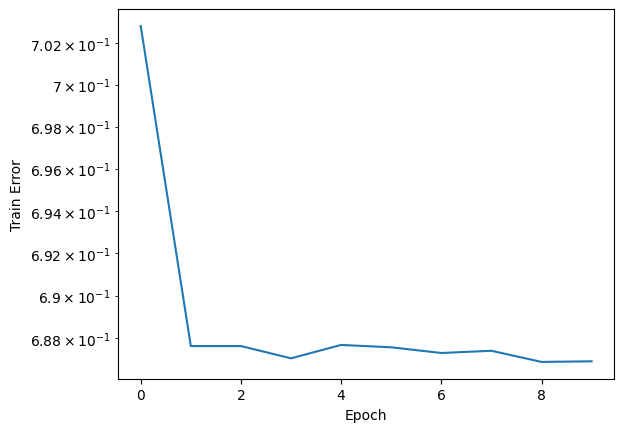

910/910 [==============================] - 2s 2ms/step
Mean Absolute Error: 0.6178227235270138
Root Mean Squared Error (RMSE): 0.7860169995152865


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
history = model.fit([train.new_user_id, train.new_song_id], train.listen_count, epochs=10)
pd.Series(history.history['loss']).plot(logy=True)
plt.xlabel("Epoch")
plt.ylabel("Train Error")
plt.show()

y_hat = np.round(model.predict([test.new_user_id, test.new_song_id]), decimals=2)
y_true = test.listen_count
mae = mean_absolute_error(y_true, y_hat)
rmse = np.sqrt(mae)
print("Mean Absolute Error:", mae)
print("Root Mean Squared Error (RMSE):", rmse)

**Multi-Layer Perceptron**

The paper proposes a slightly different architecture than the one I showed above. Previously, we have already covered what is a generalized matrix factorization model. It's just a framing the original matrix factorization technique in a neural network architecture. Now we take a step even further to create two pathways to model users and items interactions. The multi-layer perceptron is essentially a deep neural network similar to what is shown above, except now we will take it out and put it into a separate path way instead of appending it to the end of the vanilla matrix factorization.

Here's a straightforward approach, quoted directly from the paper.

Let GMF and MLP share the same embedding layer and then combine the outputs of their interactive functions. This way shares a similar spirit with the well-known Neural Tensor Network (NTN). Specifically, the model for combining GMF with a one-layer MLP can be forumated as.

$$
\hat{y}_{ui} = \sigma(\mathbf{h}^\top (\mathbf{p}_u \odot \mathbf{q}_i) + \mathbf{W} [\mathbf{p}_u \;\; \mathbf{q}_i] + \mathbf{b})
$$

However, the authors believed that sharing the embeddings of GMF and MLP might limit the performance of fused model. They want to provide more flexibility to the model and allow GMF and MLP to learn separate embeddings. They will combine the two models by concatenating the last hidden layer.

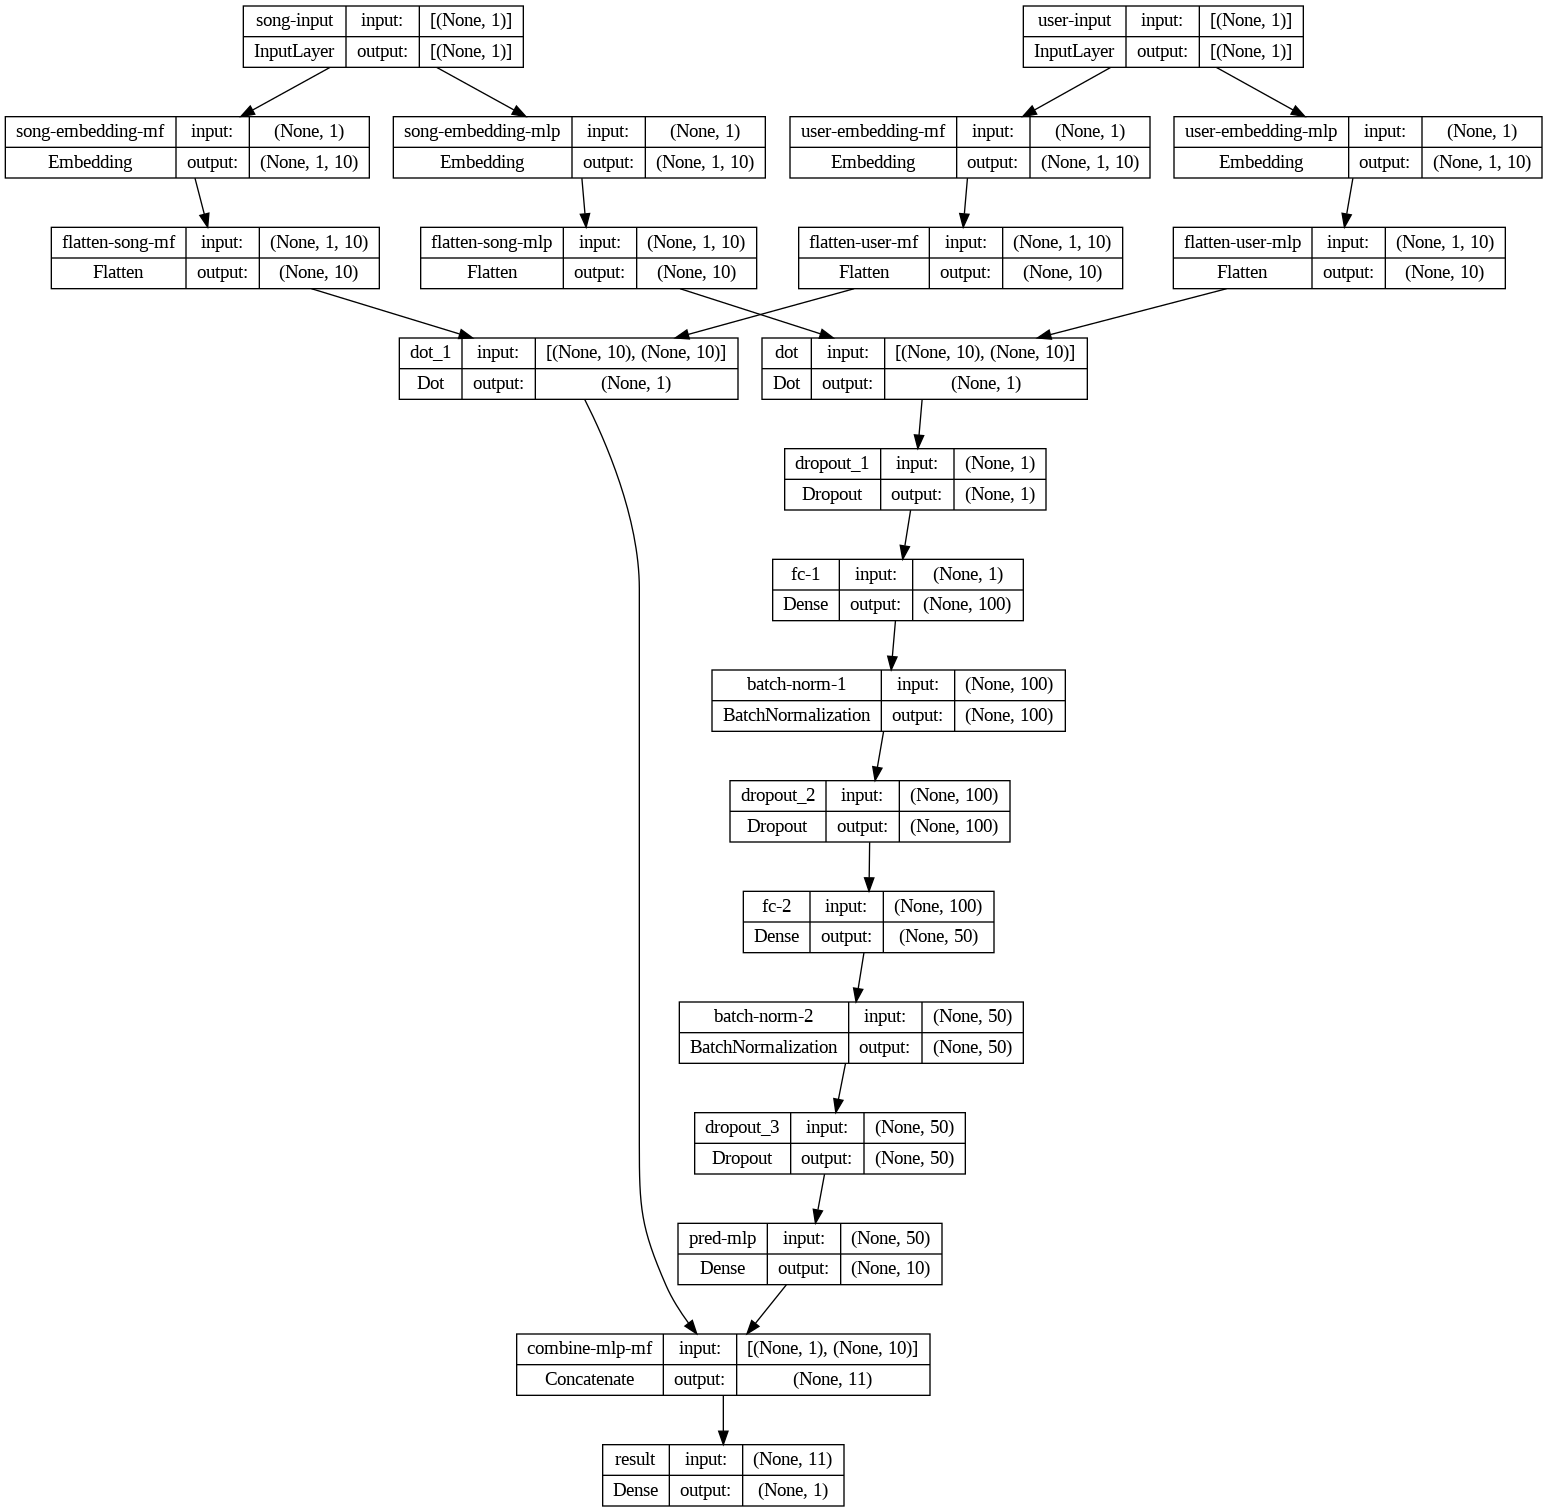

In [ ]:
from keras.models import Model
from keras.layers import Embedding, Flatten, Input, Dropout, Dense, Dot, BatchNormalization, concatenate
from keras.optimizers import Adam
from keras.utils import plot_model
from IPython.display import Image

latent_dim = 10

# Define inputs
song_input = Input(shape=[1], name='song-input')
user_input = Input(shape=[1], name='user-input')

# MLP Embeddings
song_embedding_mlp = Embedding(num_songs + 1, latent_dim, name='song-embedding-mlp')(song_input)
song_vec_mlp = Flatten(name='flatten-song-mlp')(song_embedding_mlp)

user_embedding_mlp = Embedding(num_users + 1, latent_dim, name='user-embedding-mlp')(user_input)
user_vec_mlp = Flatten(name='flatten-user-mlp')(user_embedding_mlp)

# MF Embeddings
song_embedding_mf = Embedding(num_songs + 1, latent_dim, name='song-embedding-mf')(song_input)
song_vec_mf = Flatten(name='flatten-song-mf')(song_embedding_mf)

user_embedding_mf = Embedding(num_users + 1, latent_dim, name='user-embedding-mf')(user_input)
user_vec_mf = Flatten(name='flatten-user-mf')(user_embedding_mf)

# MLP layers
concat = Dot(axes=-1)([song_vec_mlp, user_vec_mlp])
concat_dropout = Dropout(0.2)(concat)
fc_1 = Dense(100, name='fc-1', activation='relu')(concat_dropout)
fc_1_bn = BatchNormalization(name='batch-norm-1')(fc_1)
fc_1_dropout = Dropout(0.2)(fc_1_bn)
fc_2 = Dense(50, name='fc-2', activation='relu')(fc_1_dropout)
fc_2_bn = BatchNormalization(name='batch-norm-2')(fc_2)
fc_2_dropout = Dropout(0.2)(fc_2_bn)

# Prediction from both layers
pred_mlp = Dense(10, name='pred-mlp', activation='relu')(fc_2_dropout)
pred_mf = Dot(axes=-1)([song_vec_mf, user_vec_mf])
combine_mlp_mf = concatenate([pred_mf, pred_mlp], name='combine-mlp-mf')

# Final prediction
result = Dense(1, name='result', activation='relu')(combine_mlp_mf)

model = Model([user_input, song_input], result)
model.compile(optimizer=Adam(learning_rate=0.01), loss='mean_absolute_error')
plot_model(model, show_shapes=True, to_file='model_plot.png')
Image('model_plot.png')

In [ ]:
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 song-input (InputLayer)     [(None, 1)]                  0         []                            
                                                                                                  
 user-input (InputLayer)     [(None, 1)]                  0         []                            
                                                                                                  
 song-embedding-mlp (Embedd  (None, 1, 10)                21230     ['song-input[0][0]']          
 ing)                                                                                             
                                                                                                  
 user-embedding-mlp (Embedd  (None, 1, 10)                46940     ['user-input[0][0]']    

Epoch 1/10
3343/3343 [==============================] - 20s 5ms/step - loss: 0.4010
Epoch 2/10
3343/3343 [==============================] - 18s 5ms/step - loss: 0.3927
Epoch 3/10
3343/3343 [==============================] - 18s 5ms/step - loss: 0.3926
Epoch 4/10
3343/3343 [==============================] - 17s 5ms/step - loss: 0.3924
Epoch 5/10
3343/3343 [==============================] - 19s 6ms/step - loss: 0.3923
Epoch 6/10
3343/3343 [==============================] - 17s 5ms/step - loss: 0.3924
Epoch 7/10
3343/3343 [==============================] - 19s 6ms/step - loss: 0.3924
Epoch 8/10
3343/3343 [==============================] - 18s 5ms/step - loss: 0.3924
Epoch 9/10
3343/3343 [==============================] - 19s 6ms/step - loss: 0.3924
Epoch 10/10
3343/3343 [==============================] - 20s 6ms/step - loss: 0.3924


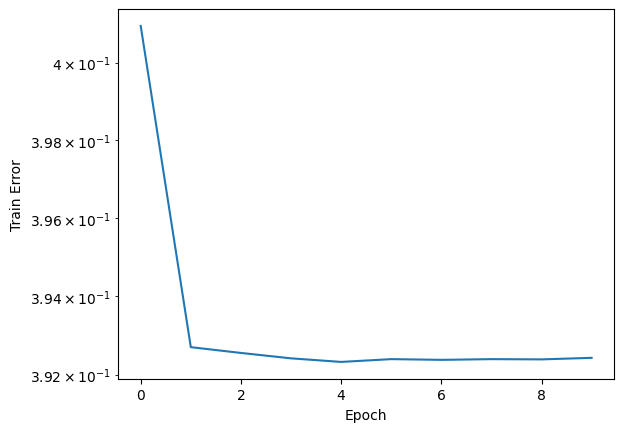

910/910 [==============================] - 2s 2ms/step
Mean Absolute Error: 0.39311161527587446
Root Mean Squared Error (RMSE): 0.6269861364303636


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
history = model.fit([train.new_user_id, train.new_song_id], train.listen_count, epochs=10)
pd.Series(history.history['loss']).plot(logy=True)
plt.xlabel("Epoch")
plt.ylabel("Train Error")
plt.show()

y_hat = np.round(model.predict([test.new_user_id, test.new_song_id]), decimals=2)
y_true = test.listen_count
mae = mean_absolute_error(y_true, y_hat)
rmse = np.sqrt(mae)
print("Mean Absolute Error:", mae)
print("Root Mean Squared Error (RMSE):", rmse)

generate a list of recommended songs for a user out of the last model:

In [ ]:
test

user_id  song_id  listen_count                          title  \
0           11      509             1    Invitation To Understanding   
1           11     6829             1                 Come On Eileen   
2           11     5992             1                Electric Avenue   
3           11      645             1          Don't Dream It's Over   
4           12      324             3       All Along The Watchtower   
...        ...      ...           ...                            ...   
29086    76052     5771             1                     Promise Me   
29087    76052     4617             3                   Transparency   
29088    76052     6846             1              The Way Things Go   
29089    76052      253             4                           Undo   
29090    76052     5586             1  Outside (Original LP Version)   

                                                 release  \
0                    Slowly Going The Way Of The Buffalo   
1                                    Kids Sing Along Pac   
2                              Lost & Found:  Eddy Grant   
3      Recurring Dream_ Best Of Crowded House (Domest...   
4                                     South Saturn Delta   
...                                                  ...   
29086                                     Beverly Craven   
29087                                    Workout Holiday   
29088                              Identification Parade   
29089                                    Vespertine Live   
29090                                    Break The Cycle   

                  artist_name  year  new_user_id  new_song_id  
0                        MxPx  1998           80         1203  
1      Dexys Midnight Runners  1982           80         1213  
2                  Eddy Grant  1982           80         1212  
3               Crowded House  1986           80          437  
4                Jimi Hendrix  1970         1050          944  
...                       ...   ...          ...          ...  
29086         Beverley Craven  1990           88           89  
29087             White Denim  2008           88          924  
29088         Octopus Project  2002           88          576  
29089                   Björk  2001           88          237  
29090                  Staind  2001           88          502  

[29091 rows x 9 columns]

פונקציה שמתאימה ל NCF בלבד

In [ ]:
def get_recommendations_for_user(user_id):
  # Get the new user ID
  new_user_id = user_id_mapping.get(user_id)
  if new_user_id is None:
      print(f"User with ID {user_id} not found.")
      return []

  # Get the new song IDs for the current user
  not_played_songs = get_songs_played_by_user(user_id, df_final_try, played=False)
  new_not_played_songs = [song_id_mapping.get(song_id) for song_id in not_played_songs if song_id in song_id_mapping]

  # Predict ratings for the user's new song IDs
  predicted_ratings = model.predict([np.array([new_user_id] * len(new_not_played_songs)), np.array(new_not_played_songs)])

  # Create a DataFrame to store the predicted ratings for the user's new song IDs
  df_predicted_ratings = pd.DataFrame({
      'new_user_id': [new_user_id] * len(new_not_played_songs),
      'new_song_id': new_not_played_songs,
      'predicted_rating': predicted_ratings.flatten()
  })

  # Sort the predicted ratings by descending order
  sorted_songs = df_predicted_ratings.sort_values(by='predicted_rating', ascending=False)

  # Get top-N recommended songs (adjust N as needed)
  top_n_recommendations = sorted_songs['new_song_id'].head(10).tolist()

  # Retrieve the corresponding original song IDs
  top_n_recommendations_original = [song_id for song_id in top_n_recommendations if song_id]

  print(clr.S+"(and according to the model, he should listen to them)"+clr.E)

  return top_n_recommendations_original

In [ ]:
get_recommendations_for_user(random_user_id)

Songs not played by user 17839:
66/66 [==============================] - 0s 3ms/step
(and according to the model, he should listen to them)


[1190, 1804, 2033, 1349, 928, 1645, 970, 1762, 1423, 1770]

# Cluster-based

### Build a baseline Cluster-Based model

In [ ]:
# Make baseline clustering model
coCluster = CoClustering(random_state=1)
# Training the algorithm on the train set
coCluster.fit(trainset)

# # Compute and display the metrics
precision_recall_at_k(coCluster, 10, 1)
precision_recall_at_k(coCluster, 20, 1)
precision_recall_at_k(coCluster, 30, 1)
precision_recall_at_k(coCluster, 40, 1)

AttributeError: 'int' object has no attribute 'test'

#### **Tune the baseline Cluster-Based model, and try improving its performance**

- We will perform a randomized grid search cross validation, in order to find the best values for the hyperparamenters.
- We will then use the parameters obtained, and tune the model, in an effort to improve the model's performance.


In [ ]:
# Set the parameter space to tune
param_grid = {'n_cltr_u': [4, 5, 6, 7, 8, 9],
              'n_cltr_i': [4, 5, 6, 7, 8, 9],
              'n_epochs': [10, 20, 30, 40, 50]}
# Perform a 3-fold grid search cross-validation
gs_cocluster = RandomizedSearchCV(CoClustering, param_grid, measures = ['rmse'], cv = 3, n_jobs = -1)
# Fitting the data
gs_cocluster.fit(data)
display_best_params(gs_cocluster)
# Find the best RMSE score
#print(round(gs.best_score['rmse'], 3))
# Extract the combination of parameters that gave the best RMSE score
#print(gs.best_params['rmse'])

- The `Grid Search Cross Validation` algorithm has outputed the following **optimal values** for the hyperparameters:
  - `n_cltr_u`: **4**,
  - `n_cltr_i`: **5**, and  
  - `n_epochs`: **10**.


In [ ]:
# Train the tuned Coclustering algorithm
coCluster_optimized = CoClustering(n_cltr_u=4, n_cltr_i=5, n_epochs=10, random_state=1)
coCluster_optimized.fit(trainset)
# Use the function precision_recall_at_k to compute precision@k, recall@k, F1-Score, and RMSE
precision_recall_at_k(coCluster_optimized, 10, 1)
precision_recall_at_k(coCluster_optimized, 20, 1)
precision_recall_at_k(coCluster_optimized, 30, 1)
precision_recall_at_k(coCluster_optimized, 40, 1)

# Content-based

**Think About It:** So far we have only used the play_count of songs to find recommendations but we have other information/features on songs as well. Can we take those song features into account?

TypeError: ContentBasedAlgorithm.__init__() missing 1 required positional argument: 'item_features'

In [ ]:
# Make a copy of the df_final, on which we will perform further analysis and transformations.
df_content = df_final

In [ ]:
# Concatenate the title, release and artist_name columns to create a new column, text.
df_content['text'] = df_content[['title', 'release', 'artist_name']].agg(' '.join, axis=1)


In [ ]:
# Select the columns 'user_id', 'song_id', 'play_count', 'title', 'text' from df_small data
df_content = df_content[['user_id', 'song_id', 'listen_count', 'title', 'text']].reset_index(drop=True)
# Drop the duplicates from the title column
df_content = df_content.drop_duplicates('title')
# Set the title column as the index
df_content = df_content.set_index('title')
df_content.head()


In [ ]:
# Importing the necessary libraries for working with text data
import nltk

# Download punkt library
nltk.download('punkt')

# Download stopwords library
nltk.download('stopwords')

# Download wordnet
nltk.download('wordnet')

# Import regular expression
import re

# Import word_tokenizer
from nltk import word_tokenize

# Import WordNetLemmatizer
from nltk.stem import WordNetLemmatizer

# Import stopwords
from nltk.corpus import stopwords

# Import CountVectorizer and TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer


In [ ]:
# Function for tokenizing the text
def tokenize(text):
    '''
    A function that tokenizes a given text.
    A token is a word that is not a stop word.
    Params:
        text: text to be tokenized
    Returns:
        A list of the tokens obtained from the text.
    '''
    # Making each letter as lowercase and removing non-alphabetical text
    text = re.sub(r"[^a-zA-Z]"," ", text.lower())

    # Extracting each word in the text
    tokens = word_tokenize(text)

    # Removing stopwords
    words = [word for word in tokens if word not in stopwords.words("english")]

    # Lemmatize the words
    text_lems = [WordNetLemmatizer().lemmatize(lem).strip() for lem in words]

    return text_lems

In [ ]:
# Create the tfidf vectorizer
tfidf = TfidfVectorizer(tokenizer=tokenize)

# Fit_transfrom the vectorizer on the text column, convert the output into an array
song_tfidf = tfidf.fit_transform(df_content['text'].values).toarray()

In [ ]:
pd.DataFrame(song_tfidf).head()

In [ ]:
# Compute the cosine similarity for the tfidf
similar_songs = cosine_similarity(song_tfidf, song_tfidf)

# Display the similar_songs array
similar_songs

#### **Making recommendations based on the title of a song**

In [ ]:
# Function that makes n recommendations to a given title of a song.
def recommendations(df, title, similarity_matrix, n=10):
    '''
    A function that returns a list of songs (titles) similar to a given one.
    Params:
        df: dataframe with the data
        title: the title of the song for which we are computing similar songs
        similarity_matrix: the cosine similarity matrix for all song-song
        n: the upper limit number of similar songs
    Returns:
        A list of songs ids, when the title exists in the database.
        A message, otherwise.
    '''
    recommended_songs = []

    # Get the index of the song that matches the title
    df_idx = pd.Series(df.index)
    if title not in df.index:
        return print(clr.S+'We appologize, we cannot find {} in our database, and we are unable to make recommendations!'.format(title)+clr.E)
    idx = df_idx[df_idx == title].index[0]

    # Create a Series with the similarity scores in descending order
    sim_scores = pd.Series(similarity_matrix[idx]).sort_values(ascending = False)

    # Filter the scores that are equal to 0.0.
    # We do not want to recommend a song that has a simmilarity score of 0.0.
    # An improvement would be to set a threshold of what constitues a recommendable song.
    sim_scores = sim_scores[sim_scores !=0]
    # Getting the indexes of the 10 most similar songs
    top_n_index = list(sim_scores.iloc[1:n+1].index)

    # Populating the list of recommendations with the titles of the best 10 matching songs
    for i in top_n_index:
        recommended_songs.append(list(df.index)[i])

    return recommended_songs

# Evaluation metrics

https://github.com/rctruta/music_recommendation_system/blob/main/music_recommendation_system_final_submission.ipynb

# Showing predictions

# Comparing the models

# Final thoughts